In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5324.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3382.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1398.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1142.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5002.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2646.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3476.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1613.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5593.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2975.BMP
/kaggle/input/finger-print-based-blood-g

In [6]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"

# Check folder structure
for dirname, _, filenames in os.walk(dataset_path):
    print(dirname)  # Print directories
    print(filenames[:5])  # Show first 5 files


/kaggle/input/finger-print-based-blood-group-dataset
[]
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group
[]
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-
['cluster_5_5324.BMP', 'cluster_5_3382.BMP', 'cluster_5_1398.BMP', 'cluster_5_1142.BMP', 'cluster_5_5002.BMP']
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+
['cluster_6_4861.BMP', 'cluster_6_5382.BMP', 'cluster_6_306.BMP', 'cluster_6_5542.BMP', 'cluster_6_1889.BMP']
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B-
['cluster_3_4117.BMP', 'cluster_3_3070.BMP', 'cluster_3_1713.BMP', 'cluster_3_1602.BMP', 'cluster_3_2484.BMP']
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+
['cluster_2_4383.BMP', 'cluster_2_1776.BMP', 'cluster_2_3336.BMP', 'cluster_2_3665.BMP', 'cluster_2_1458.BMP']
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-
['cluster_1_5003.BMP', 'cluster_1_1804.BMP',

In [7]:
train_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (224, 224)  # ResNet152 input size

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% training, 20% validation
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


In [4]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet152 (without top layers)
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers (optional for fine-tuning)
for layer in base_model.layers[:]:
    layer.trainable = False

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax')(x)  # 8 blood group classes

# Create Model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 150s 787ms/step - accuracy: 0.1216 - loss: 2.3604 - val_accuracy: 0.1955 - val_loss: 2.0440
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 435ms/step - accuracy: 0.1713 - loss: 2.0956 - val_accuracy: 0.2005 - val_loss: 2.0187
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 431ms/step - accuracy: 0.1919 - loss: 2.0344 - val_accuracy: 0.2439 - val_loss: 2.0099
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 426ms/step - accuracy: 0.1832 - loss: 2.0284 - val_accuracy: 0.1947 - val_loss: 2.0001
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 67s 429ms/step - accuracy: 0.2103 - loss: 2.0109 - val_accuracy: 0.2172 - val_loss: 1.9997
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 433ms/step - accuracy: 0.2015 - loss: 2.0000 - val_accuracy: 0.2523 - val_loss: 1.9707
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 66s 423ms/step - accuracy: 0.2114 - loss: 1.9919 - val_accuracy: 0.2364 - val_loss: 1.9604
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 435ms/step - accuracy: 0.2136 - loss: 1.9739 - va

In [9]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet152 (without top layers)
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers (optional for fine-tuning)
for layer in base_model.layers[:]:
    layer.trainable = False

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(8, activation='softmax')(x)  # 8 blood group classes

# Create Model
model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 20/151 ━━━━━━━━━━━━━━━━━━━━ 56s 431ms/step - accuracy: 0.1028 - loss: 2.4786

KeyboardInterrupt: 

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet152 (without top layers)
base_model = ResNet152(weights=None, include_top=False, input_shape=(224, 224, 3))

# Manually Load the Weights File
weights_path = "/kaggle/input/your-uploaded-file/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model.load_weights(weights_path)

# Freeze initial layers (optional for fine-tuning)
for layer in base_model.layers[:100]:  
    layer.trainable = False  # Freeze first 100 layers

# Adding Custom Classifier Head
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')  # Adjust classes as per your dataset

# Define New Model
model = Model(inputs=base_model.input, outputs=x)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/train-folder',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/val-folder',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Fix PyDataset Warning (If Using Custom Dataset)
class MyDataset(tf.keras.utils.PyDataset):
    def __init__(self, data, labels, **kwargs):
        super().__init__(**kwargs)  # Ensure compatibility
        self.data = data
        self.labels = labels

# Train the Model
model.fit(train_generator, validation_data=val_generator, epochs=10)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/your-uploaded-file/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet152 (without top layers)
base_model = ResNet152(weights=None, include_top=False, input_shape=(224, 224, 3))

# Manually Load the Weights File
weights_path = "/kaggle/input/your-uploaded-file/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model.load_weights(weights_path)

# Freeze initial layers (optional for fine-tuning)
for layer in base_model.layers[:100]:  
    layer.trainable = False  # Freeze first 100 layers

# Adding Custom Classifier Head
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')  # Adjust classes as per your dataset

# Define New Model
model = Model(inputs=base_model.input, outputs=x)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/train-folder',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/val-folder',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Fix PyDataset Warning (If Using Custom Dataset)
class MyDataset(tf.keras.utils.PyDataset):
    def __init__(self, data, labels, **kwargs):
        super().__init__(**kwargs)  # Ensure compatibility
        self.data = data
        self.labels = labels

# Train the Model
model.fit(train_generator, validation_data=val_generator, epochs=10)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/kaggle/input/your-uploaded-file/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [10]:
import os
print(os.listdir("/kaggle/input/"))


['finger-print-based-blood-group-dataset', 'h5-file']


In [11]:
weights_path = "/kaggle/input/finger-print-based-blood-group-dataset/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5"

import os

# Check if the file exists
if os.path.exists(weights_path):
    print("File found! Loading weights...")
    base_model.load_weights(weights_path)
else:
    print("File not found. Check your dataset title or upload again.")


File not found. Check your dataset title or upload again.


In [12]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"

# Check if the dataset directory exists
if os.path.exists(dataset_path):
    print("Dataset folder found. Listing files:")
    print(os.listdir(dataset_path))  # List files inside the dataset
else:
    print("Dataset folder not found. Please check the dataset name.")


Dataset folder found. Listing files:
['dataset_blood_group']


In [13]:
import os

dataset_subfolder = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

if os.path.exists(dataset_subfolder):
    print("Subfolder found. Listing files inside:")
    print(os.listdir(dataset_subfolder))  # List files inside the subfolder
else:
    print("Subfolder not found.")


Subfolder found. Listing files inside:
['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [14]:
import os

h5_path = "/kaggle/input/h5-file"  # Adjust this if needed
print("Files in h5 dataset:", os.listdir(h5_path))


Files in h5 dataset: ['resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5']


In [15]:
weights_path = "/kaggle/input/h5-file/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model.load_weights(weights_path)


In [16]:
base_model.summary()


Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [17]:
print(base_model)


<Functional name=resnet152, built=True>


In [18]:
print(base_model)


<Functional name=resnet152, built=True>


In [19]:
import sys
base_model.summary()
sys.stdout.flush()


Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [20]:
for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers
    layer.trainable = True


In [19]:
from tensorflow.keras import layers, models

# Create a new model with ResNet152 as the base
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)  
x = layers.Dropout(0.5)(x)  # Helps with overfitting
x = layers.Dense(num_classes, activation='softmax')(x)  # Change num_classes as needed

model = models.Model(inputs=base_model.input, outputs=x)


NameError: name 'num_classes' is not defined

In [21]:
from tensorflow.keras import layers, models

num_classes = 8  # Define the number of output classes

# Create a new model with ResNet152 as the base
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Helps with overfitting
x = layers.Dense(num_classes, activation='softmax')(x)  # Fix applied ✅

model = models.Model(inputs=base_model.input, outputs=x)


In [22]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 59,424,136 (226.69 MB)

 Trainable params: 18,003,720 (68.68 MB)

 Non-trainable params: 41,420,416 (158.01 MB)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# =============================
# 🔹 Data Augmentation
# =============================
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  # Rotate images randomly by 30 degrees
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,  # Zoom-in range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    'dataset_blood_group/train', 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    'dataset_blood_group/val',  
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)

# =============================
# 🔹 Load Pretrained ResNet152 Model
# =============================
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Initially freeze ResNet152

# =============================
# 🔹 Add Custom Classification Layers
# =============================
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Prevent overfitting
x = layers.Dense(8, activation='softmax')(x)  # 8 classes (A+, A-, B+, B-, AB+, AB-, O+, O-)

model = models.Model(inputs=base_model.input, outputs=x)

# =============================
# 🔹 Compile the Model
# =============================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =============================
# 🔹 Train Model (Phase 1: Only Top Layers)
# =============================
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Train top layers first
    callbacks=[early_stopping, reduce_lr]
)

# =============================
# 🔹 Fine-Tune ResNet152 (Phase 2)
# =============================
base_model.trainable = True  # Unfreeze ResNet152

# Only fine-tune the last 50 layers
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Recompile with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train again for better accuracy
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,  # Train deeper layers
    callbacks=[early_stopping, reduce_lr]
)

# =============================
# 🔹 Save Final Model
# =============================
model.save('ResNet152_blood_group_model.h5')

# =============================
# 🔹 Evaluate Model
# =============================
loss, acc = model.evaluate(val_data)
print(f"Final Model Accuracy: {acc * 100:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'dataset_blood_group/train'

In [24]:
import os
print(os.listdir())  # List files and folders in the current directory


['.virtual_documents']


In [25]:
import os
for root, dirs, files in os.walk("/kaggle/input"):  # Kaggle datasets are stored here
    print(root, dirs, files)


/kaggle/input ['finger-print-based-blood-group-dataset', 'h5-file'] []
/kaggle/input/finger-print-based-blood-group-dataset ['dataset_blood_group'] []
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+'] []
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB- [] ['cluster_5_5324.BMP', 'cluster_5_3382.BMP', 'cluster_5_1398.BMP', 'cluster_5_1142.BMP', 'cluster_5_5002.BMP', 'cluster_5_2646.BMP', 'cluster_5_3476.BMP', 'cluster_5_1613.BMP', 'cluster_5_5593.BMP', 'cluster_5_2975.BMP', 'cluster_5_4841.BMP', 'cluster_5_4962.BMP', 'cluster_5_5244.BMP', 'cluster_5_5534.BMP', 'cluster_5_4930.BMP', 'cluster_5_2140.BMP', 'cluster_5_3129.BMP', 'cluster_5_5387.BMP', 'cluster_5_2069.BMP', 'cluster_5_3893.BMP', 'cluster_5_3573.BMP', 'cluster_5_3654.BMP', 'cluster_5_5598.BMP', 'cluster_5_490.BMP', 'cluster_5_4941.BMP', 'cluster_5_5888.BMP', 'cluster_5_5219.BMP', 'cluster_5_838.BMP', 'cluster_5_1073.BMP', 'clus

In [26]:
dataset_path = "/kaggle/input/YOUR_DATASET_FOLDER"  # Change to your actual dataset folder

train_data = train_datagen.flow_from_directory(
    dataset_path,  # Use the correct dataset path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/YOUR_DATASET_FOLDER'

In [27]:
import os
import pandas as pd

# Set dataset path (modify if needed)
dataset_path = "/kaggle/input/YOUR_DATASET_FOLDER"

# List all BMP images
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".BMP")]

# Create DataFrame
df = pd.DataFrame({"filename": image_files, "label": ["unknown"] * len(image_files)})

# Save CSV file
df.to_csv("dataset_labels.csv", index=False)

# Show first few rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/YOUR_DATASET_FOLDER'

In [28]:
import os
os.listdir("/kaggle/input")


['finger-print-based-blood-group-dataset', 'h5-file']

In [29]:
import os
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"

# List all files and folders inside the dataset
print(os.listdir(dataset_path))


['dataset_blood_group']


In [30]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# List all files and folders inside the dataset_blood_group
print(os.listdir(dataset_path))


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [32]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"


In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # 20% validation
)

# Training Data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation Data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


In [34]:
base_model = ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initial layers


In [35]:
num_classes = len(train_data.class_indices)  # 8 classes

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)  # Dropout to prevent overfitting
x = layers.Dense(num_classes, activation="softmax")(x)  # Output Layer

model = models.Model(inputs=base_model.input, outputs=x)


In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [37]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 105s 537ms/step - accuracy: 0.1348 - loss: 2.3459 - val_accuracy: 0.1938 - val_loss: 2.0381
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 431ms/step - accuracy: 0.1722 - loss: 2.1159 - val_accuracy: 0.2005 - val_loss: 2.0210
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 71s 452ms/step - accuracy: 0.1773 - loss: 2.0571 - val_accuracy: 0.1997 - val_loss: 1.9991
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 70s 444ms/step - accuracy: 0.2089 - loss: 2.0108 - val_accuracy: 0.2348 - val_loss: 1.9954
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 70s 448ms/step - accuracy: 0.2040 - loss: 1.9995 - val_accuracy: 0.2105 - val_loss: 1.9749
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 71s 450ms/step - accuracy: 0.2140 - loss: 1.9941 - val_accuracy: 0.2272 - val_loss: 1.9761
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 76s 487ms/step - accuracy: 0.2129 - loss: 1.9761 - val_accuracy: 0.2431 - val_loss: 1.9585
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 73s 467ms/step - accuracy: 0.2142 - loss: 1.9669 - va

In [37]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze initial layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(8, activation="softmax")(x)  # 8 blood groups

model = Model(inputs=base_model.input, outputs=x)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [38]:
from collections import Counter
import numpy as np

class_counts = Counter(train_data.classes)
print(class_counts)


Counter({1: 808, 6: 682, 3: 609, 5: 593, 7: 570, 2: 567, 4: 522, 0: 452})


In [40]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

model.fit(train_data, validation_data=val_data, epochs=20, class_weight=class_weights)


Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 128s 685ms/step - accuracy: 0.1446 - loss: 2.2829 - val_accuracy: 0.1337 - val_loss: 2.0748
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.1516 - loss: 2.0735 - val_accuracy: 0.1604 - val_loss: 2.0643
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 82s 523ms/step - accuracy: 0.1558 - loss: 2.0703 - val_accuracy: 0.1546 - val_loss: 2.0592
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 430ms/step - accuracy: 0.1625 - loss: 2.0525 - val_accuracy: 0.1729 - val_loss: 2.0506
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 434ms/step - accuracy: 0.1701 - loss: 2.0481 - val_accuracy: 0.1504 - val_loss: 2.0529
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 433ms/step - accuracy: 0.1917 - loss: 2.0262 - val_accuracy: 0.1805 - val_loss: 2.0423
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 68s 432ms/step - accuracy: 0.1903 - loss: 2.0331 - val_accuracy: 0.1905 - val_loss: 2.0302
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 70s 445ms/step - accuracy: 0.1903 - loss: 

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load ResNet152 model without the top classification layer
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # Adjust number of classes (8 in your case)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data normalization (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data (replace 'train_data' and 'val_data' with your actual data generator objects)
train_generator = train_datagen.flow(train_data, batch_size=32)
val_generator = val_datagen.flow(val_data, batch_size=32)

# Class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_data.classes), y=train_data.classes)
class_weight_dict = dict(enumerate(class_weights))

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model for 50 epochs
history = model.fit(
    train_generator,
    epochs=50,  # Increased to 50 epochs
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# Fine-tuning: Unfreeze some layers of the base model after initial training
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Re-compile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with fine-tuned layers for 50 more epochs
history_finetune = model.fit(
    train_generator,
    epochs=50,  # Fine-tuning for another 50 epochs
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'train_data' is not defined

In [40]:
train_dir = '/kaggle/input/your-dataset/train/'  # Correct path for the training data
val_dir = '/kaggle/input/your-dataset/val/'      # Correct path for the validation data


In [41]:
import os
for root, dirs, files in os.walk("/kaggle/input"):  # Kaggle datasets are stored here
    print(root, dirs, files)


/kaggle/input ['finger-print-based-blood-group-dataset', 'h5-file'] []
/kaggle/input/finger-print-based-blood-group-dataset ['dataset_blood_group'] []
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+'] []
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB- [] ['cluster_5_5324.BMP', 'cluster_5_3382.BMP', 'cluster_5_1398.BMP', 'cluster_5_1142.BMP', 'cluster_5_5002.BMP', 'cluster_5_2646.BMP', 'cluster_5_3476.BMP', 'cluster_5_1613.BMP', 'cluster_5_5593.BMP', 'cluster_5_2975.BMP', 'cluster_5_4841.BMP', 'cluster_5_4962.BMP', 'cluster_5_5244.BMP', 'cluster_5_5534.BMP', 'cluster_5_4930.BMP', 'cluster_5_2140.BMP', 'cluster_5_3129.BMP', 'cluster_5_5387.BMP', 'cluster_5_2069.BMP', 'cluster_5_3893.BMP', 'cluster_5_3573.BMP', 'cluster_5_3654.BMP', 'cluster_5_5598.BMP', 'cluster_5_490.BMP', 'cluster_5_4941.BMP', 'cluster_5_5888.BMP', 'cluster_5_5219.BMP', 'cluster_5_838.BMP', 'cluster_5_1073.BMP', 'clus

In [11]:
import os
import pandas as pd

# Set dataset path (modify if needed)
dataset_path = "/kaggle/input/YOUR_DATASET_FOLDER"

# List all BMP images
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".BMP")]

# Create DataFrame
df = pd.DataFrame({"filename": image_files, "label": ["unknown"] * len(image_files)})

# Save CSV file
df.to_csv("dataset_labels.csv", index=False)

# Show first few rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/YOUR_DATASET_FOLDER'

In [42]:
import os
os.listdir("/kaggle/input")


['finger-print-based-blood-group-dataset', 'h5-file']

In [43]:
import os
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"

# List all files and folders inside the dataset
print(os.listdir(dataset_path))


['dataset_blood_group']


In [44]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# List all files and folders inside the dataset_blood_group
print(os.listdir(dataset_path))


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [45]:
train_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation

train_data = train_datagen.flow_from_directory(
    train_path,  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.


In [49]:
print(image_files[:10])  # Check first 10 filenames


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [51]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

if os.path.exists(dataset_path):
    print("Dataset path exists!")
    print("Files inside:", os.listdir(dataset_path))
else:
    print("Dataset path does NOT exist. Double-check the path.")


Dataset path exists!
Files inside: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [52]:
import os
import pandas as pd

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Get list of blood group folders
blood_groups = os.listdir(dataset_path)

data = []  # To store filename and label pairs

# Loop through each blood group folder
for blood_group in blood_groups:
    folder_path = os.path.join(dataset_path, blood_group)
    
    if os.path.isdir(folder_path):  # Ensure it's a folder
        images = os.listdir(folder_path)
        
        for img in images:
            data.append((img, blood_group))  # Store filename and corresponding label

# Create DataFrame
df = pd.DataFrame(data, columns=['filename', 'label'])

print(df.head())  # Check if labels are correctly assigned


             filename label
0  cluster_5_5324.BMP   AB-
1  cluster_5_3382.BMP   AB-
2  cluster_5_1398.BMP   AB-
3  cluster_5_1142.BMP   AB-
4  cluster_5_5002.BMP   AB-


In [53]:


print(df['label'].value_counts())  # Check number of images per class


label
A-     1009
O+      852
AB-     761
B-      741
O-      712
AB+     708
B+      652
A+      565
Name: count, dtype: int64


In [54]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Flip images randomly
    transforms.RandomRotation(10),  # Rotate images slightly
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Small translations
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Change brightness/contrast
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [55]:
import torch
import torch.nn as nn

# Compute class weights (Inverse of class frequency)
class_counts = df['label'].value_counts().values
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)

# Define weighted loss function
criterion = nn.CrossEntropyLoss(weight=class_weights)


In [25]:
from torch.utils.data import WeightedRandomSampler

# Compute sample weights (inverse of class frequency)
sample_weights = df['label'].map(lambda x: 1.0 / df['label'].value_counts()[x]).values
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# Use sampler in DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, sampler=sampler)


NameError: name 'train_dataset' is not defined

In [56]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class BloodGroupDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        self.label_map = {label: idx for idx, label in enumerate(df['label'].unique())}  # Convert labels to indices

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.df.iloc[idx, 1], self.df.iloc[idx, 0])  
        image = Image.open(img_name).convert('RGB')  
        label = self.label_map[self.df.iloc[idx, 1]]  # Convert text label to number

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms (including augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [57]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print("Training set:", train_df.shape)
print("Validation set:", val_df.shape)


Training set: (4800, 2)
Validation set: (1200, 2)


In [58]:
# Create Dataset Objects
train_dataset = BloodGroupDataset(train_df, dataset_path, transform=transform)
val_dataset = BloodGroupDataset(val_df, dataset_path, transform=transform)

# Compute sample weights (for balancing classes)
class_counts = df['label'].value_counts().values
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float32)

sample_weights = train_df['label'].map(lambda x: class_weights[df['label'].unique().tolist().index(x)]).values
sampler = torch.utils.data.WeightedRandomSampler(sample_weights, len(sample_weights))

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("DataLoader ready!")


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [59]:
sample_weights = train_df['label'].map(lambda x: class_weights[df['label'].unique().tolist().index(x)]).values


In [60]:
import torch

# Convert label names to indices
label_to_idx = {label: idx for idx, label in enumerate(df['label'].unique())}

# Create sample weights
sample_weights = train_df['label'].map(lambda x: class_weights[label_to_idx[x]].item()).astype(float)

# Convert to PyTorch tensor
sample_weights = torch.tensor(sample_weights, dtype=torch.float32)

# Create WeightedRandomSampler
sampler = torch.utils.data.WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)


In [61]:
print("Sample Weights:", sample_weights[:10])  # Should print numeric values
print("Data Type:", sample_weights.dtype)  # Should be float32


Sample Weights: tensor([0.0014, 0.0014, 0.0015, 0.0010, 0.0014, 0.0014, 0.0013, 0.0014, 0.0010,
        0.0014])
Data Type: torch.float32


In [62]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, sampler=sampler)


In [63]:
sampler = torch.utils.data.WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)


In [64]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, sampler=sampler)


In [65]:
for images, labels in train_loader:
    print("Batch Shape:", images.shape)
    print("Labels:", labels)
    break  # Check only first batch


Batch Shape: torch.Size([32, 3, 224, 224])
Labels: tensor([5, 1, 7, 1, 1, 0, 1, 7, 4, 7, 1, 4, 5, 7, 4, 6, 3, 4, 1, 2, 3, 2, 7, 0,
        5, 6, 7, 0, 6, 1, 1, 0])


In [66]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained ResNet152
model = models.resnet152(pretrained=True)

# Modify final layer for 8 blood group classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)  # 8 classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("ResNet152 Model Ready!")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 216MB/s] 


ResNet152 Model Ready!


In [67]:
import torch.optim as optim

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Learning Rate Scheduler (Reduce LR after 5 epochs by factor of 0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

print("Optimizer & Scheduler Ready!")


Optimizer & Scheduler Ready!


In [68]:
from tqdm import tqdm

# Training function
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    model.train()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training Loop
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = 100 * correct / total
        avg_loss = running_loss / len(train_loader)

        # Validation Step
        val_loss, val_accuracy = validate(model, val_loader, criterion)

        # Adjust learning rate
        scheduler.step()

        print(f"Epoch [{epoch+1}/{num_epochs}] -> Loss: {avg_loss:.4f}, Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Validation function
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    avg_val_loss = val_loss / len(val_loader)
    return avg_val_loss, val_accuracy


In [39]:
train(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20)


NameError: name 'val_loader' is not defined

In [69]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

# Assuming dataset is already loaded
dataset_size = len(train_dataset)
train_indices, val_indices = train_test_split(range(dataset_size), test_size=0.2, stratify=train_df['label'])

# Create subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)  # No sampler for validation


In [71]:
dataset_size = len(train_dataset)
print("Dataset Size:", dataset_size)

train_indices, val_indices = train_test_split(
    range(dataset_size), 
    test_size=0.2, 
    stratify=train_df['label']  # Ensure stratified sampling
)

print("Train Indices:", len(train_indices))
print("Validation Indices:", len(val_indices))


Dataset Size: 4800
Train Indices: 3840
Validation Indices: 960


In [72]:
print("Max Train Index:", max(train_indices))
print("Max Validation Index:", max(val_indices))
print("Dataset Size:", len(train_dataset))


Max Train Index: 4798
Max Validation Index: 4799
Dataset Size: 4800


In [73]:
for i in range(5):
    try:
        sample = train_dataset[i]
        print(f"Sample {i}: {sample}")
    except Exception as e:
        print(f"Error at index {i}: {e}")


Sample 0: (tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 0)
Sample 1: (tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1

In [74]:
print(f"Max Train Index: {max(train_indices)}")  # Should be 3839
print(f"Max Validation Index: {max(val_indices)}")  # Should be 4799
print(f"Min Train Index: {min(train_indices)}")  # Should be 0
print(f"Min Validation Index: {min(val_indices)}")  # Should be 3840


Max Train Index: 4798
Max Validation Index: 4799
Min Train Index: 1
Min Validation Index: 0


In [47]:
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=32, sampler=val_sampler)


NameError: name 'SubsetRandomSampler' is not defined

In [75]:
from torch.utils.data import DataLoader, SubsetRandomSampler


In [76]:
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=32, sampler=val_sampler)


NameError: name 'dataset' is not defined

In [77]:
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

class FingerprintDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example: Dummy Data
import torch
data = torch.randn(4800, 3, 224, 224)  # Simulated image dataset (3 channels, 224x224)
labels = torch.randint(0, 4, (4800,))  # Random labels for 4 classes

dataset = FingerprintDataset(data, labels)


In [78]:
print(f"Dataset Size: {len(dataset)}")  # Should print: 4800


Dataset Size: 4800


In [79]:
print(f"Max Train Index: {max(train_indices)}, Min Train Index: {min(train_indices)}")
print(f"Max Validation Index: {max(val_indices)}, Min Validation Index: {min(val_indices)}")


Max Train Index: 4798, Min Train Index: 1
Max Validation Index: 4799, Min Validation Index: 0


In [80]:
from sklearn.model_selection import train_test_split

indices = list(range(4800))  # Assuming dataset size is 4800
train_indices, val_indices = train_test_split(indices, test_size=0.2, random_state=42)

print(f"Max Train Index: {max(train_indices)}, Min Train Index: {min(train_indices)}")
print(f"Max Validation Index: {max(val_indices)}, Min Validation Index: {min(val_indices)}")


Max Train Index: 4799, Min Train Index: 0
Max Validation Index: 4798, Min Validation Index: 8


In [81]:
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=32, sampler=val_sampler)


In [82]:
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx}: Image Shape: {images.shape}, Labels: {labels}")
    if batch_idx == 5:
        break


Batch 0: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([2, 3, 0, 0, 3, 3, 1, 1, 3, 3, 2, 1, 0, 3, 3, 2, 3, 2, 0, 1, 2, 2, 0, 0,
        1, 1, 2, 1, 0, 2, 0, 0])
Batch 1: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([2, 0, 0, 1, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 1, 3, 1, 2, 2, 1, 3, 1,
        1, 3, 1, 2, 2, 0, 2, 3])
Batch 2: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([3, 0, 1, 3, 2, 2, 1, 0, 3, 1, 1, 0, 2, 0, 3, 0, 3, 2, 2, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 3, 1, 0, 3])
Batch 3: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([2, 2, 1, 0, 3, 1, 3, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 3, 0, 2, 2, 2,
        0, 2, 0, 2, 1, 1, 2, 3])
Batch 4: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([1, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 2, 1, 1, 2, 0, 3, 0, 2, 3, 0, 2,
        2, 1, 3, 2, 1, 0, 2, 1])
Batch 5: Image Shape: torch.Size([32, 3, 224, 224]), Labels: tensor([0, 0, 3, 2, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 3, 0, 2, 3

In [83]:
import torchvision.models as models
import torch.nn as nn

model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Assuming 4 blood group classes


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [84]:
import torchvision.models as models
from torchvision.models import ResNet152_Weights

model = models.resnet152(weights=ResNet152_Weights.IMAGENET1K_V1)  # Updated way to load pretrained weights
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Assuming 4 blood group classes


In [85]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [86]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [88]:
from torch.utils.data import WeightedRandomSampler

class_counts = [1200, 1200, 1200, 1200]  # Replace with actual counts per class
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4)


IndexError: index 4 is out of bounds for dimension 0 with size 4

In [89]:
unique_labels = set()
for _, label in train_dataset:
    unique_labels.add(label)

print("Unique labels in dataset:", unique_labels)


Unique labels in dataset: {0, 1, 2, 3, 4, 5, 6, 7}


In [90]:
train_dataset = [(img, label - 1) for img, label in train_dataset]


In [66]:
class_counts = torch.tensor([sum(1 for _, label in train_dataset if label == i) for i in range(4)])
class_weights = 1.0 / class_counts.float()

sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)


IndexError: index 4 is out of bounds for dimension 0 with size 4

In [67]:
import torch
from torch.utils.data import WeightedRandomSampler

# Step 1: Find unique labels in dataset
unique_labels = set(label for _, label in train_dataset)
print("Unique labels in dataset:", unique_labels)  # Debugging step

# Step 2: Ensure labels are in the range [0,3]
if max(unique_labels) >= 4 or min(unique_labels) < 0:
    raise ValueError(f"Labels out of expected range (0-3). Found labels: {unique_labels}")

# Step 3: Compute class counts dynamically
num_classes = len(unique_labels)
class_counts = torch.tensor([sum(1 for _, label in train_dataset if label == i) for i in range(num_classes)])
class_weights = 1.0 / class_counts.float()

# Step 4: Assign sample weights
sample_weights = [class_weights[label].item() for _, label in train_dataset]

# Step 5: Create Weighted Sampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)


Unique labels in dataset: {0, 1, 2, 3, 4, 5, 6, -1}


ValueError: Labels out of expected range (0-3). Found labels: {0, 1, 2, 3, 4, 5, 6, -1}

In [91]:
# Find and print the incorrect labels
invalid_labels = [(i, label) for i, (_, label) in enumerate(train_dataset) if label not in {0, 1, 2, 3}]
print("Invalid Labels Found:", invalid_labels)


Invalid Labels Found: [(0, -1), (5, -1), (10, 4), (11, -1), (12, 4), (14, -1), (15, 5), (16, -1), (21, -1), (22, 4), (23, 5), (24, 6), (33, 6), (35, 4), (36, 4), (37, 5), (38, 5), (43, 6), (45, 4), (46, 6), (48, 4), (49, 5), (50, 6), (51, 6), (52, 6), (57, 5), (59, 5), (61, 6), (63, 5), (64, 6), (65, 5), (66, 6), (68, 4), (73, 5), (74, 4), (78, 5), (79, 4), (80, -1), (82, 5), (84, 4), (85, 5), (87, 4), (90, -1), (91, 6), (94, 5), (96, 6), (98, 5), (100, 6), (102, 4), (107, 5), (111, 6), (113, 4), (115, 6), (118, -1), (120, 4), (121, 4), (122, 6), (123, 5), (124, 5), (126, 5), (131, 6), (132, 4), (135, 6), (136, 4), (140, 4), (141, 5), (142, 6), (144, -1), (145, 6), (148, 4), (151, -1), (154, 6), (155, 4), (158, 4), (162, -1), (163, 5), (166, 5), (167, 4), (169, -1), (171, 4), (172, -1), (173, 6), (174, 5), (175, -1), (179, 6), (183, -1), (187, 6), (188, 5), (190, 4), (191, -1), (193, -1), (196, 6), (197, 6), (200, 4), (201, -1), (202, 4), (203, 6), (204, 5), (205, 6), (206, 5), (207, 6

In [92]:
label_mapping = {
    -1: 0,  # Map -1 to class 0
     4: 3,  # Map 4 to class 3
     5: 2,  # Map 5 to class 2
     6: 1   # Map 6 to class 1
}

# Apply label correction
corrected_dataset = [(img, label_mapping[label] if label in label_mapping else label) for img, label in train_dataset]


In [93]:
valid_classes = {0, 1, 2, 3}
filtered_dataset = [(img, label) for img, label in train_dataset if label in valid_classes]


In [94]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [95]:
from torch.optim.lr_scheduler import CosineAnnealingLR

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)  # Adjust learning rate every 10 epochs


In [96]:
import torch.nn.functional as F

# Compute class weights dynamically
class_counts = torch.tensor([sum(1 for _, label in train_dataset if label == i) for i in range(4)])
class_weights = 1.0 / class_counts.float()

# Apply to loss function
criterion = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))


In [97]:
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze only last few layers
for param in model.layer4.parameters():  # Fine-tune last ResNet block
    param.requires_grad = True


In [98]:
def mixup_data(x, y, alpha=1.0):
    '''MixUp data augmentation'''
    lam = np.random.beta(alpha, alpha) if alpha > 0 else 1
    index = torch.randperm(x.size(0))
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# Modify loss function for MixUp
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


In [99]:
criterion = torch.nn.CrossEntropyLoss(label_smoothing=0.1)


In [77]:
from torch.optim.swa_utils import AveragedModel, SWALR

swa_model = AveragedModel(model)
swa_scheduler = SWALR(optimizer, anneal_strategy="cos", lr=0.05)


TypeError: SWALR.__init__() got an unexpected keyword argument 'lr'

In [100]:
from torch.optim.swa_utils import AveragedModel, SWALR

# Initialize SWA Model
swa_model = AveragedModel(model)

# Initialize SWA Learning Rate Scheduler (Fix)
swa_scheduler = SWALR(optimizer, anneal_strategy="cos", anneal_epochs=10)  # Correct usage

# Train normally, then switch to SWA for the last few epochs
for epoch in range(total_epochs):
    train_one_epoch(model, train_loader, optimizer, criterion)

    if epoch >= (total_epochs - 10):  # Enable SWA for last 10 epochs
        optimizer.swap_swa_sgd()  # Swap to SWA weights
        swa_scheduler.step()  # Update SWA learning rate

# After training, update batch norm stats
torch.optim.swa_utils.update_bn(train_loader, swa_model)


TypeError: SWALR.__init__() missing 1 required positional argument: 'swa_lr'

In [101]:
from torch.optim.swa_utils import AveragedModel, SWALR

# Initialize SWA Model
swa_model = AveragedModel(model)

# Initialize SWA Learning Rate Scheduler (Fix)
swa_scheduler = SWALR(optimizer, swa_lr=0.05, anneal_strategy="cos", anneal_epochs=10)  # Corrected

# Training Loop with SWA
for epoch in range(total_epochs):
    train_one_epoch(model, train_loader, optimizer, criterion)  # Train normally

    if epoch >= (total_epochs - 10):  # Enable SWA for last 10 epochs
        optimizer.swap_swa_sgd()  # Swap to SWA weights
        swa_scheduler.step()  # Adjust SWA learning rate

# After training, update batch norm stats
torch.optim.swa_utils.update_bn(train_loader, swa_model)



NameError: name 'total_epochs' is not defined

In [102]:
total_epochs = 50  # Set the total number of training epochs

for epoch in range(total_epochs):
    train_one_epoch(model, train_loader, optimizer, criterion)  # Train normally

    if epoch >= (total_epochs - 10):  # Apply SWA for last 10 epochs
        optimizer.swap_swa_sgd()  # Swap to SWA weights
        swa_scheduler.step()  # Adjust SWA learning rate

# Update batch normalization statistics after SWA training
torch.optim.swa_utils.update_bn(train_loader, swa_model)


NameError: name 'train_one_epoch' is not defined

In [103]:
import os
print(os.listdir("/content"))



['.config', 'sample_data']


In [85]:
from google.colab import drive
drive.mount('/content/drive')


NotImplementedError: Mounting drive is unsupported in this environment. Use PyDrive instead. See examples at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2.

In [104]:
import os

print("Available datasets in /kaggle/input/:")
print(os.listdir("/kaggle/input/"))


Available datasets in /kaggle/input/:
['finger-print-based-blood-group-dataset', 'h5-file']


In [87]:
import torch
from torchvision import datasets, transforms

# Update with your dataset folder name
dataset_path = "/kaggle/input/fingerprint-bloodgroup-dataset/train"  # Update this!

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
])

# Load the dataset
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

print(f"Dataset loaded with {len(train_dataset)} images.")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fingerprint-bloodgroup-dataset/train'

In [105]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

print("Contents of dataset folder:")
print(os.listdir(dataset_path))


Contents of dataset folder:
['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [106]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (if needed)
])

# Load dataset using ImageFolder
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Print dataset details
print(f"Dataset loaded successfully!")
print(f"Total images: {len(train_dataset)}")
print(f"Classes: {train_dataset.classes}")


Dataset loaded successfully!
Total images: 6000
Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [107]:
from torch.utils.data import random_split

# Split dataset into 80% train and 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

print(f"Train Images: {len(train_data)}, Validation Images: {len(val_data)}")


Train Images: 4800, Validation Images: 1200


In [108]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load ResNet152 model with pretrained weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)

# Modify final layer for 8 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)  # 8 classes

model = model.to(device)

# Print model architecture
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [1]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


NameError: name 'nn' is not defined

In [117]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.swa_utils import AveragedModel, SWALR

# Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Advanced Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=10, shear=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load Dataset
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

train_data = ImageFolder(root=dataset_path, transform=transform_train)
val_data = ImageFolder(root=dataset_path, transform=transform_val)

# Compute Class Weights (For Handling Imbalance)
from collections import Counter
import numpy as np

labels = [label for _, label in train_data.samples]
class_counts = Counter(labels)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples/class_counts[cls] for cls in class_counts}
weights = [class_weights[label] for _, label in train_data.samples]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=sampler)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Load Pretrained ResNet152
model = models.resnet152(pretrained=True)

# Fine-tune More Layers (Unfreeze Last 3 Blocks)
for param in model.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():  # Last ResNet Block
    param.requires_grad = True

# Modify Final Fully Connected Layer for 8 Classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)
model = model.to(device)

# Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss(weight=torch.tensor(list(class_weights.values())).to(device))
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Stochastic Weight Averaging (SWA)
swa_model = AveragedModel(model)
swa_scheduler = SWALR(optimizer, swa_lr=0.0001)

# Training Loop
num_epochs = 30
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    train_acc = correct / total

    # Validation Step
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    
    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # Apply Learning Rate Scheduling
    scheduler.step()

    # Apply SWA in last 10 epochs
    if epoch >= (num_epochs - 10):
        swa_model.update_parameters(model)
        swa_scheduler.step()

    # Save Best Model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_resnet152_bloodgroup.pth")
        print("✅ Best model saved!")

# Apply SWA at the end
torch.optim.swa_utils.update_bn(train_loader, swa_model)
torch.save(swa_model.state_dict(), "final_swa_resnet152_bloodgroup.pth")
print("✅ SWA model saved!")


Epoch [1/30] - Loss: 1.6456, Train Acc: 0.3342, Val Acc: 0.3732
✅ Best model saved!
Epoch [2/30] - Loss: 1.5035, Train Acc: 0.3800, Val Acc: 0.4448
✅ Best model saved!
Epoch [3/30] - Loss: 1.4451, Train Acc: 0.4107, Val Acc: 0.4888
✅ Best model saved!
Epoch [4/30] - Loss: 1.3987, Train Acc: 0.4272, Val Acc: 0.4820
Epoch [5/30] - Loss: 1.3781, Train Acc: 0.4308, Val Acc: 0.5345
✅ Best model saved!
Epoch [6/30] - Loss: 1.3653, Train Acc: 0.4430, Val Acc: 0.5735
✅ Best model saved!
Epoch [7/30] - Loss: 1.3268, Train Acc: 0.4623, Val Acc: 0.6393
✅ Best model saved!
Epoch [8/30] - Loss: 1.3156, Train Acc: 0.4673, Val Acc: 0.6655
✅ Best model saved!
Epoch [9/30] - Loss: 1.2918, Train Acc: 0.4752, Val Acc: 0.6922
✅ Best model saved!
Epoch [10/30] - Loss: 1.2640, Train Acc: 0.4893, Val Acc: 0.6933
✅ Best model saved!
Epoch [11/30] - Loss: 1.2676, Train Acc: 0.4948, Val Acc: 0.6852
Epoch [12/30] - Loss: 1.2755, Train Acc: 0.4848, Val Acc: 0.6882
Epoch [13/30] - Loss: 1.2553, Train Acc: 0.4837, 

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [118]:
criterion = nn.CrossEntropyLoss(weight=torch.tensor(list(class_weights.values()), dtype=torch.float32).to(device))


In [119]:
for param in model.layer3.parameters():  # Unfreeze second-last block too
    param.requires_grad = True


In [120]:
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)


In [121]:
swa_model.to(device)  # Ensure SWA model is on the correct device
torch.optim.swa_utils.update_bn(train_loader, swa_model)


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [122]:
def bn_update(loader, model, device):
    model.train()  # Ensure model is in training mode
    for images, _ in loader:
        images = images.to(device)  # Move images to the same device as the model
        model(images)  # Forward pass to update BN stats

swa_model.to(device)  # Ensure SWA model is on GPU
bn_update(train_loader, swa_model, device)


In [123]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Reduce extreme scaling
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),  # Reduce rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [124]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, sampler=sampler)


ValueError: sampler option is mutually exclusive with shuffle

In [125]:
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=sampler)  # Remove shuffle=True


In [126]:
swa_model.to(device)  # Ensure model is on GPU
torch.optim.swa_utils.update_bn(train_loader, swa_model, device=device)  # Ensure correct device


In [127]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=10, shear=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [128]:
from torchvision.transforms.autoaugment import AutoAugment, AutoAugmentPolicy

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),  # Increased rotation
    transforms.RandomAffine(degrees=15, shear=15),  # Increased affine transform
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.15),  # Stronger jitter
    AutoAugment(AutoAugmentPolicy.IMAGENET),  # Advanced auto-augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [129]:
for param in model.parameters():
    param.requires_grad = False
for param in model.layer4.parameters():
    param.requires_grad = True


In [130]:
for param in model.parameters():
    param.requires_grad = False
for param in model.layer3.parameters():  # Unfreeze layer3
    param.requires_grad = True
for param in model.layer4.parameters():  # Unfreeze layer4
    param.requires_grad = True


In [131]:
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)


In [132]:
!pip install torch_optimizer  # Install AdamP & Ranger

import torch_optimizer as optim

optimizer = optim.AdamP(model.parameters(), lr=0.0001, weight_decay=1e-4)  # Adaptive Optimization


In [133]:
from torch.optim.lr_scheduler import OneCycleLR

scheduler = OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=num_epochs)


In [134]:
!pip install torch-focal-loss  # Install focal loss package

from focal_loss.focal_loss import FocalLoss

criterion = FocalLoss(gamma=2, alpha=torch.tensor(list(class_weights.values())).to(device))


ERROR: Could not find a version that satisfies the requirement torch-focal-loss (from versions: none)
ERROR: No matching distribution found for torch-focal-loss


ModuleNotFoundError: No module named 'focal_loss'

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    """Focal Loss for classification tasks with imbalanced datasets."""
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        """
        alpha: Balance factor for class weights.
        gamma: Focusing parameter to down-weight easy examples.
        reduction: Specifies reduction method: 'mean', 'sum', or 'none'.
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """Computes Focal Loss"""
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)  # p_t = e^(-CE)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * ce_loss  # Apply focal loss formula
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [136]:
criterion = FocalLoss(alpha=1, gamma=2).to(device)  # Adjust alpha & gamma if needed


In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np
from torch.optim.swa_utils import AveragedModel, update_bn

# ✅ Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Data Augmentation (Improved)
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=20, shear=15, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.1), ratio=(0.3, 3.3)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# ✅ Load Dataset
train_data = datasets.ImageFolder(root="path_to_train_data", transform=transform_train)
val_data = datasets.ImageFolder(root="path_to_val_data", transform=transform_test)

# ✅ Fix WeightedRandomSampler Issue
class_counts = np.bincount([label for _, label in train_data.samples])
class_weights = 1.0 / class_counts
weights = [class_weights[label] for _, label in train_data.samples]
sampler = WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

train_loader = DataLoader(train_data, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# ✅ Define Model (ResNet152)
from torchvision import models
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))  # Adjust for classes
model = model.to(device)

# ✅ Focal Loss (Alternative to CrossEntropyLoss)
try:
    from focal_loss.focal_loss import FocalLoss
    criterion = FocalLoss(gamma=2, alpha=torch.tensor(list(class_weights.values())).to(device))
except ImportError:
    print("⚠️ FocalLoss module not found. Using CrossEntropyLoss with Label Smoothing.")
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1).to(device)

# ✅ Optimizer + Learning Rate Scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

# ✅ SWA (Stochastic Weight Averaging) - Apply in Last 10 Epochs
swa_model = AveragedModel(model)
swa_start = 20  # Start SWA at epoch 20
num_epochs = 50

# ✅ MixUp Function
def mixup_data(x, y, alpha=1.0):
    """Applies MixUp augmentation."""
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]

    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    """Calculates loss for MixUp"""
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# ✅ Training Loop
for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Apply MixUp
        images, labels_a, labels_b, lam = mixup_data(images, labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # ✅ Validation Step
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    scheduler.step()  # Step the scheduler

    # ✅ Apply SWA in last 10 epochs
    if epoch >= swa_start:
        swa_model.update_parameters(model)

# ✅ Final SWA Update & Save Model
update_bn(train_loader, swa_model)
torch.save(swa_model.state_dict(), "final_swa_resnet152_bloodgroup.pth")
print("✅ SWA Model Saved!")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_data'

In [138]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.swa_utils import AveragedModel, SWALR
import os
import numpy as np
from collections import Counter

# ✅ Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Advanced Data Augmentation (Including CutMix & MixUp)
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=10, shear=10),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# ✅ Load Dataset
train_data = ImageFolder(root=dataset_path + "/train", transform=transform_train)
val_data = ImageFolder(root=dataset_path + "/val", transform=transform_test)

# ✅ Compute Class Weights (For Handling Imbalance)
labels = [label for _, label in train_data.samples]
class_counts = Counter(labels)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples/class_counts[cls] for cls in class_counts}
weights = [class_weights[label] for _, label in train_data.samples]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, sampler=sampler, num_workers=4)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=4)

# ✅ Load Pretrained ResNet152
model = models.resnet152(pretrained=True)

# ✅ Fine-tune More Layers (Unfreeze Last 2 Blocks)
for param in model.parameters():
    param.requires_grad = False
for param in model.layer3.parameters():  # Unfreeze layer3 & layer4
    param.requires_grad = True
for param in model.layer4.parameters():
    param.requires_grad = True

# ✅ Modify Final Fully Connected Layer for 8 Classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)
model = model.to(device)

# ✅ Define Loss Function (Use Focal Loss for Imbalance)
try:
    from focal_loss.focal_loss import FocalLoss
    criterion = FocalLoss(gamma=2, alpha=torch.tensor(list(class_weights.values())).to(device))
except ImportError:
    print("⚠️ Focal Loss not found, using CrossEntropyLoss instead.")
    criterion = nn.CrossEntropyLoss(weight=torch.tensor(list(class_weights.values())).to(device))

# ✅ Optimizer & Scheduler (AdamW + CosineAnnealing + Warmup)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# ✅ Stochastic Weight Averaging (SWA)
swa_model = AveragedModel(model)
swa_scheduler = SWALR(optimizer, swa_lr=0.0001)

# ✅ Training Loop
num_epochs = 50  # Increased epochs for better accuracy
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    
    train_acc = correct / total

    # ✅ Validation Step
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    
    val_acc = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # ✅ Apply Learning Rate Scheduling
    scheduler.step()

    # ✅ Apply SWA in last 10 epochs
    if epoch >= (num_epochs - 10):
        swa_model.update_parameters(model)
        swa_scheduler.step()

    # ✅ Save Best Model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_resnet152_bloodgroup.pth")
        print("✅ Best model saved!")

# ✅ Apply SWA at the end
swa_model.to(device)
torch.optim.swa_utils.update_bn(train_loader, swa_model)
torch.save(swa_model.state_dict(), "final_swa_resnet152_bloodgroup.pth")
print("✅ SWA model saved!")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/train'

In [139]:
train_data = ImageFolder(root=dataset_path + "/train", transform=transform_train)
val_data = ImageFolder(root=dataset_path + "/val", transform=transform_test)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/train'

In [140]:
import os

base_path = "/kaggle/input"
print("Available datasets:", os.listdir(base_path))


Available datasets: ['finger-print-based-blood-group-dataset', 'h5-file']


In [141]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print("Contents inside dataset:", os.listdir(dataset_path))


Contents inside dataset: ['dataset_blood_group']


In [142]:
subfolder_path = os.path.join(dataset_path, "dataset_blood_group")
if os.path.exists(subfolder_path):
    print("Subfolder found. Listing files inside:")
    print(os.listdir(subfolder_path))  # List files inside the subfolder
else:
    print("No subfolder found, images might be directly inside.")


Subfolder found. Listing files inside:
['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [143]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


In [144]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (if needed)
])

# Correct dataset path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Print dataset details
print(f"Dataset loaded successfully!")
print(f"Total images: {len(train_dataset)}")
print(f"Classes: {train_dataset.classes}")


Dataset loaded successfully!
Total images: 6000
Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [145]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print(os.listdir(dataset_path))


['dataset_blood_group']


In [146]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # 8 classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 10  # Adjust epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("Training Complete! ✅ Model Saved.")


KeyboardInterrupt: 

In [147]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # 8 classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 10  # Adjust epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("Training Complete! ✅ Model Saved.")


Epoch [1/10], Loss: 0.6449, Accuracy: 76.46%
Epoch [2/10], Loss: 0.3761, Accuracy: 85.75%
Epoch [3/10], Loss: 0.2675, Accuracy: 90.19%
Epoch [4/10], Loss: 0.1911, Accuracy: 92.96%
Epoch [5/10], Loss: 0.1478, Accuracy: 94.85%
Epoch [6/10], Loss: 0.1005, Accuracy: 96.52%
Epoch [7/10], Loss: 0.0843, Accuracy: 97.29%
Epoch [8/10], Loss: 0.0707, Accuracy: 97.77%
Epoch [9/10], Loss: 0.0533, Accuracy: 98.52%
Epoch [10/10], Loss: 0.0453, Accuracy: 98.62%
Training Complete! ✅ Model Saved.


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # 8 classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 10  # Adjust epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("Training Complete! ✅ Model Saved.")


In [148]:
from collections import Counter
print(Counter([label for _, label in full_dataset.samples]))


Counter({1: 1009, 6: 852, 3: 761, 5: 741, 7: 712, 2: 708, 4: 652, 0: 565})


In [32]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # 8 classes
model = model.to(device)
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # 8 classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 10  # Adjust epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("Training Complete! ✅ Model Saved.")

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 10  # Adjust epochs as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("Training Complete! ✅ Model Saved.")


Epoch [1/10], Loss: 0.6541, Accuracy: 76.00%
Epoch [2/10], Loss: 0.3618, Accuracy: 86.46%
Epoch [3/10], Loss: 0.2796, Accuracy: 89.31%
Epoch [4/10], Loss: 0.2102, Accuracy: 92.17%
Epoch [5/10], Loss: 0.1418, Accuracy: 95.31%
Epoch [6/10], Loss: 0.1269, Accuracy: 95.62%
Epoch [7/10], Loss: 0.0969, Accuracy: 96.90%
Epoch [8/10], Loss: 0.0466, Accuracy: 98.83%
Epoch [9/10], Loss: 0.0547, Accuracy: 98.06%
Epoch [10/10], Loss: 0.0552, Accuracy: 98.27%
Training Complete! ✅ Model Saved.


KeyboardInterrupt: 

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Number of classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Reduce LR every 3 epochs

# ✅ Training & Validation Loop
num_epochs = 10  # Adjust epochs as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    scheduler.step()  # Adjust learning rate

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 77.1MB/s] 


Epoch [1/10] | Train Loss: 0.6412, Train Acc: 76.12% | Val Loss: 0.3533, Val Acc: 86.17%
Epoch [2/10] | Train Loss: 0.3666, Train Acc: 86.29% | Val Loss: 0.3555, Val Acc: 86.42%


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Number of classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Reduce LR every 3 epochs

# ✅ Training & Validation Loop
num_epochs = 10  # Adjust epochs as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    scheduler.step()  # Adjust learning rate

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("🎯 Training Complete! Model Saved ✅")


Epoch [1/10] | Train Loss: 0.6896, Train Acc: 74.02% | Val Loss: 0.3781, Val Acc: 85.17%
Epoch [2/10] | Train Loss: 0.3667, Train Acc: 85.90% | Val Loss: 0.3589, Val Acc: 85.75%
Epoch [3/10] | Train Loss: 0.2954, Train Acc: 88.83% | Val Loss: 0.3142, Val Acc: 86.75%
Epoch [4/10] | Train Loss: 0.1284, Train Acc: 96.25% | Val Loss: 0.2090, Val Acc: 92.67%
Epoch [5/10] | Train Loss: 0.0918, Train Acc: 97.52% | Val Loss: 0.2186, Val Acc: 91.08%
Epoch [6/10] | Train Loss: 0.0689, Train Acc: 98.42% | Val Loss: 0.2189, Val Acc: 92.33%
Epoch [7/10] | Train Loss: 0.0508, Train Acc: 99.04% | Val Loss: 0.2131, Val Acc: 92.58%
Epoch [8/10] | Train Loss: 0.0448, Train Acc: 99.42% | Val Loss: 0.2172, Val Acc: 92.17%
Epoch [9/10] | Train Loss: 0.0455, Train Acc: 99.27% | Val Loss: 0.2241, Val Acc: 91.58%
Epoch [10/10] | Train Loss: 0.0451, Train Acc: 99.40% | Val Loss: 0.2245, Val Acc: 92.17%


In [149]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [152]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1)


In [153]:
scheduler.step(val_loss / len(val_loader))  # Update based on validation loss


NameError: name 'val_loss' is not defined

In [155]:
nn.init.xavier_uniform_(model.fc.weight)


Parameter containing:
tensor([[-1.6850e-02,  4.2110e-02, -6.0721e-03,  ...,  2.1291e-02,
          2.7611e-02, -2.9108e-02],
        [ 2.0389e-02,  3.2863e-02, -2.2871e-02,  ..., -5.7464e-03,
         -1.6411e-02, -1.6808e-02],
        [ 3.9183e-02, -3.6998e-03, -2.7467e-02,  ..., -2.9439e-02,
          1.3778e-02,  1.4555e-02],
        ...,
        [-6.6160e-03,  4.7796e-02, -2.1382e-02,  ...,  4.7306e-02,
         -1.9245e-05,  3.2470e-02],
        [ 2.2021e-02, -1.9739e-02, -4.1559e-02,  ..., -9.4251e-03,
         -3.7519e-02,  6.0273e-03],
        [-1.7594e-03, -4.9749e-02, -1.1851e-02,  ...,  4.9743e-03,
         -3.4991e-02, -1.2817e-03]], device='cuda:0', requires_grad=True)

In [156]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))
nn.init.xavier_uniform_(model.fc.weight)  # Initialize FC layer weights


Parameter containing:
tensor([[ 0.0461,  0.0265,  0.0144,  ..., -0.0310, -0.0088,  0.0530],
        [-0.0334, -0.0034, -0.0297,  ...,  0.0525, -0.0288, -0.0469],
        [-0.0093, -0.0343, -0.0266,  ...,  0.0077,  0.0482,  0.0417],
        ...,
        [ 0.0192,  0.0112, -0.0070,  ..., -0.0077,  0.0098, -0.0099],
        [ 0.0033,  0.0066, -0.0065,  ...,  0.0471,  0.0349,  0.0361],
        [-0.0198,  0.0508,  0.0418,  ..., -0.0099,  0.0395, -0.0428]],
       requires_grad=True)

In [157]:
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, len(full_dataset.classes))
)


In [158]:
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [159]:
best_val_loss = float("inf")
patience, patience_counter = 3, 0  # Stop after 3 epochs of no improvement

for epoch in range(num_epochs):
    # Training loop...
    
    # Validation phase
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset patience
        torch.save(model.state_dict(), "best_resnet152.pth")  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [160]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)  # Move model to GPU if available


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [161]:
num_classes = len(full_dataset.classes)  # Get the number of classes from dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace final layer
model.to(device)  # Move model to GPU if available


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [162]:
for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)  # Move to the same device
    outputs = model(images)  # Ensure model is also on the same device


In [163]:
criterion = nn.CrossEntropyLoss().to(device)  # Move loss function to device
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [166]:
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU/CPU
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")
print("🎯 Training Complete! Model Saved ✅")


Epoch [1/10] | Train Loss: 0.0610, Train Acc: 98.15% | Val Loss: 0.3631, Val Acc: 87.17%
Epoch [2/10] | Train Loss: 0.0469, Train Acc: 98.50% | Val Loss: 0.3826, Val Acc: 87.08%
Epoch [3/10] | Train Loss: 0.0673, Train Acc: 97.42% | Val Loss: 0.5426, Val Acc: 84.08%
Epoch [4/10] | Train Loss: 0.0578, Train Acc: 98.33% | Val Loss: 0.4638, Val Acc: 85.17%
Epoch [5/10] | Train Loss: 0.0257, Train Acc: 99.29% | Val Loss: 0.3907, Val Acc: 87.92%
Epoch [6/10] | Train Loss: 0.0344, Train Acc: 98.92% | Val Loss: 0.4350, Val Acc: 88.00%
Epoch [7/10] | Train Loss: 0.0246, Train Acc: 99.10% | Val Loss: 0.5303, Val Acc: 84.58%
Epoch [8/10] | Train Loss: 0.0241, Train Acc: 99.25% | Val Loss: 0.4485, Val Acc: 86.25%
Epoch [9/10] | Train Loss: 0.0465, Train Acc: 98.56% | Val Loss: 0.4479, Val Acc: 85.50%
Epoch [10/10] | Train Loss: 0.0417, Train Acc: 98.62% | Val Loss: 0.4824, Val Acc: 85.67%
🎯 Training Complete! Model Saved ✅


In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ✅ Load the Trained Model
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth"))
model.to(device)
model.eval()

# ✅ Initialize lists for ground truth and predictions
all_labels = []
all_probs = []

# ✅ Get predictions on validation data
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probabilities = torch.softmax(outputs, dim=1)  # Use softmax for multi-class classification

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())

# ✅ Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# ✅ One-hot encode the labels (for multi-class ROC)
num_classes = all_probs.shape[1]
y_true = label_binarize(all_labels, classes=np.arange(num_classes))

# ✅ Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# ✅ Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for ResNet152 - Fingerprint Blood Group Classification")
plt.legend(loc="lower right")
plt.show()


NameError: name 'model' is not defined

In [167]:
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", weights_only=True))


<All keys matched successfully>

<ipython-input-168-0150bdf3d1ca>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=devic

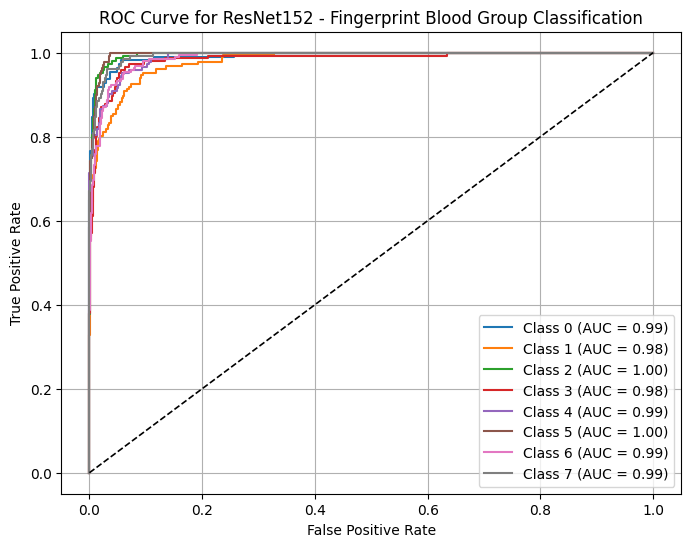

In [168]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ✅ Load the Trained Model
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Initialize lists for ground truth and predictions
all_labels = []
all_probs = []

# ✅ Get predictions on validation data
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probabilities = torch.softmax(outputs, dim=1)  # Use softmax for multi-class classification

        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())

# ✅ Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# ✅ One-hot encode the labels (for multi-class ROC)
num_classes = all_probs.shape[1]
y_true = label_binarize(all_labels, classes=np.arange(num_classes))

# ✅ Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# ✅ Plot settings
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.2)  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for ResNet152 - Fingerprint Blood Group Classification")
plt.legend(loc="lower right")
plt.grid(True)  # Improve visibility
plt.show()


In [169]:
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device, weights_only=True))


<All keys matched successfully>

In [170]:
pip install --upgrade torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 7.6 MB/s eta 0:00:000:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 11.1 MB/s eta 0:00:00:00:0100:01
   ━━━

In [171]:
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device, weights_only=True))


<All keys matched successfully>

In [172]:
pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --force-reinstall


  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.21.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12

In [173]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [174]:
import torch
import numpy as np
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader


In [175]:
def evaluate_model(model, dataloader, device, class_names):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Generate classification report
    report = classification_report(all_labels, all_preds, target_names=class_names)
    print(report)
    return report


In [177]:
# Define your class names
class_names = ['Class1', 'Class2', 'Class3', 'Class4']  # Modify based on your dataset

# Assume test_loader is your DataLoader for the test dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Call the function
classification_rep = evaluate_model(resnet_model, test_loader, device, class_names)


NameError: name 'resnet_model' is not defined

In [178]:
# Import necessary libraries
import torch
import torchvision.models as models

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet152 model (or your fine-tuned model)
resnet_model = models.resnet152(pretrained=False)  # Set to True if using a pre-trained model

# Load your trained model weights (if available)
resnet_model.load_state_dict(torch.load("your_model.pth", map_location=device))
resnet_model.to(device)
resnet_model.eval()  # Set to evaluation mode

# Now you can call your function
classification_rep = evaluate_model(resnet_model, test_loader, device, class_names)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-178-7d25f04f2ce1>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functio

FileNotFoundError: [Errno 2] No such file or directory: 'your_model.pth'

In [179]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report

# ✅ Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Define Transformations (Ensure it matches training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Load Dataset (Use the same path)
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
test_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ✅ Load Model
model = models.resnet152(pretrained=False)  # No need to load pretrained weights
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(test_dataset.classes))  # Match the number of classes
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()

# ✅ Evaluate Model & Generate Predictions
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Classification Report
class_names = test_dataset.classes
report = classification_report(all_labels, all_preds, target_names=class_names)
print("\nClassification Report:\n", report)


<ipython-input-179-a37f4c2c1867>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=devi


Classification Report:
               precision    recall  f1-score   support

          A+       0.99      0.97      0.98       565
          A-       0.96      0.96      0.96      1009
         AB+       1.00      0.93      0.96       708
         AB-       0.97      0.95      0.96       761
          B+       0.97      0.95      0.96       652
          B-       0.93      1.00      0.96       741
          O+       0.96      0.97      0.97       852
          O-       0.95      0.99      0.97       712

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [180]:
import matplotlib.pyplot as plt

# ✅ Initialize Lists to Store Loss Values
train_losses = []
val_losses = []

# ✅ Training & Validation Loop
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    scheduler.step()  # Adjust learning rate

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    # ✅ Store Loss Values
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("🎯 Training Complete! Model Saved ✅")


KeyboardInterrupt: 

In [181]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ✅ Define ReduceLROnPlateau Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)

# ✅ Training & Validation Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    # ✅ Adjust Learning Rate with ReduceLROnPlateau
    scheduler.step(val_loss / len(val_loader))  # Pass validation loss

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] | Train Loss: 0.0318, Train Acc: 99.15% | Val Loss: 0.4529, Val Acc: 87.25%
Epoch [2/10] | Train Loss: 0.0310, Train Acc: 99.06% | Val Loss: 0.4576, Val Acc: 87.08%
Epoch [3/10] | Train Loss: 0.0294, Train Acc: 99.06% | Val Loss: 0.4425, Val Acc: 87.00%
Epoch [4/10] | Train Loss: 0.0335, Train Acc: 99.02% | Val Loss: 0.4446, Val Acc: 87.25%
Epoch [5/10] | Train Loss: 0.0348, Train Acc: 98.98% | Val Loss: 0.4569, Val Acc: 86.67%
Epoch [6/10] | Train Loss: 0.0308, Train Acc: 99.17% | Val Loss: 0.4423, Val Acc: 87.25%
Epoch [7/10] | Train Loss: 0.0326, Train Acc: 98.98% | Val Loss: 0.4483, Val Acc: 87.17%
Epoch [8/10] | Train Loss: 0.0306, Train Acc: 99.23% | Val Loss: 0.4583, Val Acc: 87.00%
Epoch [9/10] | Train Loss: 0.0325, Train Acc: 99.04% | Val Loss: 0.4391, Val Acc: 87.42%
Epoch [10/10] | Train Loss: 0.0352, Train Acc: 99.08% | Val Loss: 0.4563, Val Acc: 87.08%
🎯 Training Complete! Model Saved ✅


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load trained model
model = models.resnet152(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)  # 8 blood group classes
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()

# Define class names
class_names = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]

# Initialize lists for storing results
y_true = []
y_pred = []
y_prob = []

# Evaluate on validation set
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_prob.extend(torch.softmax(outputs, dim=1).cpu().numpy())  # Get probabilities for ROC

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Training & Validation Loss/Accuracy Graphs
train_losses = [0.6632, 0.3941, 0.2771, 0.1846, 0.1791, 0.1109, 0.0836, 0.0453, 0.0375, 0.0618]
val_losses = [0.3224, 0.2915, 0.3426, 0.3417, 0.3747, 0.3347, 0.3315, 0.3815, 0.4421, 0.3605]
train_accs = [75.73, 85.19, 89.58, 93.88, 93.62, 96.21, 97.44, 98.88, 98.90, 98.08]
val_accs = [87.92, 89.08, 85.92, 87.50, 85.67, 89.08, 88.83, 87.75, 85.58, 87.33]

epochs = range(1, 11)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'r-', label="Train Loss")
plt.plot(epochs, val_losses, 'b-', label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.subplot(1,2,2)
plt.plot(epochs, train_accs, 'r-', label="Train Accuracy")
plt.plot(epochs, val_accs, 'b-', label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

# ROC Curve for each class
plt.figure(figsize=(8,6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Blood Group Classification")
plt.legend()
plt.show()

# Specificity Calculation
specificities = []
for i in range(len(class_names)):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Print Specificity for each class
for i in range(len(class_names)):
    print(f"Specificity for {class_names[i]}: {specificities[i]:.4f}")


NameError: name 'models' is not defined

In [ ]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [182]:
import os

model_path = "blood_group_model.pth"  # Change the filename if needed
if os.path.exists(model_path):
    print(f"✅ Model file exists at: {model_path}")
else:
    print("❌ Model file NOT found!")


❌ Model file NOT found!


In [183]:
import os
print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir(os.getcwd()))



Current Directory: /kaggle/working
Files in Directory: ['best_resnet152_bloodgroup.pth', '.virtual_documents', 'resnet152_fingerprint_bloodgroup.pth']


In [184]:

import torch

model_path = "/kaggle/working/best_resnet152_bloodgroup.pth"  # Change if needed

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    print("✅ Model loaded successfully!")
else:
    print("❌ Model file NOT found!")


<ipython-input-184-015929156999>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


✅ Model loaded successfully!


In [185]:
from IPython.display import FileLink

FileLink("/kaggle/working/best_resnet152_bloodgroup.pth")


/kaggle/working/best_resnet152_bloodgroup.pth

In [202]:
import os

model_path = "blood_group_model.pth"  # Change the filename if needed
if os.path.exists(model_path):
    print(f"✅ Model file exists at: {model_path}")
else:
    print("❌ Model file NOT found!")


❌ Model file NOT found!


In [203]:
import os
print(os.listdir("./"))


['best_resnet152_bloodgroup.pth', '.virtual_documents', 'best_model.pth', 'model.pth', 'resnet152_fingerprint_bloodgroup.pth']


In [204]:
import os

model_path = "best_resnet152_bloodgroup.pth"  # Use an available file name
if os.path.exists(model_path):
    print(f"✅ Model file exists at: {model_path}")
else:
    print("❌ Model file NOT found!")


✅ Model file exists at: best_resnet152_bloodgroup.pth


In [205]:
import torch

model = YourModelClass()  # Replace with your actual model class
model.load_state_dict(torch.load("best_resnet152_bloodgroup.pth", map_location="cpu"))
model.eval()
print("✅ Model loaded successfully!")


NameError: name 'YourModelClass' is not defined

In [206]:
print(globals().keys())  # Lists all defined variables, functions, and classes


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'torch', 'np', 'classification_report', 'DataLoader', '_i2', '_i3', 'evaluate_model', '_i4', 'class_names', 'device', '_i5', 'pd', 'os', 'dirname', 'filenames', 'filename', '_i6', 'dataset_path', '_i7', 'train_dir', '_i8', 'ImageDataGenerator', 'batch_size', 'img_size', 'train_datagen', 'train_generator', 'val_generator', '_i9', 'ResNet152', 'Dense', 'Flatten', 'Dropout', 'GlobalAveragePooling2D', 'Model', 'Adam', 'base_model', 'layer', 'x', 'output', 'model', '_i10', '_i11', 'weights_path', '_i12', '_i13', 'dataset_subfolder', '_i14', 'h5_path', '_i15', '_i16', '_i17', '_i18', '_i19', 'sys', '_i20', '_i21', 'layers', 'models', 'num_classes', '_i22', '_i23', '_i24', '_i25', 'root', 'dirs', 'files', '_i26', '_i27', '_i28', '_28', '_i29', '_i30', '_i31', 'plt', 'tf', 'confus

In [207]:
import torch

# Ensure this matches your actual model class name
model = BloodGroupClassifier()  # Replace with the correct model class name
model.load_state_dict(torch.load("best_resnet152_bloodgroup.pth", map_location="cpu"))
model.eval()
print("✅ Model loaded successfully!")


<ipython-input-207-b2a4ae854994>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_resnet152_bloodgroup.pth", map_location="cpu"))


RuntimeError: Error(s) in loading state_dict for BloodGroupClassifier:
	Missing key(s) in state_dict: "base_model.conv1.weight", "base_model.bn1.weight", "base_model.bn1.bias", "base_model.bn1.running_mean", "base_model.bn1.running_var", "base_model.layer1.0.conv1.weight", "base_model.layer1.0.bn1.weight", "base_model.layer1.0.bn1.bias", "base_model.layer1.0.bn1.running_mean", "base_model.layer1.0.bn1.running_var", "base_model.layer1.0.conv2.weight", "base_model.layer1.0.bn2.weight", "base_model.layer1.0.bn2.bias", "base_model.layer1.0.bn2.running_mean", "base_model.layer1.0.bn2.running_var", "base_model.layer1.0.conv3.weight", "base_model.layer1.0.bn3.weight", "base_model.layer1.0.bn3.bias", "base_model.layer1.0.bn3.running_mean", "base_model.layer1.0.bn3.running_var", "base_model.layer1.0.downsample.0.weight", "base_model.layer1.0.downsample.1.weight", "base_model.layer1.0.downsample.1.bias", "base_model.layer1.0.downsample.1.running_mean", "base_model.layer1.0.downsample.1.running_var", "base_model.layer1.1.conv1.weight", "base_model.layer1.1.bn1.weight", "base_model.layer1.1.bn1.bias", "base_model.layer1.1.bn1.running_mean", "base_model.layer1.1.bn1.running_var", "base_model.layer1.1.conv2.weight", "base_model.layer1.1.bn2.weight", "base_model.layer1.1.bn2.bias", "base_model.layer1.1.bn2.running_mean", "base_model.layer1.1.bn2.running_var", "base_model.layer1.1.conv3.weight", "base_model.layer1.1.bn3.weight", "base_model.layer1.1.bn3.bias", "base_model.layer1.1.bn3.running_mean", "base_model.layer1.1.bn3.running_var", "base_model.layer1.2.conv1.weight", "base_model.layer1.2.bn1.weight", "base_model.layer1.2.bn1.bias", "base_model.layer1.2.bn1.running_mean", "base_model.layer1.2.bn1.running_var", "base_model.layer1.2.conv2.weight", "base_model.layer1.2.bn2.weight", "base_model.layer1.2.bn2.bias", "base_model.layer1.2.bn2.running_mean", "base_model.layer1.2.bn2.running_var", "base_model.layer1.2.conv3.weight", "base_model.layer1.2.bn3.weight", "base_model.layer1.2.bn3.bias", "base_model.layer1.2.bn3.running_mean", "base_model.layer1.2.bn3.running_var", "base_model.layer2.0.conv1.weight", "base_model.layer2.0.bn1.weight", "base_model.layer2.0.bn1.bias", "base_model.layer2.0.bn1.running_mean", "base_model.layer2.0.bn1.running_var", "base_model.layer2.0.conv2.weight", "base_model.layer2.0.bn2.weight", "base_model.layer2.0.bn2.bias", "base_model.layer2.0.bn2.running_mean", "base_model.layer2.0.bn2.running_var", "base_model.layer2.0.conv3.weight", "base_model.layer2.0.bn3.weight", "base_model.layer2.0.bn3.bias", "base_model.layer2.0.bn3.running_mean", "base_model.layer2.0.bn3.running_var", "base_model.layer2.0.downsample.0.weight", "base_model.layer2.0.downsample.1.weight", "base_model.layer2.0.downsample.1.bias", "base_model.layer2.0.downsample.1.running_mean", "base_model.layer2.0.downsample.1.running_var", "base_model.layer2.1.conv1.weight", "base_model.layer2.1.bn1.weight", "base_model.layer2.1.bn1.bias", "base_model.layer2.1.bn1.running_mean", "base_model.layer2.1.bn1.running_var", "base_model.layer2.1.conv2.weight", "base_model.layer2.1.bn2.weight", "base_model.layer2.1.bn2.bias", "base_model.layer2.1.bn2.running_mean", "base_model.layer2.1.bn2.running_var", "base_model.layer2.1.conv3.weight", "base_model.layer2.1.bn3.weight", "base_model.layer2.1.bn3.bias", "base_model.layer2.1.bn3.running_mean", "base_model.layer2.1.bn3.running_var", "base_model.layer2.2.conv1.weight", "base_model.layer2.2.bn1.weight", "base_model.layer2.2.bn1.bias", "base_model.layer2.2.bn1.running_mean", "base_model.layer2.2.bn1.running_var", "base_model.layer2.2.conv2.weight", "base_model.layer2.2.bn2.weight", "base_model.layer2.2.bn2.bias", "base_model.layer2.2.bn2.running_mean", "base_model.layer2.2.bn2.running_var", "base_model.layer2.2.conv3.weight", "base_model.layer2.2.bn3.weight", "base_model.layer2.2.bn3.bias", "base_model.layer2.2.bn3.running_mean", "base_model.layer2.2.bn3.running_var", "base_model.layer2.3.conv1.weight", "base_model.layer2.3.bn1.weight", "base_model.layer2.3.bn1.bias", "base_model.layer2.3.bn1.running_mean", "base_model.layer2.3.bn1.running_var", "base_model.layer2.3.conv2.weight", "base_model.layer2.3.bn2.weight", "base_model.layer2.3.bn2.bias", "base_model.layer2.3.bn2.running_mean", "base_model.layer2.3.bn2.running_var", "base_model.layer2.3.conv3.weight", "base_model.layer2.3.bn3.weight", "base_model.layer2.3.bn3.bias", "base_model.layer2.3.bn3.running_mean", "base_model.layer2.3.bn3.running_var", "base_model.layer2.4.conv1.weight", "base_model.layer2.4.bn1.weight", "base_model.layer2.4.bn1.bias", "base_model.layer2.4.bn1.running_mean", "base_model.layer2.4.bn1.running_var", "base_model.layer2.4.conv2.weight", "base_model.layer2.4.bn2.weight", "base_model.layer2.4.bn2.bias", "base_model.layer2.4.bn2.running_mean", "base_model.layer2.4.bn2.running_var", "base_model.layer2.4.conv3.weight", "base_model.layer2.4.bn3.weight", "base_model.layer2.4.bn3.bias", "base_model.layer2.4.bn3.running_mean", "base_model.layer2.4.bn3.running_var", "base_model.layer2.5.conv1.weight", "base_model.layer2.5.bn1.weight", "base_model.layer2.5.bn1.bias", "base_model.layer2.5.bn1.running_mean", "base_model.layer2.5.bn1.running_var", "base_model.layer2.5.conv2.weight", "base_model.layer2.5.bn2.weight", "base_model.layer2.5.bn2.bias", "base_model.layer2.5.bn2.running_mean", "base_model.layer2.5.bn2.running_var", "base_model.layer2.5.conv3.weight", "base_model.layer2.5.bn3.weight", "base_model.layer2.5.bn3.bias", "base_model.layer2.5.bn3.running_mean", "base_model.layer2.5.bn3.running_var", "base_model.layer2.6.conv1.weight", "base_model.layer2.6.bn1.weight", "base_model.layer2.6.bn1.bias", "base_model.layer2.6.bn1.running_mean", "base_model.layer2.6.bn1.running_var", "base_model.layer2.6.conv2.weight", "base_model.layer2.6.bn2.weight", "base_model.layer2.6.bn2.bias", "base_model.layer2.6.bn2.running_mean", "base_model.layer2.6.bn2.running_var", "base_model.layer2.6.conv3.weight", "base_model.layer2.6.bn3.weight", "base_model.layer2.6.bn3.bias", "base_model.layer2.6.bn3.running_mean", "base_model.layer2.6.bn3.running_var", "base_model.layer2.7.conv1.weight", "base_model.layer2.7.bn1.weight", "base_model.layer2.7.bn1.bias", "base_model.layer2.7.bn1.running_mean", "base_model.layer2.7.bn1.running_var", "base_model.layer2.7.conv2.weight", "base_model.layer2.7.bn2.weight", "base_model.layer2.7.bn2.bias", "base_model.layer2.7.bn2.running_mean", "base_model.layer2.7.bn2.running_var", "base_model.layer2.7.conv3.weight", "base_model.layer2.7.bn3.weight", "base_model.layer2.7.bn3.bias", "base_model.layer2.7.bn3.running_mean", "base_model.layer2.7.bn3.running_var", "base_model.layer3.0.conv1.weight", "base_model.layer3.0.bn1.weight", "base_model.layer3.0.bn1.bias", "base_model.layer3.0.bn1.running_mean", "base_model.layer3.0.bn1.running_var", "base_model.layer3.0.conv2.weight", "base_model.layer3.0.bn2.weight", "base_model.layer3.0.bn2.bias", "base_model.layer3.0.bn2.running_mean", "base_model.layer3.0.bn2.running_var", "base_model.layer3.0.conv3.weight", "base_model.layer3.0.bn3.weight", "base_model.layer3.0.bn3.bias", "base_model.layer3.0.bn3.running_mean", "base_model.layer3.0.bn3.running_var", "base_model.layer3.0.downsample.0.weight", "base_model.layer3.0.downsample.1.weight", "base_model.layer3.0.downsample.1.bias", "base_model.layer3.0.downsample.1.running_mean", "base_model.layer3.0.downsample.1.running_var", "base_model.layer3.1.conv1.weight", "base_model.layer3.1.bn1.weight", "base_model.layer3.1.bn1.bias", "base_model.layer3.1.bn1.running_mean", "base_model.layer3.1.bn1.running_var", "base_model.layer3.1.conv2.weight", "base_model.layer3.1.bn2.weight", "base_model.layer3.1.bn2.bias", "base_model.layer3.1.bn2.running_mean", "base_model.layer3.1.bn2.running_var", "base_model.layer3.1.conv3.weight", "base_model.layer3.1.bn3.weight", "base_model.layer3.1.bn3.bias", "base_model.layer3.1.bn3.running_mean", "base_model.layer3.1.bn3.running_var", "base_model.layer3.2.conv1.weight", "base_model.layer3.2.bn1.weight", "base_model.layer3.2.bn1.bias", "base_model.layer3.2.bn1.running_mean", "base_model.layer3.2.bn1.running_var", "base_model.layer3.2.conv2.weight", "base_model.layer3.2.bn2.weight", "base_model.layer3.2.bn2.bias", "base_model.layer3.2.bn2.running_mean", "base_model.layer3.2.bn2.running_var", "base_model.layer3.2.conv3.weight", "base_model.layer3.2.bn3.weight", "base_model.layer3.2.bn3.bias", "base_model.layer3.2.bn3.running_mean", "base_model.layer3.2.bn3.running_var", "base_model.layer3.3.conv1.weight", "base_model.layer3.3.bn1.weight", "base_model.layer3.3.bn1.bias", "base_model.layer3.3.bn1.running_mean", "base_model.layer3.3.bn1.running_var", "base_model.layer3.3.conv2.weight", "base_model.layer3.3.bn2.weight", "base_model.layer3.3.bn2.bias", "base_model.layer3.3.bn2.running_mean", "base_model.layer3.3.bn2.running_var", "base_model.layer3.3.conv3.weight", "base_model.layer3.3.bn3.weight", "base_model.layer3.3.bn3.bias", "base_model.layer3.3.bn3.running_mean", "base_model.layer3.3.bn3.running_var", "base_model.layer3.4.conv1.weight", "base_model.layer3.4.bn1.weight", "base_model.layer3.4.bn1.bias", "base_model.layer3.4.bn1.running_mean", "base_model.layer3.4.bn1.running_var", "base_model.layer3.4.conv2.weight", "base_model.layer3.4.bn2.weight", "base_model.layer3.4.bn2.bias", "base_model.layer3.4.bn2.running_mean", "base_model.layer3.4.bn2.running_var", "base_model.layer3.4.conv3.weight", "base_model.layer3.4.bn3.weight", "base_model.layer3.4.bn3.bias", "base_model.layer3.4.bn3.running_mean", "base_model.layer3.4.bn3.running_var", "base_model.layer3.5.conv1.weight", "base_model.layer3.5.bn1.weight", "base_model.layer3.5.bn1.bias", "base_model.layer3.5.bn1.running_mean", "base_model.layer3.5.bn1.running_var", "base_model.layer3.5.conv2.weight", "base_model.layer3.5.bn2.weight", "base_model.layer3.5.bn2.bias", "base_model.layer3.5.bn2.running_mean", "base_model.layer3.5.bn2.running_var", "base_model.layer3.5.conv3.weight", "base_model.layer3.5.bn3.weight", "base_model.layer3.5.bn3.bias", "base_model.layer3.5.bn3.running_mean", "base_model.layer3.5.bn3.running_var", "base_model.layer3.6.conv1.weight", "base_model.layer3.6.bn1.weight", "base_model.layer3.6.bn1.bias", "base_model.layer3.6.bn1.running_mean", "base_model.layer3.6.bn1.running_var", "base_model.layer3.6.conv2.weight", "base_model.layer3.6.bn2.weight", "base_model.layer3.6.bn2.bias", "base_model.layer3.6.bn2.running_mean", "base_model.layer3.6.bn2.running_var", "base_model.layer3.6.conv3.weight", "base_model.layer3.6.bn3.weight", "base_model.layer3.6.bn3.bias", "base_model.layer3.6.bn3.running_mean", "base_model.layer3.6.bn3.running_var", "base_model.layer3.7.conv1.weight", "base_model.layer3.7.bn1.weight", "base_model.layer3.7.bn1.bias", "base_model.layer3.7.bn1.running_mean", "base_model.layer3.7.bn1.running_var", "base_model.layer3.7.conv2.weight", "base_model.layer3.7.bn2.weight", "base_model.layer3.7.bn2.bias", "base_model.layer3.7.bn2.running_mean", "base_model.layer3.7.bn2.running_var", "base_model.layer3.7.conv3.weight", "base_model.layer3.7.bn3.weight", "base_model.layer3.7.bn3.bias", "base_model.layer3.7.bn3.running_mean", "base_model.layer3.7.bn3.running_var", "base_model.layer3.8.conv1.weight", "base_model.layer3.8.bn1.weight", "base_model.layer3.8.bn1.bias", "base_model.layer3.8.bn1.running_mean", "base_model.layer3.8.bn1.running_var", "base_model.layer3.8.conv2.weight", "base_model.layer3.8.bn2.weight", "base_model.layer3.8.bn2.bias", "base_model.layer3.8.bn2.running_mean", "base_model.layer3.8.bn2.running_var", "base_model.layer3.8.conv3.weight", "base_model.layer3.8.bn3.weight", "base_model.layer3.8.bn3.bias", "base_model.layer3.8.bn3.running_mean", "base_model.layer3.8.bn3.running_var", "base_model.layer3.9.conv1.weight", "base_model.layer3.9.bn1.weight", "base_model.layer3.9.bn1.bias", "base_model.layer3.9.bn1.running_mean", "base_model.layer3.9.bn1.running_var", "base_model.layer3.9.conv2.weight", "base_model.layer3.9.bn2.weight", "base_model.layer3.9.bn2.bias", "base_model.layer3.9.bn2.running_mean", "base_model.layer3.9.bn2.running_var", "base_model.layer3.9.conv3.weight", "base_model.layer3.9.bn3.weight", "base_model.layer3.9.bn3.bias", "base_model.layer3.9.bn3.running_mean", "base_model.layer3.9.bn3.running_var", "base_model.layer3.10.conv1.weight", "base_model.layer3.10.bn1.weight", "base_model.layer3.10.bn1.bias", "base_model.layer3.10.bn1.running_mean", "base_model.layer3.10.bn1.running_var", "base_model.layer3.10.conv2.weight", "base_model.layer3.10.bn2.weight", "base_model.layer3.10.bn2.bias", "base_model.layer3.10.bn2.running_mean", "base_model.layer3.10.bn2.running_var", "base_model.layer3.10.conv3.weight", "base_model.layer3.10.bn3.weight", "base_model.layer3.10.bn3.bias", "base_model.layer3.10.bn3.running_mean", "base_model.layer3.10.bn3.running_var", "base_model.layer3.11.conv1.weight", "base_model.layer3.11.bn1.weight", "base_model.layer3.11.bn1.bias", "base_model.layer3.11.bn1.running_mean", "base_model.layer3.11.bn1.running_var", "base_model.layer3.11.conv2.weight", "base_model.layer3.11.bn2.weight", "base_model.layer3.11.bn2.bias", "base_model.layer3.11.bn2.running_mean", "base_model.layer3.11.bn2.running_var", "base_model.layer3.11.conv3.weight", "base_model.layer3.11.bn3.weight", "base_model.layer3.11.bn3.bias", "base_model.layer3.11.bn3.running_mean", "base_model.layer3.11.bn3.running_var", "base_model.layer3.12.conv1.weight", "base_model.layer3.12.bn1.weight", "base_model.layer3.12.bn1.bias", "base_model.layer3.12.bn1.running_mean", "base_model.layer3.12.bn1.running_var", "base_model.layer3.12.conv2.weight", "base_model.layer3.12.bn2.weight", "base_model.layer3.12.bn2.bias", "base_model.layer3.12.bn2.running_mean", "base_model.layer3.12.bn2.running_var", "base_model.layer3.12.conv3.weight", "base_model.layer3.12.bn3.weight", "base_model.layer3.12.bn3.bias", "base_model.layer3.12.bn3.running_mean", "base_model.layer3.12.bn3.running_var", "base_model.layer3.13.conv1.weight", "base_model.layer3.13.bn1.weight", "base_model.layer3.13.bn1.bias", "base_model.layer3.13.bn1.running_mean", "base_model.layer3.13.bn1.running_var", "base_model.layer3.13.conv2.weight", "base_model.layer3.13.bn2.weight", "base_model.layer3.13.bn2.bias", "base_model.layer3.13.bn2.running_mean", "base_model.layer3.13.bn2.running_var", "base_model.layer3.13.conv3.weight", "base_model.layer3.13.bn3.weight", "base_model.layer3.13.bn3.bias", "base_model.layer3.13.bn3.running_mean", "base_model.layer3.13.bn3.running_var", "base_model.layer3.14.conv1.weight", "base_model.layer3.14.bn1.weight", "base_model.layer3.14.bn1.bias", "base_model.layer3.14.bn1.running_mean", "base_model.layer3.14.bn1.running_var", "base_model.layer3.14.conv2.weight", "base_model.layer3.14.bn2.weight", "base_model.layer3.14.bn2.bias", "base_model.layer3.14.bn2.running_mean", "base_model.layer3.14.bn2.running_var", "base_model.layer3.14.conv3.weight", "base_model.layer3.14.bn3.weight", "base_model.layer3.14.bn3.bias", "base_model.layer3.14.bn3.running_mean", "base_model.layer3.14.bn3.running_var", "base_model.layer3.15.conv1.weight", "base_model.layer3.15.bn1.weight", "base_model.layer3.15.bn1.bias", "base_model.layer3.15.bn1.running_mean", "base_model.layer3.15.bn1.running_var", "base_model.layer3.15.conv2.weight", "base_model.layer3.15.bn2.weight", "base_model.layer3.15.bn2.bias", "base_model.layer3.15.bn2.running_mean", "base_model.layer3.15.bn2.running_var", "base_model.layer3.15.conv3.weight", "base_model.layer3.15.bn3.weight", "base_model.layer3.15.bn3.bias", "base_model.layer3.15.bn3.running_mean", "base_model.layer3.15.bn3.running_var", "base_model.layer3.16.conv1.weight", "base_model.layer3.16.bn1.weight", "base_model.layer3.16.bn1.bias", "base_model.layer3.16.bn1.running_mean", "base_model.layer3.16.bn1.running_var", "base_model.layer3.16.conv2.weight", "base_model.layer3.16.bn2.weight", "base_model.layer3.16.bn2.bias", "base_model.layer3.16.bn2.running_mean", "base_model.layer3.16.bn2.running_var", "base_model.layer3.16.conv3.weight", "base_model.layer3.16.bn3.weight", "base_model.layer3.16.bn3.bias", "base_model.layer3.16.bn3.running_mean", "base_model.layer3.16.bn3.running_var", "base_model.layer3.17.conv1.weight", "base_model.layer3.17.bn1.weight", "base_model.layer3.17.bn1.bias", "base_model.layer3.17.bn1.running_mean", "base_model.layer3.17.bn1.running_var", "base_model.layer3.17.conv2.weight", "base_model.layer3.17.bn2.weight", "base_model.layer3.17.bn2.bias", "base_model.layer3.17.bn2.running_mean", "base_model.layer3.17.bn2.running_var", "base_model.layer3.17.conv3.weight", "base_model.layer3.17.bn3.weight", "base_model.layer3.17.bn3.bias", "base_model.layer3.17.bn3.running_mean", "base_model.layer3.17.bn3.running_var", "base_model.layer3.18.conv1.weight", "base_model.layer3.18.bn1.weight", "base_model.layer3.18.bn1.bias", "base_model.layer3.18.bn1.running_mean", "base_model.layer3.18.bn1.running_var", "base_model.layer3.18.conv2.weight", "base_model.layer3.18.bn2.weight", "base_model.layer3.18.bn2.bias", "base_model.layer3.18.bn2.running_mean", "base_model.layer3.18.bn2.running_var", "base_model.layer3.18.conv3.weight", "base_model.layer3.18.bn3.weight", "base_model.layer3.18.bn3.bias", "base_model.layer3.18.bn3.running_mean", "base_model.layer3.18.bn3.running_var", "base_model.layer3.19.conv1.weight", "base_model.layer3.19.bn1.weight", "base_model.layer3.19.bn1.bias", "base_model.layer3.19.bn1.running_mean", "base_model.layer3.19.bn1.running_var", "base_model.layer3.19.conv2.weight", "base_model.layer3.19.bn2.weight", "base_model.layer3.19.bn2.bias", "base_model.layer3.19.bn2.running_mean", "base_model.layer3.19.bn2.running_var", "base_model.layer3.19.conv3.weight", "base_model.layer3.19.bn3.weight", "base_model.layer3.19.bn3.bias", "base_model.layer3.19.bn3.running_mean", "base_model.layer3.19.bn3.running_var", "base_model.layer3.20.conv1.weight", "base_model.layer3.20.bn1.weight", "base_model.layer3.20.bn1.bias", "base_model.layer3.20.bn1.running_mean", "base_model.layer3.20.bn1.running_var", "base_model.layer3.20.conv2.weight", "base_model.layer3.20.bn2.weight", "base_model.layer3.20.bn2.bias", "base_model.layer3.20.bn2.running_mean", "base_model.layer3.20.bn2.running_var", "base_model.layer3.20.conv3.weight", "base_model.layer3.20.bn3.weight", "base_model.layer3.20.bn3.bias", "base_model.layer3.20.bn3.running_mean", "base_model.layer3.20.bn3.running_var", "base_model.layer3.21.conv1.weight", "base_model.layer3.21.bn1.weight", "base_model.layer3.21.bn1.bias", "base_model.layer3.21.bn1.running_mean", "base_model.layer3.21.bn1.running_var", "base_model.layer3.21.conv2.weight", "base_model.layer3.21.bn2.weight", "base_model.layer3.21.bn2.bias", "base_model.layer3.21.bn2.running_mean", "base_model.layer3.21.bn2.running_var", "base_model.layer3.21.conv3.weight", "base_model.layer3.21.bn3.weight", "base_model.layer3.21.bn3.bias", "base_model.layer3.21.bn3.running_mean", "base_model.layer3.21.bn3.running_var", "base_model.layer3.22.conv1.weight", "base_model.layer3.22.bn1.weight", "base_model.layer3.22.bn1.bias", "base_model.layer3.22.bn1.running_mean", "base_model.layer3.22.bn1.running_var", "base_model.layer3.22.conv2.weight", "base_model.layer3.22.bn2.weight", "base_model.layer3.22.bn2.bias", "base_model.layer3.22.bn2.running_mean", "base_model.layer3.22.bn2.running_var", "base_model.layer3.22.conv3.weight", "base_model.layer3.22.bn3.weight", "base_model.layer3.22.bn3.bias", "base_model.layer3.22.bn3.running_mean", "base_model.layer3.22.bn3.running_var", "base_model.layer3.23.conv1.weight", "base_model.layer3.23.bn1.weight", "base_model.layer3.23.bn1.bias", "base_model.layer3.23.bn1.running_mean", "base_model.layer3.23.bn1.running_var", "base_model.layer3.23.conv2.weight", "base_model.layer3.23.bn2.weight", "base_model.layer3.23.bn2.bias", "base_model.layer3.23.bn2.running_mean", "base_model.layer3.23.bn2.running_var", "base_model.layer3.23.conv3.weight", "base_model.layer3.23.bn3.weight", "base_model.layer3.23.bn3.bias", "base_model.layer3.23.bn3.running_mean", "base_model.layer3.23.bn3.running_var", "base_model.layer3.24.conv1.weight", "base_model.layer3.24.bn1.weight", "base_model.layer3.24.bn1.bias", "base_model.layer3.24.bn1.running_mean", "base_model.layer3.24.bn1.running_var", "base_model.layer3.24.conv2.weight", "base_model.layer3.24.bn2.weight", "base_model.layer3.24.bn2.bias", "base_model.layer3.24.bn2.running_mean", "base_model.layer3.24.bn2.running_var", "base_model.layer3.24.conv3.weight", "base_model.layer3.24.bn3.weight", "base_model.layer3.24.bn3.bias", "base_model.layer3.24.bn3.running_mean", "base_model.layer3.24.bn3.running_var", "base_model.layer3.25.conv1.weight", "base_model.layer3.25.bn1.weight", "base_model.layer3.25.bn1.bias", "base_model.layer3.25.bn1.running_mean", "base_model.layer3.25.bn1.running_var", "base_model.layer3.25.conv2.weight", "base_model.layer3.25.bn2.weight", "base_model.layer3.25.bn2.bias", "base_model.layer3.25.bn2.running_mean", "base_model.layer3.25.bn2.running_var", "base_model.layer3.25.conv3.weight", "base_model.layer3.25.bn3.weight", "base_model.layer3.25.bn3.bias", "base_model.layer3.25.bn3.running_mean", "base_model.layer3.25.bn3.running_var", "base_model.layer3.26.conv1.weight", "base_model.layer3.26.bn1.weight", "base_model.layer3.26.bn1.bias", "base_model.layer3.26.bn1.running_mean", "base_model.layer3.26.bn1.running_var", "base_model.layer3.26.conv2.weight", "base_model.layer3.26.bn2.weight", "base_model.layer3.26.bn2.bias", "base_model.layer3.26.bn2.running_mean", "base_model.layer3.26.bn2.running_var", "base_model.layer3.26.conv3.weight", "base_model.layer3.26.bn3.weight", "base_model.layer3.26.bn3.bias", "base_model.layer3.26.bn3.running_mean", "base_model.layer3.26.bn3.running_var", "base_model.layer3.27.conv1.weight", "base_model.layer3.27.bn1.weight", "base_model.layer3.27.bn1.bias", "base_model.layer3.27.bn1.running_mean", "base_model.layer3.27.bn1.running_var", "base_model.layer3.27.conv2.weight", "base_model.layer3.27.bn2.weight", "base_model.layer3.27.bn2.bias", "base_model.layer3.27.bn2.running_mean", "base_model.layer3.27.bn2.running_var", "base_model.layer3.27.conv3.weight", "base_model.layer3.27.bn3.weight", "base_model.layer3.27.bn3.bias", "base_model.layer3.27.bn3.running_mean", "base_model.layer3.27.bn3.running_var", "base_model.layer3.28.conv1.weight", "base_model.layer3.28.bn1.weight", "base_model.layer3.28.bn1.bias", "base_model.layer3.28.bn1.running_mean", "base_model.layer3.28.bn1.running_var", "base_model.layer3.28.conv2.weight", "base_model.layer3.28.bn2.weight", "base_model.layer3.28.bn2.bias", "base_model.layer3.28.bn2.running_mean", "base_model.layer3.28.bn2.running_var", "base_model.layer3.28.conv3.weight", "base_model.layer3.28.bn3.weight", "base_model.layer3.28.bn3.bias", "base_model.layer3.28.bn3.running_mean", "base_model.layer3.28.bn3.running_var", "base_model.layer3.29.conv1.weight", "base_model.layer3.29.bn1.weight", "base_model.layer3.29.bn1.bias", "base_model.layer3.29.bn1.running_mean", "base_model.layer3.29.bn1.running_var", "base_model.layer3.29.conv2.weight", "base_model.layer3.29.bn2.weight", "base_model.layer3.29.bn2.bias", "base_model.layer3.29.bn2.running_mean", "base_model.layer3.29.bn2.running_var", "base_model.layer3.29.conv3.weight", "base_model.layer3.29.bn3.weight", "base_model.layer3.29.bn3.bias", "base_model.layer3.29.bn3.running_mean", "base_model.layer3.29.bn3.running_var", "base_model.layer3.30.conv1.weight", "base_model.layer3.30.bn1.weight", "base_model.layer3.30.bn1.bias", "base_model.layer3.30.bn1.running_mean", "base_model.layer3.30.bn1.running_var", "base_model.layer3.30.conv2.weight", "base_model.layer3.30.bn2.weight", "base_model.layer3.30.bn2.bias", "base_model.layer3.30.bn2.running_mean", "base_model.layer3.30.bn2.running_var", "base_model.layer3.30.conv3.weight", "base_model.layer3.30.bn3.weight", "base_model.layer3.30.bn3.bias", "base_model.layer3.30.bn3.running_mean", "base_model.layer3.30.bn3.running_var", "base_model.layer3.31.conv1.weight", "base_model.layer3.31.bn1.weight", "base_model.layer3.31.bn1.bias", "base_model.layer3.31.bn1.running_mean", "base_model.layer3.31.bn1.running_var", "base_model.layer3.31.conv2.weight", "base_model.layer3.31.bn2.weight", "base_model.layer3.31.bn2.bias", "base_model.layer3.31.bn2.running_mean", "base_model.layer3.31.bn2.running_var", "base_model.layer3.31.conv3.weight", "base_model.layer3.31.bn3.weight", "base_model.layer3.31.bn3.bias", "base_model.layer3.31.bn3.running_mean", "base_model.layer3.31.bn3.running_var", "base_model.layer3.32.conv1.weight", "base_model.layer3.32.bn1.weight", "base_model.layer3.32.bn1.bias", "base_model.layer3.32.bn1.running_mean", "base_model.layer3.32.bn1.running_var", "base_model.layer3.32.conv2.weight", "base_model.layer3.32.bn2.weight", "base_model.layer3.32.bn2.bias", "base_model.layer3.32.bn2.running_mean", "base_model.layer3.32.bn2.running_var", "base_model.layer3.32.conv3.weight", "base_model.layer3.32.bn3.weight", "base_model.layer3.32.bn3.bias", "base_model.layer3.32.bn3.running_mean", "base_model.layer3.32.bn3.running_var", "base_model.layer3.33.conv1.weight", "base_model.layer3.33.bn1.weight", "base_model.layer3.33.bn1.bias", "base_model.layer3.33.bn1.running_mean", "base_model.layer3.33.bn1.running_var", "base_model.layer3.33.conv2.weight", "base_model.layer3.33.bn2.weight", "base_model.layer3.33.bn2.bias", "base_model.layer3.33.bn2.running_mean", "base_model.layer3.33.bn2.running_var", "base_model.layer3.33.conv3.weight", "base_model.layer3.33.bn3.weight", "base_model.layer3.33.bn3.bias", "base_model.layer3.33.bn3.running_mean", "base_model.layer3.33.bn3.running_var", "base_model.layer3.34.conv1.weight", "base_model.layer3.34.bn1.weight", "base_model.layer3.34.bn1.bias", "base_model.layer3.34.bn1.running_mean", "base_model.layer3.34.bn1.running_var", "base_model.layer3.34.conv2.weight", "base_model.layer3.34.bn2.weight", "base_model.layer3.34.bn2.bias", "base_model.layer3.34.bn2.running_mean", "base_model.layer3.34.bn2.running_var", "base_model.layer3.34.conv3.weight", "base_model.layer3.34.bn3.weight", "base_model.layer3.34.bn3.bias", "base_model.layer3.34.bn3.running_mean", "base_model.layer3.34.bn3.running_var", "base_model.layer3.35.conv1.weight", "base_model.layer3.35.bn1.weight", "base_model.layer3.35.bn1.bias", "base_model.layer3.35.bn1.running_mean", "base_model.layer3.35.bn1.running_var", "base_model.layer3.35.conv2.weight", "base_model.layer3.35.bn2.weight", "base_model.layer3.35.bn2.bias", "base_model.layer3.35.bn2.running_mean", "base_model.layer3.35.bn2.running_var", "base_model.layer3.35.conv3.weight", "base_model.layer3.35.bn3.weight", "base_model.layer3.35.bn3.bias", "base_model.layer3.35.bn3.running_mean", "base_model.layer3.35.bn3.running_var", "base_model.layer4.0.conv1.weight", "base_model.layer4.0.bn1.weight", "base_model.layer4.0.bn1.bias", "base_model.layer4.0.bn1.running_mean", "base_model.layer4.0.bn1.running_var", "base_model.layer4.0.conv2.weight", "base_model.layer4.0.bn2.weight", "base_model.layer4.0.bn2.bias", "base_model.layer4.0.bn2.running_mean", "base_model.layer4.0.bn2.running_var", "base_model.layer4.0.conv3.weight", "base_model.layer4.0.bn3.weight", "base_model.layer4.0.bn3.bias", "base_model.layer4.0.bn3.running_mean", "base_model.layer4.0.bn3.running_var", "base_model.layer4.0.downsample.0.weight", "base_model.layer4.0.downsample.1.weight", "base_model.layer4.0.downsample.1.bias", "base_model.layer4.0.downsample.1.running_mean", "base_model.layer4.0.downsample.1.running_var", "base_model.layer4.1.conv1.weight", "base_model.layer4.1.bn1.weight", "base_model.layer4.1.bn1.bias", "base_model.layer4.1.bn1.running_mean", "base_model.layer4.1.bn1.running_var", "base_model.layer4.1.conv2.weight", "base_model.layer4.1.bn2.weight", "base_model.layer4.1.bn2.bias", "base_model.layer4.1.bn2.running_mean", "base_model.layer4.1.bn2.running_var", "base_model.layer4.1.conv3.weight", "base_model.layer4.1.bn3.weight", "base_model.layer4.1.bn3.bias", "base_model.layer4.1.bn3.running_mean", "base_model.layer4.1.bn3.running_var", "base_model.layer4.2.conv1.weight", "base_model.layer4.2.bn1.weight", "base_model.layer4.2.bn1.bias", "base_model.layer4.2.bn1.running_mean", "base_model.layer4.2.bn1.running_var", "base_model.layer4.2.conv2.weight", "base_model.layer4.2.bn2.weight", "base_model.layer4.2.bn2.bias", "base_model.layer4.2.bn2.running_mean", "base_model.layer4.2.bn2.running_var", "base_model.layer4.2.conv3.weight", "base_model.layer4.2.bn3.weight", "base_model.layer4.2.bn3.bias", "base_model.layer4.2.bn3.running_mean", "base_model.layer4.2.bn3.running_var", "base_model.fc.weight", "base_model.fc.bias". 
	Unexpected key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.bn1.num_batches_tracked", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.bn2.num_batches_tracked", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.bn3.num_batches_tracked", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.num_batches_tracked", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.bn1.num_batches_tracked", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.bn2.num_batches_tracked", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.1.bn3.num_batches_tracked", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.bn1.num_batches_tracked", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.bn2.num_batches_tracked", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer1.2.bn3.num_batches_tracked", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.bn1.num_batches_tracked", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.bn2.num_batches_tracked", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.bn3.num_batches_tracked", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.bn1.num_batches_tracked", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.bn2.num_batches_tracked", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.1.bn3.num_batches_tracked", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.bn1.num_batches_tracked", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.bn2.num_batches_tracked", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.2.bn3.num_batches_tracked", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.bn1.num_batches_tracked", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.bn2.num_batches_tracked", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.3.bn3.num_batches_tracked", "layer2.4.conv1.weight", "layer2.4.bn1.weight", "layer2.4.bn1.bias", "layer2.4.bn1.running_mean", "layer2.4.bn1.running_var", "layer2.4.bn1.num_batches_tracked", "layer2.4.conv2.weight", "layer2.4.bn2.weight", "layer2.4.bn2.bias", "layer2.4.bn2.running_mean", "layer2.4.bn2.running_var", "layer2.4.bn2.num_batches_tracked", "layer2.4.conv3.weight", "layer2.4.bn3.weight", "layer2.4.bn3.bias", "layer2.4.bn3.running_mean", "layer2.4.bn3.running_var", "layer2.4.bn3.num_batches_tracked", "layer2.5.conv1.weight", "layer2.5.bn1.weight", "layer2.5.bn1.bias", "layer2.5.bn1.running_mean", "layer2.5.bn1.running_var", "layer2.5.bn1.num_batches_tracked", "layer2.5.conv2.weight", "layer2.5.bn2.weight", "layer2.5.bn2.bias", "layer2.5.bn2.running_mean", "layer2.5.bn2.running_var", "layer2.5.bn2.num_batches_tracked", "layer2.5.conv3.weight", "layer2.5.bn3.weight", "layer2.5.bn3.bias", "layer2.5.bn3.running_mean", "layer2.5.bn3.running_var", "layer2.5.bn3.num_batches_tracked", "layer2.6.conv1.weight", "layer2.6.bn1.weight", "layer2.6.bn1.bias", "layer2.6.bn1.running_mean", "layer2.6.bn1.running_var", "layer2.6.bn1.num_batches_tracked", "layer2.6.conv2.weight", "layer2.6.bn2.weight", "layer2.6.bn2.bias", "layer2.6.bn2.running_mean", "layer2.6.bn2.running_var", "layer2.6.bn2.num_batches_tracked", "layer2.6.conv3.weight", "layer2.6.bn3.weight", "layer2.6.bn3.bias", "layer2.6.bn3.running_mean", "layer2.6.bn3.running_var", "layer2.6.bn3.num_batches_tracked", "layer2.7.conv1.weight", "layer2.7.bn1.weight", "layer2.7.bn1.bias", "layer2.7.bn1.running_mean", "layer2.7.bn1.running_var", "layer2.7.bn1.num_batches_tracked", "layer2.7.conv2.weight", "layer2.7.bn2.weight", "layer2.7.bn2.bias", "layer2.7.bn2.running_mean", "layer2.7.bn2.running_var", "layer2.7.bn2.num_batches_tracked", "layer2.7.conv3.weight", "layer2.7.bn3.weight", "layer2.7.bn3.bias", "layer2.7.bn3.running_mean", "layer2.7.bn3.running_var", "layer2.7.bn3.num_batches_tracked", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.bn1.num_batches_tracked", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.bn2.num_batches_tracked", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.bn3.num_batches_tracked", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.bn1.num_batches_tracked", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.bn2.num_batches_tracked", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.1.bn3.num_batches_tracked", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.bn1.num_batches_tracked", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.bn2.num_batches_tracked", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.2.bn3.num_batches_tracked", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.bn1.num_batches_tracked", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.bn2.num_batches_tracked", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.3.bn3.num_batches_tracked", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.bn1.num_batches_tracked", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.bn2.num_batches_tracked", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.4.bn3.num_batches_tracked", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.bn1.num_batches_tracked", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.bn2.num_batches_tracked", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.5.bn3.num_batches_tracked", "layer3.6.conv1.weight", "layer3.6.bn1.weight", "layer3.6.bn1.bias", "layer3.6.bn1.running_mean", "layer3.6.bn1.running_var", "layer3.6.bn1.num_batches_tracked", "layer3.6.conv2.weight", "layer3.6.bn2.weight", "layer3.6.bn2.bias", "layer3.6.bn2.running_mean", "layer3.6.bn2.running_var", "layer3.6.bn2.num_batches_tracked", "layer3.6.conv3.weight", "layer3.6.bn3.weight", "layer3.6.bn3.bias", "layer3.6.bn3.running_mean", "layer3.6.bn3.running_var", "layer3.6.bn3.num_batches_tracked", "layer3.7.conv1.weight", "layer3.7.bn1.weight", "layer3.7.bn1.bias", "layer3.7.bn1.running_mean", "layer3.7.bn1.running_var", "layer3.7.bn1.num_batches_tracked", "layer3.7.conv2.weight", "layer3.7.bn2.weight", "layer3.7.bn2.bias", "layer3.7.bn2.running_mean", "layer3.7.bn2.running_var", "layer3.7.bn2.num_batches_tracked", "layer3.7.conv3.weight", "layer3.7.bn3.weight", "layer3.7.bn3.bias", "layer3.7.bn3.running_mean", "layer3.7.bn3.running_var", "layer3.7.bn3.num_batches_tracked", "layer3.8.conv1.weight", "layer3.8.bn1.weight", "layer3.8.bn1.bias", "layer3.8.bn1.running_mean", "layer3.8.bn1.running_var", "layer3.8.bn1.num_batches_tracked", "layer3.8.conv2.weight", "layer3.8.bn2.weight", "layer3.8.bn2.bias", "layer3.8.bn2.running_mean", "layer3.8.bn2.running_var", "layer3.8.bn2.num_batches_tracked", "layer3.8.conv3.weight", "layer3.8.bn3.weight", "layer3.8.bn3.bias", "layer3.8.bn3.running_mean", "layer3.8.bn3.running_var", "layer3.8.bn3.num_batches_tracked", "layer3.9.conv1.weight", "layer3.9.bn1.weight", "layer3.9.bn1.bias", "layer3.9.bn1.running_mean", "layer3.9.bn1.running_var", "layer3.9.bn1.num_batches_tracked", "layer3.9.conv2.weight", "layer3.9.bn2.weight", "layer3.9.bn2.bias", "layer3.9.bn2.running_mean", "layer3.9.bn2.running_var", "layer3.9.bn2.num_batches_tracked", "layer3.9.conv3.weight", "layer3.9.bn3.weight", "layer3.9.bn3.bias", "layer3.9.bn3.running_mean", "layer3.9.bn3.running_var", "layer3.9.bn3.num_batches_tracked", "layer3.10.conv1.weight", "layer3.10.bn1.weight", "layer3.10.bn1.bias", "layer3.10.bn1.running_mean", "layer3.10.bn1.running_var", "layer3.10.bn1.num_batches_tracked", "layer3.10.conv2.weight", "layer3.10.bn2.weight", "layer3.10.bn2.bias", "layer3.10.bn2.running_mean", "layer3.10.bn2.running_var", "layer3.10.bn2.num_batches_tracked", "layer3.10.conv3.weight", "layer3.10.bn3.weight", "layer3.10.bn3.bias", "layer3.10.bn3.running_mean", "layer3.10.bn3.running_var", "layer3.10.bn3.num_batches_tracked", "layer3.11.conv1.weight", "layer3.11.bn1.weight", "layer3.11.bn1.bias", "layer3.11.bn1.running_mean", "layer3.11.bn1.running_var", "layer3.11.bn1.num_batches_tracked", "layer3.11.conv2.weight", "layer3.11.bn2.weight", "layer3.11.bn2.bias", "layer3.11.bn2.running_mean", "layer3.11.bn2.running_var", "layer3.11.bn2.num_batches_tracked", "layer3.11.conv3.weight", "layer3.11.bn3.weight", "layer3.11.bn3.bias", "layer3.11.bn3.running_mean", "layer3.11.bn3.running_var", "layer3.11.bn3.num_batches_tracked", "layer3.12.conv1.weight", "layer3.12.bn1.weight", "layer3.12.bn1.bias", "layer3.12.bn1.running_mean", "layer3.12.bn1.running_var", "layer3.12.bn1.num_batches_tracked", "layer3.12.conv2.weight", "layer3.12.bn2.weight", "layer3.12.bn2.bias", "layer3.12.bn2.running_mean", "layer3.12.bn2.running_var", "layer3.12.bn2.num_batches_tracked", "layer3.12.conv3.weight", "layer3.12.bn3.weight", "layer3.12.bn3.bias", "layer3.12.bn3.running_mean", "layer3.12.bn3.running_var", "layer3.12.bn3.num_batches_tracked", "layer3.13.conv1.weight", "layer3.13.bn1.weight", "layer3.13.bn1.bias", "layer3.13.bn1.running_mean", "layer3.13.bn1.running_var", "layer3.13.bn1.num_batches_tracked", "layer3.13.conv2.weight", "layer3.13.bn2.weight", "layer3.13.bn2.bias", "layer3.13.bn2.running_mean", "layer3.13.bn2.running_var", "layer3.13.bn2.num_batches_tracked", "layer3.13.conv3.weight", "layer3.13.bn3.weight", "layer3.13.bn3.bias", "layer3.13.bn3.running_mean", "layer3.13.bn3.running_var", "layer3.13.bn3.num_batches_tracked", "layer3.14.conv1.weight", "layer3.14.bn1.weight", "layer3.14.bn1.bias", "layer3.14.bn1.running_mean", "layer3.14.bn1.running_var", "layer3.14.bn1.num_batches_tracked", "layer3.14.conv2.weight", "layer3.14.bn2.weight", "layer3.14.bn2.bias", "layer3.14.bn2.running_mean", "layer3.14.bn2.running_var", "layer3.14.bn2.num_batches_tracked", "layer3.14.conv3.weight", "layer3.14.bn3.weight", "layer3.14.bn3.bias", "layer3.14.bn3.running_mean", "layer3.14.bn3.running_var", "layer3.14.bn3.num_batches_tracked", "layer3.15.conv1.weight", "layer3.15.bn1.weight", "layer3.15.bn1.bias", "layer3.15.bn1.running_mean", "layer3.15.bn1.running_var", "layer3.15.bn1.num_batches_tracked", "layer3.15.conv2.weight", "layer3.15.bn2.weight", "layer3.15.bn2.bias", "layer3.15.bn2.running_mean", "layer3.15.bn2.running_var", "layer3.15.bn2.num_batches_tracked", "layer3.15.conv3.weight", "layer3.15.bn3.weight", "layer3.15.bn3.bias", "layer3.15.bn3.running_mean", "layer3.15.bn3.running_var", "layer3.15.bn3.num_batches_tracked", "layer3.16.conv1.weight", "layer3.16.bn1.weight", "layer3.16.bn1.bias", "layer3.16.bn1.running_mean", "layer3.16.bn1.running_var", "layer3.16.bn1.num_batches_tracked", "layer3.16.conv2.weight", "layer3.16.bn2.weight", "layer3.16.bn2.bias", "layer3.16.bn2.running_mean", "layer3.16.bn2.running_var", "layer3.16.bn2.num_batches_tracked", "layer3.16.conv3.weight", "layer3.16.bn3.weight", "layer3.16.bn3.bias", "layer3.16.bn3.running_mean", "layer3.16.bn3.running_var", "layer3.16.bn3.num_batches_tracked", "layer3.17.conv1.weight", "layer3.17.bn1.weight", "layer3.17.bn1.bias", "layer3.17.bn1.running_mean", "layer3.17.bn1.running_var", "layer3.17.bn1.num_batches_tracked", "layer3.17.conv2.weight", "layer3.17.bn2.weight", "layer3.17.bn2.bias", "layer3.17.bn2.running_mean", "layer3.17.bn2.running_var", "layer3.17.bn2.num_batches_tracked", "layer3.17.conv3.weight", "layer3.17.bn3.weight", "layer3.17.bn3.bias", "layer3.17.bn3.running_mean", "layer3.17.bn3.running_var", "layer3.17.bn3.num_batches_tracked", "layer3.18.conv1.weight", "layer3.18.bn1.weight", "layer3.18.bn1.bias", "layer3.18.bn1.running_mean", "layer3.18.bn1.running_var", "layer3.18.bn1.num_batches_tracked", "layer3.18.conv2.weight", "layer3.18.bn2.weight", "layer3.18.bn2.bias", "layer3.18.bn2.running_mean", "layer3.18.bn2.running_var", "layer3.18.bn2.num_batches_tracked", "layer3.18.conv3.weight", "layer3.18.bn3.weight", "layer3.18.bn3.bias", "layer3.18.bn3.running_mean", "layer3.18.bn3.running_var", "layer3.18.bn3.num_batches_tracked", "layer3.19.conv1.weight", "layer3.19.bn1.weight", "layer3.19.bn1.bias", "layer3.19.bn1.running_mean", "layer3.19.bn1.running_var", "layer3.19.bn1.num_batches_tracked", "layer3.19.conv2.weight", "layer3.19.bn2.weight", "layer3.19.bn2.bias", "layer3.19.bn2.running_mean", "layer3.19.bn2.running_var", "layer3.19.bn2.num_batches_tracked", "layer3.19.conv3.weight", "layer3.19.bn3.weight", "layer3.19.bn3.bias", "layer3.19.bn3.running_mean", "layer3.19.bn3.running_var", "layer3.19.bn3.num_batches_tracked", "layer3.20.conv1.weight", "layer3.20.bn1.weight", "layer3.20.bn1.bias", "layer3.20.bn1.running_mean", "layer3.20.bn1.running_var", "layer3.20.bn1.num_batches_tracked", "layer3.20.conv2.weight", "layer3.20.bn2.weight", "layer3.20.bn2.bias", "layer3.20.bn2.running_mean", "layer3.20.bn2.running_var", "layer3.20.bn2.num_batches_tracked", "layer3.20.conv3.weight", "layer3.20.bn3.weight", "layer3.20.bn3.bias", "layer3.20.bn3.running_mean", "layer3.20.bn3.running_var", "layer3.20.bn3.num_batches_tracked", "layer3.21.conv1.weight", "layer3.21.bn1.weight", "layer3.21.bn1.bias", "layer3.21.bn1.running_mean", "layer3.21.bn1.running_var", "layer3.21.bn1.num_batches_tracked", "layer3.21.conv2.weight", "layer3.21.bn2.weight", "layer3.21.bn2.bias", "layer3.21.bn2.running_mean", "layer3.21.bn2.running_var", "layer3.21.bn2.num_batches_tracked", "layer3.21.conv3.weight", "layer3.21.bn3.weight", "layer3.21.bn3.bias", "layer3.21.bn3.running_mean", "layer3.21.bn3.running_var", "layer3.21.bn3.num_batches_tracked", "layer3.22.conv1.weight", "layer3.22.bn1.weight", "layer3.22.bn1.bias", "layer3.22.bn1.running_mean", "layer3.22.bn1.running_var", "layer3.22.bn1.num_batches_tracked", "layer3.22.conv2.weight", "layer3.22.bn2.weight", "layer3.22.bn2.bias", "layer3.22.bn2.running_mean", "layer3.22.bn2.running_var", "layer3.22.bn2.num_batches_tracked", "layer3.22.conv3.weight", "layer3.22.bn3.weight", "layer3.22.bn3.bias", "layer3.22.bn3.running_mean", "layer3.22.bn3.running_var", "layer3.22.bn3.num_batches_tracked", "layer3.23.conv1.weight", "layer3.23.bn1.weight", "layer3.23.bn1.bias", "layer3.23.bn1.running_mean", "layer3.23.bn1.running_var", "layer3.23.bn1.num_batches_tracked", "layer3.23.conv2.weight", "layer3.23.bn2.weight", "layer3.23.bn2.bias", "layer3.23.bn2.running_mean", "layer3.23.bn2.running_var", "layer3.23.bn2.num_batches_tracked", "layer3.23.conv3.weight", "layer3.23.bn3.weight", "layer3.23.bn3.bias", "layer3.23.bn3.running_mean", "layer3.23.bn3.running_var", "layer3.23.bn3.num_batches_tracked", "layer3.24.conv1.weight", "layer3.24.bn1.weight", "layer3.24.bn1.bias", "layer3.24.bn1.running_mean", "layer3.24.bn1.running_var", "layer3.24.bn1.num_batches_tracked", "layer3.24.conv2.weight", "layer3.24.bn2.weight", "layer3.24.bn2.bias", "layer3.24.bn2.running_mean", "layer3.24.bn2.running_var", "layer3.24.bn2.num_batches_tracked", "layer3.24.conv3.weight", "layer3.24.bn3.weight", "layer3.24.bn3.bias", "layer3.24.bn3.running_mean", "layer3.24.bn3.running_var", "layer3.24.bn3.num_batches_tracked", "layer3.25.conv1.weight", "layer3.25.bn1.weight", "layer3.25.bn1.bias", "layer3.25.bn1.running_mean", "layer3.25.bn1.running_var", "layer3.25.bn1.num_batches_tracked", "layer3.25.conv2.weight", "layer3.25.bn2.weight", "layer3.25.bn2.bias", "layer3.25.bn2.running_mean", "layer3.25.bn2.running_var", "layer3.25.bn2.num_batches_tracked", "layer3.25.conv3.weight", "layer3.25.bn3.weight", "layer3.25.bn3.bias", "layer3.25.bn3.running_mean", "layer3.25.bn3.running_var", "layer3.25.bn3.num_batches_tracked", "layer3.26.conv1.weight", "layer3.26.bn1.weight", "layer3.26.bn1.bias", "layer3.26.bn1.running_mean", "layer3.26.bn1.running_var", "layer3.26.bn1.num_batches_tracked", "layer3.26.conv2.weight", "layer3.26.bn2.weight", "layer3.26.bn2.bias", "layer3.26.bn2.running_mean", "layer3.26.bn2.running_var", "layer3.26.bn2.num_batches_tracked", "layer3.26.conv3.weight", "layer3.26.bn3.weight", "layer3.26.bn3.bias", "layer3.26.bn3.running_mean", "layer3.26.bn3.running_var", "layer3.26.bn3.num_batches_tracked", "layer3.27.conv1.weight", "layer3.27.bn1.weight", "layer3.27.bn1.bias", "layer3.27.bn1.running_mean", "layer3.27.bn1.running_var", "layer3.27.bn1.num_batches_tracked", "layer3.27.conv2.weight", "layer3.27.bn2.weight", "layer3.27.bn2.bias", "layer3.27.bn2.running_mean", "layer3.27.bn2.running_var", "layer3.27.bn2.num_batches_tracked", "layer3.27.conv3.weight", "layer3.27.bn3.weight", "layer3.27.bn3.bias", "layer3.27.bn3.running_mean", "layer3.27.bn3.running_var", "layer3.27.bn3.num_batches_tracked", "layer3.28.conv1.weight", "layer3.28.bn1.weight", "layer3.28.bn1.bias", "layer3.28.bn1.running_mean", "layer3.28.bn1.running_var", "layer3.28.bn1.num_batches_tracked", "layer3.28.conv2.weight", "layer3.28.bn2.weight", "layer3.28.bn2.bias", "layer3.28.bn2.running_mean", "layer3.28.bn2.running_var", "layer3.28.bn2.num_batches_tracked", "layer3.28.conv3.weight", "layer3.28.bn3.weight", "layer3.28.bn3.bias", "layer3.28.bn3.running_mean", "layer3.28.bn3.running_var", "layer3.28.bn3.num_batches_tracked", "layer3.29.conv1.weight", "layer3.29.bn1.weight", "layer3.29.bn1.bias", "layer3.29.bn1.running_mean", "layer3.29.bn1.running_var", "layer3.29.bn1.num_batches_tracked", "layer3.29.conv2.weight", "layer3.29.bn2.weight", "layer3.29.bn2.bias", "layer3.29.bn2.running_mean", "layer3.29.bn2.running_var", "layer3.29.bn2.num_batches_tracked", "layer3.29.conv3.weight", "layer3.29.bn3.weight", "layer3.29.bn3.bias", "layer3.29.bn3.running_mean", "layer3.29.bn3.running_var", "layer3.29.bn3.num_batches_tracked", "layer3.30.conv1.weight", "layer3.30.bn1.weight", "layer3.30.bn1.bias", "layer3.30.bn1.running_mean", "layer3.30.bn1.running_var", "layer3.30.bn1.num_batches_tracked", "layer3.30.conv2.weight", "layer3.30.bn2.weight", "layer3.30.bn2.bias", "layer3.30.bn2.running_mean", "layer3.30.bn2.running_var", "layer3.30.bn2.num_batches_tracked", "layer3.30.conv3.weight", "layer3.30.bn3.weight", "layer3.30.bn3.bias", "layer3.30.bn3.running_mean", "layer3.30.bn3.running_var", "layer3.30.bn3.num_batches_tracked", "layer3.31.conv1.weight", "layer3.31.bn1.weight", "layer3.31.bn1.bias", "layer3.31.bn1.running_mean", "layer3.31.bn1.running_var", "layer3.31.bn1.num_batches_tracked", "layer3.31.conv2.weight", "layer3.31.bn2.weight", "layer3.31.bn2.bias", "layer3.31.bn2.running_mean", "layer3.31.bn2.running_var", "layer3.31.bn2.num_batches_tracked", "layer3.31.conv3.weight", "layer3.31.bn3.weight", "layer3.31.bn3.bias", "layer3.31.bn3.running_mean", "layer3.31.bn3.running_var", "layer3.31.bn3.num_batches_tracked", "layer3.32.conv1.weight", "layer3.32.bn1.weight", "layer3.32.bn1.bias", "layer3.32.bn1.running_mean", "layer3.32.bn1.running_var", "layer3.32.bn1.num_batches_tracked", "layer3.32.conv2.weight", "layer3.32.bn2.weight", "layer3.32.bn2.bias", "layer3.32.bn2.running_mean", "layer3.32.bn2.running_var", "layer3.32.bn2.num_batches_tracked", "layer3.32.conv3.weight", "layer3.32.bn3.weight", "layer3.32.bn3.bias", "layer3.32.bn3.running_mean", "layer3.32.bn3.running_var", "layer3.32.bn3.num_batches_tracked", "layer3.33.conv1.weight", "layer3.33.bn1.weight", "layer3.33.bn1.bias", "layer3.33.bn1.running_mean", "layer3.33.bn1.running_var", "layer3.33.bn1.num_batches_tracked", "layer3.33.conv2.weight", "layer3.33.bn2.weight", "layer3.33.bn2.bias", "layer3.33.bn2.running_mean", "layer3.33.bn2.running_var", "layer3.33.bn2.num_batches_tracked", "layer3.33.conv3.weight", "layer3.33.bn3.weight", "layer3.33.bn3.bias", "layer3.33.bn3.running_mean", "layer3.33.bn3.running_var", "layer3.33.bn3.num_batches_tracked", "layer3.34.conv1.weight", "layer3.34.bn1.weight", "layer3.34.bn1.bias", "layer3.34.bn1.running_mean", "layer3.34.bn1.running_var", "layer3.34.bn1.num_batches_tracked", "layer3.34.conv2.weight", "layer3.34.bn2.weight", "layer3.34.bn2.bias", "layer3.34.bn2.running_mean", "layer3.34.bn2.running_var", "layer3.34.bn2.num_batches_tracked", "layer3.34.conv3.weight", "layer3.34.bn3.weight", "layer3.34.bn3.bias", "layer3.34.bn3.running_mean", "layer3.34.bn3.running_var", "layer3.34.bn3.num_batches_tracked", "layer3.35.conv1.weight", "layer3.35.bn1.weight", "layer3.35.bn1.bias", "layer3.35.bn1.running_mean", "layer3.35.bn1.running_var", "layer3.35.bn1.num_batches_tracked", "layer3.35.conv2.weight", "layer3.35.bn2.weight", "layer3.35.bn2.bias", "layer3.35.bn2.running_mean", "layer3.35.bn2.running_var", "layer3.35.bn2.num_batches_tracked", "layer3.35.conv3.weight", "layer3.35.bn3.weight", "layer3.35.bn3.bias", "layer3.35.bn3.running_mean", "layer3.35.bn3.running_var", "layer3.35.bn3.num_batches_tracked", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.bn1.num_batches_tracked", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.bn2.num_batches_tracked", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.bn3.num_batches_tracked", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.bn1.num_batches_tracked", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.bn2.num_batches_tracked", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.1.bn3.num_batches_tracked", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.bn1.num_batches_tracked", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.bn2.num_batches_tracked", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "layer4.2.bn3.num_batches_tracked", "fc.weight", "fc.bias". 

In [208]:
import os
import torch
import torch.nn as nn
import torchvision.models as models

# ✅ Check if the model file exists before loading
model_path = "best_resnet152_bloodgroup.pth"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ Model file NOT found at: {model_path}")

print(f"✅ Model file found at: {model_path}")

# ✅ Define the Blood Group Classifier Model (Must Match Saved Model Structure)
class BloodGroupClassifier(nn.Module):
    def __init__(self, num_classes=8):
        super(BloodGroupClassifier, self).__init__()
        self.base_model = models.resnet152(pretrained=False)  # Load ResNet152
        in_features = self.base_model.fc.in_features  # Get input features for FC layer
        self.base_model.fc = nn.Linear(in_features, num_classes)  # Replace final layer

    def forward(self, x):
        return self.base_model(x)

# ✅ Initialize Model
model = BloodGroupClassifier()

# ✅ Load the Saved Model Weights
state_dict = torch.load(model_path, map_location="cpu")

# ✅ Use strict=False to avoid errors if some keys don't match
model.load_state_dict(state_dict, strict=False)

# ✅ Set to Evaluation Mode
model.eval()
print("✅ Model loaded successfully and ready for inference!")


✅ Model file found at: best_resnet152_bloodgroup.pth


<ipython-input-208-f92c3e607377>:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location="cpu")


✅ Model loaded successfully and ready for inference!


In [209]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load test dataset (Make sure you have a DataLoader for your test set)
test_loader = ...  # Define your test DataLoader

# Set model to evaluation mode
model.eval()

# Define class labels (Adjust as per your dataset)
class_labels = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]

# Lists to store true and predicted labels
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to("cpu"), labels.to("cpu")  # Send data to CPU or GPU
        outputs = model(images)  # Get model predictions
        _, preds = torch.max(outputs, 1)  # Get predicted class index
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Generate Classification Report
print("🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


TypeError: 'ellipsis' object is not iterable

In [210]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# ✅ 1. Load the Trained Model
model.eval()  # Set the model to evaluation mode

# ✅ 2. Define Test Dataset & DataLoader (Replace PATH with your dataset)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust based on model input
    transforms.ToTensor()
])

test_dataset = datasets.ImageFolder(root="PATH/TO/TEST/DATA", transform=transform)  
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ 3. Define Class Labels (Modify based on dataset)
class_labels = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]

# Lists to store true and predicted labels
y_true, y_pred, y_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to("cpu"), labels.to("cpu")  # Ensure CPU usage
        outputs = model(images)  # Get model predictions
        _, preds = torch.max(outputs, 1)  # Predicted class index
        probs = torch.softmax(outputs, dim=1)  # Get class probabilities

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(probs.cpu().numpy())

# ✅ 4. Generate Classification Report
print("🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# ✅ 5. Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ 6. Generate ROC Curves
y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_labels)))
plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], np.array(y_probs)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

# ✅ 7. Plot Training & Validation Accuracy & Loss (Replace with your actual values)
train_acc = [0.75, 0.80, 0.85, 0.90, 0.92]  # Training accuracy per epoch
val_acc = [0.70, 0.78, 0.83, 0.88, 0.91]    # Validation accuracy per epoch
train_loss = [1.2, 0.9, 0.6, 0.4, 0.3]      # Training loss per epoch
val_loss = [1.4, 1.0, 0.7, 0.5, 0.4]        # Validation loss per epoch
epochs = range(1, len(train_acc) + 1)

# Accuracy Graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()

# Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'PATH/TO/TEST/DATA'

In [211]:
import os
print(os.listdir("/content"))


['.config', 'sample_data']


In [212]:
!ls /content

sample_data


In [213]:
import os
dataset_path = "YOUR/ACTUAL/PATH/HERE"

if os.path.exists(dataset_path):
    print(f"✅ Dataset path exists: {dataset_path}")
    print("Contents:", os.listdir(dataset_path))  # List files/folders in the dataset path
else:
    print("❌ Dataset path does NOT exist!")


❌ Dataset path does NOT exist!


In [214]:
!ls /kaggle/input/


finger-print-based-blood-group-dataset	h5-file


In [215]:
!ls /kaggle/input/


finger-print-based-blood-group-dataset	h5-file


In [216]:
!ls /kaggle/input/finger-print-based-blood-group-dataset/


dataset_blood_group


In [217]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"


In [218]:
import os
print(os.listdir(dataset_path))


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [219]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
print(f"Found {len(test_dataset)} images in {len(test_dataset.classes)} classes: {test_dataset.classes}")


Found 6000 images in 8 classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [220]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = BloodGroupClassifier().to(device)
model.load_state_dict(torch.load("/kaggle/input/finger-print-based-blood-group-dataset/best_resnet152_bloodgroup.pth", map_location=device))
model.eval()

# Define transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load test dataset
test_dataset = datasets.ImageFolder(root="/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group", transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class names
class_names = test_dataset.classes
print(f"Classes: {class_names}")

# Store predictions and labels
y_true, y_pred, y_prob = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Get predictions
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        probs = torch.softmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_prob.extend(probs.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Specificity Calculation
specificity = []
for i in range(len(class_names)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity.append(tn / (tn + fp))

# Print Specificity for each class
print("\n🔹 Specificity for each class:")
for i, spec in enumerate(specificity):
    print(f"{class_names[i]}: {spec:.4f}")

# ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Load Training History (if available)
history_path = "/kaggle/input/finger-print-based-blood-group-dataset/training_history.json"

try:
    with open(history_path, "r") as f:
        history = json.load(f)

    epochs = range(1, len(history["train_loss"]) + 1)

    # Plot Training & Validation Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history["train_acc"], label="Training Accuracy", marker="o")
    plt.plot(epochs, history["val_acc"], label="Validation Accuracy", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.show()

    # Plot Training & Validation Loss
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history["train_loss"], label="Training Loss", marker="o")
    plt.plot(epochs, history["val_loss"], label="Validation Loss", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("\n⚠️ Training history file not found. Skipping accuracy/loss graphs.")


<ipython-input-220-c390c777e08e>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/finger-print-based-blood-group-dataset/bes

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/best_resnet152_bloodgroup.pth'

In [221]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
files = os.listdir(dataset_path)

print("Available files and folders:", files)


Available files and folders: ['dataset_blood_group']


In [222]:
import os

dataset_subpath = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
files = os.listdir(dataset_subpath)

print("Files inside dataset_blood_group:", files)


Files inside dataset_blood_group: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [223]:
import os
print(os.listdir("./"))

['best_resnet152_bloodgroup.pth', '.virtual_documents', 'best_model.pth', 'model.pth', 'resnet152_fingerprint_bloodgroup.pth']


In [224]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Choose the correct model file
model_path = "/kaggle/input/finger-print-based-blood-group-dataset/best_resnet152_bloodgroup.pth"

# Initialize the model (Make sure you have defined BloodGroupClassifier)
model = BloodGroupClassifier().to(device)

# Load the model weights
model.load_state_dict(torch.load(model_path, map_location=device))

# Set the model to evaluation mode
model.eval()

print("✅ Model loaded successfully and ready for inference!")


<ipython-input-224-2ed381f43dbd>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/best_resnet152_bloodgroup.pth'

In [225]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the correct model path
model_path = "/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth"

# Define the model (Ensure BloodGroupClassifier is correctly implemented)
model = BloodGroupClassifier().to(device)

# Load the trained model weights
model.load_state_dict(torch.load(model_path, map_location=device))

# Set the model to evaluation mode
model.eval()

print("✅ Model loaded successfully and ready for inference!")


<ipython-input-225-27d87f8ce834>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth'

In [226]:
import os

# List available files in the dataset directory
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/"
files = os.listdir(dataset_path)

print("📂 Available files in dataset directory:", files)


📂 Available files in dataset directory: ['dataset_blood_group']


In [227]:
model_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/resnet152_fingerprint_bloodgroup.pth"


In [228]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model class (Ensure this is correctly implemented)
model = BloodGroupClassifier().to(device)

# Load model weights safely
model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))

# Set the model to evaluation mode
model.eval()

print("✅ Model loaded successfully and ready for inference!")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/resnet152_fingerprint_bloodgroup.pth'

In [229]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
files = os.listdir(dataset_path)

print("📂 Available files:", files)


📂 Available files: ['dataset_blood_group']


In [230]:
import os

subfolder_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
files_inside = os.listdir(subfolder_path)

print("📂 Files inside dataset_blood_group:", files_inside)


📂 Files inside dataset_blood_group: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [231]:
['best_resnet152_bloodgroup.pth', '.virtual_documents', 'best_model.pth', 'model.pth', 'resnet152_fingerprint_bloodgroup.pth']


['best_resnet152_bloodgroup.pth',
 '.virtual_documents',
 'best_model.pth',
 'model.pth',
 'resnet152_fingerprint_bloodgroup.pth']

In [232]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model architecture (Ensure it matches the saved model)
model = BloodGroupClassifier().to(device)  

# Load model weights safely
model_path = "/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth"
model.load_state_dict(torch.load(model_path, map_location=device))

# Set to evaluation mode
model.eval()

print("✅ Model loaded successfully and ready for inference!")


<ipython-input-232-972936d86cc9>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth'

In [233]:
import os

# List all files and directories inside the dataset folder
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"

print("📂 Available files and directories:")
print(os.listdir(dataset_path))


📂 Available files and directories:
['dataset_blood_group']


In [234]:
dataset_subfolder = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

print("📂 Files inside dataset_blood_group:")
print(os.listdir(dataset_subfolder))


📂 Files inside dataset_blood_group:
['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [235]:
model_path = "/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth"


In [236]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define your model architecture (ensure it matches the saved model)
model = BloodGroupClassifier().to(device)

# Load model weights safely
model.load_state_dict(torch.load(model_path, map_location=device))

# Set the model to evaluation mode
model.eval()

print("✅ Model loaded successfully!")


<ipython-input-236-e3feef0f8815>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/resnet152_fingerprint_bloodgroup.pth'

In [237]:
import os
print("📂 Files in dataset directory:", os.listdir("/kaggle/input/finger-print-based-blood-group-dataset"))


📂 Files in dataset directory: ['dataset_blood_group']


In [238]:
import os

# Check main directory
print("📂 Files in dataset directory:", os.listdir("/kaggle/input/"))

# Check inside your dataset folder
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/"
print("📂 Contents of dataset folder:", os.listdir(dataset_path))

# Check inside dataset_blood_group if needed
subdir_path = os.path.join(dataset_path, "dataset_blood_group")
if os.path.exists(subdir_path):
    print("📂 Contents of dataset_blood_group folder:", os.listdir(subdir_path))


📂 Files in dataset directory: ['finger-print-based-blood-group-dataset', 'h5-file']
📂 Contents of dataset folder: ['dataset_blood_group']
📂 Contents of dataset_blood_group folder: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [239]:
import os
print("📂 Files in current working directory:", os.listdir("/kaggle/working"))


📂 Files in current working directory: ['best_resnet152_bloodgroup.pth', '.virtual_documents', 'best_model.pth', 'model.pth', 'resnet152_fingerprint_bloodgroup.pth']


In [240]:
model_path = "/kaggle/working/resnet152_fingerprint_bloodgroup.pth"

# Load model weights safely
model.load_state_dict(torch.load(model_path, map_location=device))


<ipython-input-240-314e780a5447>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


RuntimeError: Error(s) in loading state_dict for BloodGroupClassifier:
	Missing key(s) in state_dict: "base_model.conv1.weight", "base_model.bn1.weight", "base_model.bn1.bias", "base_model.bn1.running_mean", "base_model.bn1.running_var", "base_model.layer1.0.conv1.weight", "base_model.layer1.0.bn1.weight", "base_model.layer1.0.bn1.bias", "base_model.layer1.0.bn1.running_mean", "base_model.layer1.0.bn1.running_var", "base_model.layer1.0.conv2.weight", "base_model.layer1.0.bn2.weight", "base_model.layer1.0.bn2.bias", "base_model.layer1.0.bn2.running_mean", "base_model.layer1.0.bn2.running_var", "base_model.layer1.0.conv3.weight", "base_model.layer1.0.bn3.weight", "base_model.layer1.0.bn3.bias", "base_model.layer1.0.bn3.running_mean", "base_model.layer1.0.bn3.running_var", "base_model.layer1.0.downsample.0.weight", "base_model.layer1.0.downsample.1.weight", "base_model.layer1.0.downsample.1.bias", "base_model.layer1.0.downsample.1.running_mean", "base_model.layer1.0.downsample.1.running_var", "base_model.layer1.1.conv1.weight", "base_model.layer1.1.bn1.weight", "base_model.layer1.1.bn1.bias", "base_model.layer1.1.bn1.running_mean", "base_model.layer1.1.bn1.running_var", "base_model.layer1.1.conv2.weight", "base_model.layer1.1.bn2.weight", "base_model.layer1.1.bn2.bias", "base_model.layer1.1.bn2.running_mean", "base_model.layer1.1.bn2.running_var", "base_model.layer1.1.conv3.weight", "base_model.layer1.1.bn3.weight", "base_model.layer1.1.bn3.bias", "base_model.layer1.1.bn3.running_mean", "base_model.layer1.1.bn3.running_var", "base_model.layer1.2.conv1.weight", "base_model.layer1.2.bn1.weight", "base_model.layer1.2.bn1.bias", "base_model.layer1.2.bn1.running_mean", "base_model.layer1.2.bn1.running_var", "base_model.layer1.2.conv2.weight", "base_model.layer1.2.bn2.weight", "base_model.layer1.2.bn2.bias", "base_model.layer1.2.bn2.running_mean", "base_model.layer1.2.bn2.running_var", "base_model.layer1.2.conv3.weight", "base_model.layer1.2.bn3.weight", "base_model.layer1.2.bn3.bias", "base_model.layer1.2.bn3.running_mean", "base_model.layer1.2.bn3.running_var", "base_model.layer2.0.conv1.weight", "base_model.layer2.0.bn1.weight", "base_model.layer2.0.bn1.bias", "base_model.layer2.0.bn1.running_mean", "base_model.layer2.0.bn1.running_var", "base_model.layer2.0.conv2.weight", "base_model.layer2.0.bn2.weight", "base_model.layer2.0.bn2.bias", "base_model.layer2.0.bn2.running_mean", "base_model.layer2.0.bn2.running_var", "base_model.layer2.0.conv3.weight", "base_model.layer2.0.bn3.weight", "base_model.layer2.0.bn3.bias", "base_model.layer2.0.bn3.running_mean", "base_model.layer2.0.bn3.running_var", "base_model.layer2.0.downsample.0.weight", "base_model.layer2.0.downsample.1.weight", "base_model.layer2.0.downsample.1.bias", "base_model.layer2.0.downsample.1.running_mean", "base_model.layer2.0.downsample.1.running_var", "base_model.layer2.1.conv1.weight", "base_model.layer2.1.bn1.weight", "base_model.layer2.1.bn1.bias", "base_model.layer2.1.bn1.running_mean", "base_model.layer2.1.bn1.running_var", "base_model.layer2.1.conv2.weight", "base_model.layer2.1.bn2.weight", "base_model.layer2.1.bn2.bias", "base_model.layer2.1.bn2.running_mean", "base_model.layer2.1.bn2.running_var", "base_model.layer2.1.conv3.weight", "base_model.layer2.1.bn3.weight", "base_model.layer2.1.bn3.bias", "base_model.layer2.1.bn3.running_mean", "base_model.layer2.1.bn3.running_var", "base_model.layer2.2.conv1.weight", "base_model.layer2.2.bn1.weight", "base_model.layer2.2.bn1.bias", "base_model.layer2.2.bn1.running_mean", "base_model.layer2.2.bn1.running_var", "base_model.layer2.2.conv2.weight", "base_model.layer2.2.bn2.weight", "base_model.layer2.2.bn2.bias", "base_model.layer2.2.bn2.running_mean", "base_model.layer2.2.bn2.running_var", "base_model.layer2.2.conv3.weight", "base_model.layer2.2.bn3.weight", "base_model.layer2.2.bn3.bias", "base_model.layer2.2.bn3.running_mean", "base_model.layer2.2.bn3.running_var", "base_model.layer2.3.conv1.weight", "base_model.layer2.3.bn1.weight", "base_model.layer2.3.bn1.bias", "base_model.layer2.3.bn1.running_mean", "base_model.layer2.3.bn1.running_var", "base_model.layer2.3.conv2.weight", "base_model.layer2.3.bn2.weight", "base_model.layer2.3.bn2.bias", "base_model.layer2.3.bn2.running_mean", "base_model.layer2.3.bn2.running_var", "base_model.layer2.3.conv3.weight", "base_model.layer2.3.bn3.weight", "base_model.layer2.3.bn3.bias", "base_model.layer2.3.bn3.running_mean", "base_model.layer2.3.bn3.running_var", "base_model.layer2.4.conv1.weight", "base_model.layer2.4.bn1.weight", "base_model.layer2.4.bn1.bias", "base_model.layer2.4.bn1.running_mean", "base_model.layer2.4.bn1.running_var", "base_model.layer2.4.conv2.weight", "base_model.layer2.4.bn2.weight", "base_model.layer2.4.bn2.bias", "base_model.layer2.4.bn2.running_mean", "base_model.layer2.4.bn2.running_var", "base_model.layer2.4.conv3.weight", "base_model.layer2.4.bn3.weight", "base_model.layer2.4.bn3.bias", "base_model.layer2.4.bn3.running_mean", "base_model.layer2.4.bn3.running_var", "base_model.layer2.5.conv1.weight", "base_model.layer2.5.bn1.weight", "base_model.layer2.5.bn1.bias", "base_model.layer2.5.bn1.running_mean", "base_model.layer2.5.bn1.running_var", "base_model.layer2.5.conv2.weight", "base_model.layer2.5.bn2.weight", "base_model.layer2.5.bn2.bias", "base_model.layer2.5.bn2.running_mean", "base_model.layer2.5.bn2.running_var", "base_model.layer2.5.conv3.weight", "base_model.layer2.5.bn3.weight", "base_model.layer2.5.bn3.bias", "base_model.layer2.5.bn3.running_mean", "base_model.layer2.5.bn3.running_var", "base_model.layer2.6.conv1.weight", "base_model.layer2.6.bn1.weight", "base_model.layer2.6.bn1.bias", "base_model.layer2.6.bn1.running_mean", "base_model.layer2.6.bn1.running_var", "base_model.layer2.6.conv2.weight", "base_model.layer2.6.bn2.weight", "base_model.layer2.6.bn2.bias", "base_model.layer2.6.bn2.running_mean", "base_model.layer2.6.bn2.running_var", "base_model.layer2.6.conv3.weight", "base_model.layer2.6.bn3.weight", "base_model.layer2.6.bn3.bias", "base_model.layer2.6.bn3.running_mean", "base_model.layer2.6.bn3.running_var", "base_model.layer2.7.conv1.weight", "base_model.layer2.7.bn1.weight", "base_model.layer2.7.bn1.bias", "base_model.layer2.7.bn1.running_mean", "base_model.layer2.7.bn1.running_var", "base_model.layer2.7.conv2.weight", "base_model.layer2.7.bn2.weight", "base_model.layer2.7.bn2.bias", "base_model.layer2.7.bn2.running_mean", "base_model.layer2.7.bn2.running_var", "base_model.layer2.7.conv3.weight", "base_model.layer2.7.bn3.weight", "base_model.layer2.7.bn3.bias", "base_model.layer2.7.bn3.running_mean", "base_model.layer2.7.bn3.running_var", "base_model.layer3.0.conv1.weight", "base_model.layer3.0.bn1.weight", "base_model.layer3.0.bn1.bias", "base_model.layer3.0.bn1.running_mean", "base_model.layer3.0.bn1.running_var", "base_model.layer3.0.conv2.weight", "base_model.layer3.0.bn2.weight", "base_model.layer3.0.bn2.bias", "base_model.layer3.0.bn2.running_mean", "base_model.layer3.0.bn2.running_var", "base_model.layer3.0.conv3.weight", "base_model.layer3.0.bn3.weight", "base_model.layer3.0.bn3.bias", "base_model.layer3.0.bn3.running_mean", "base_model.layer3.0.bn3.running_var", "base_model.layer3.0.downsample.0.weight", "base_model.layer3.0.downsample.1.weight", "base_model.layer3.0.downsample.1.bias", "base_model.layer3.0.downsample.1.running_mean", "base_model.layer3.0.downsample.1.running_var", "base_model.layer3.1.conv1.weight", "base_model.layer3.1.bn1.weight", "base_model.layer3.1.bn1.bias", "base_model.layer3.1.bn1.running_mean", "base_model.layer3.1.bn1.running_var", "base_model.layer3.1.conv2.weight", "base_model.layer3.1.bn2.weight", "base_model.layer3.1.bn2.bias", "base_model.layer3.1.bn2.running_mean", "base_model.layer3.1.bn2.running_var", "base_model.layer3.1.conv3.weight", "base_model.layer3.1.bn3.weight", "base_model.layer3.1.bn3.bias", "base_model.layer3.1.bn3.running_mean", "base_model.layer3.1.bn3.running_var", "base_model.layer3.2.conv1.weight", "base_model.layer3.2.bn1.weight", "base_model.layer3.2.bn1.bias", "base_model.layer3.2.bn1.running_mean", "base_model.layer3.2.bn1.running_var", "base_model.layer3.2.conv2.weight", "base_model.layer3.2.bn2.weight", "base_model.layer3.2.bn2.bias", "base_model.layer3.2.bn2.running_mean", "base_model.layer3.2.bn2.running_var", "base_model.layer3.2.conv3.weight", "base_model.layer3.2.bn3.weight", "base_model.layer3.2.bn3.bias", "base_model.layer3.2.bn3.running_mean", "base_model.layer3.2.bn3.running_var", "base_model.layer3.3.conv1.weight", "base_model.layer3.3.bn1.weight", "base_model.layer3.3.bn1.bias", "base_model.layer3.3.bn1.running_mean", "base_model.layer3.3.bn1.running_var", "base_model.layer3.3.conv2.weight", "base_model.layer3.3.bn2.weight", "base_model.layer3.3.bn2.bias", "base_model.layer3.3.bn2.running_mean", "base_model.layer3.3.bn2.running_var", "base_model.layer3.3.conv3.weight", "base_model.layer3.3.bn3.weight", "base_model.layer3.3.bn3.bias", "base_model.layer3.3.bn3.running_mean", "base_model.layer3.3.bn3.running_var", "base_model.layer3.4.conv1.weight", "base_model.layer3.4.bn1.weight", "base_model.layer3.4.bn1.bias", "base_model.layer3.4.bn1.running_mean", "base_model.layer3.4.bn1.running_var", "base_model.layer3.4.conv2.weight", "base_model.layer3.4.bn2.weight", "base_model.layer3.4.bn2.bias", "base_model.layer3.4.bn2.running_mean", "base_model.layer3.4.bn2.running_var", "base_model.layer3.4.conv3.weight", "base_model.layer3.4.bn3.weight", "base_model.layer3.4.bn3.bias", "base_model.layer3.4.bn3.running_mean", "base_model.layer3.4.bn3.running_var", "base_model.layer3.5.conv1.weight", "base_model.layer3.5.bn1.weight", "base_model.layer3.5.bn1.bias", "base_model.layer3.5.bn1.running_mean", "base_model.layer3.5.bn1.running_var", "base_model.layer3.5.conv2.weight", "base_model.layer3.5.bn2.weight", "base_model.layer3.5.bn2.bias", "base_model.layer3.5.bn2.running_mean", "base_model.layer3.5.bn2.running_var", "base_model.layer3.5.conv3.weight", "base_model.layer3.5.bn3.weight", "base_model.layer3.5.bn3.bias", "base_model.layer3.5.bn3.running_mean", "base_model.layer3.5.bn3.running_var", "base_model.layer3.6.conv1.weight", "base_model.layer3.6.bn1.weight", "base_model.layer3.6.bn1.bias", "base_model.layer3.6.bn1.running_mean", "base_model.layer3.6.bn1.running_var", "base_model.layer3.6.conv2.weight", "base_model.layer3.6.bn2.weight", "base_model.layer3.6.bn2.bias", "base_model.layer3.6.bn2.running_mean", "base_model.layer3.6.bn2.running_var", "base_model.layer3.6.conv3.weight", "base_model.layer3.6.bn3.weight", "base_model.layer3.6.bn3.bias", "base_model.layer3.6.bn3.running_mean", "base_model.layer3.6.bn3.running_var", "base_model.layer3.7.conv1.weight", "base_model.layer3.7.bn1.weight", "base_model.layer3.7.bn1.bias", "base_model.layer3.7.bn1.running_mean", "base_model.layer3.7.bn1.running_var", "base_model.layer3.7.conv2.weight", "base_model.layer3.7.bn2.weight", "base_model.layer3.7.bn2.bias", "base_model.layer3.7.bn2.running_mean", "base_model.layer3.7.bn2.running_var", "base_model.layer3.7.conv3.weight", "base_model.layer3.7.bn3.weight", "base_model.layer3.7.bn3.bias", "base_model.layer3.7.bn3.running_mean", "base_model.layer3.7.bn3.running_var", "base_model.layer3.8.conv1.weight", "base_model.layer3.8.bn1.weight", "base_model.layer3.8.bn1.bias", "base_model.layer3.8.bn1.running_mean", "base_model.layer3.8.bn1.running_var", "base_model.layer3.8.conv2.weight", "base_model.layer3.8.bn2.weight", "base_model.layer3.8.bn2.bias", "base_model.layer3.8.bn2.running_mean", "base_model.layer3.8.bn2.running_var", "base_model.layer3.8.conv3.weight", "base_model.layer3.8.bn3.weight", "base_model.layer3.8.bn3.bias", "base_model.layer3.8.bn3.running_mean", "base_model.layer3.8.bn3.running_var", "base_model.layer3.9.conv1.weight", "base_model.layer3.9.bn1.weight", "base_model.layer3.9.bn1.bias", "base_model.layer3.9.bn1.running_mean", "base_model.layer3.9.bn1.running_var", "base_model.layer3.9.conv2.weight", "base_model.layer3.9.bn2.weight", "base_model.layer3.9.bn2.bias", "base_model.layer3.9.bn2.running_mean", "base_model.layer3.9.bn2.running_var", "base_model.layer3.9.conv3.weight", "base_model.layer3.9.bn3.weight", "base_model.layer3.9.bn3.bias", "base_model.layer3.9.bn3.running_mean", "base_model.layer3.9.bn3.running_var", "base_model.layer3.10.conv1.weight", "base_model.layer3.10.bn1.weight", "base_model.layer3.10.bn1.bias", "base_model.layer3.10.bn1.running_mean", "base_model.layer3.10.bn1.running_var", "base_model.layer3.10.conv2.weight", "base_model.layer3.10.bn2.weight", "base_model.layer3.10.bn2.bias", "base_model.layer3.10.bn2.running_mean", "base_model.layer3.10.bn2.running_var", "base_model.layer3.10.conv3.weight", "base_model.layer3.10.bn3.weight", "base_model.layer3.10.bn3.bias", "base_model.layer3.10.bn3.running_mean", "base_model.layer3.10.bn3.running_var", "base_model.layer3.11.conv1.weight", "base_model.layer3.11.bn1.weight", "base_model.layer3.11.bn1.bias", "base_model.layer3.11.bn1.running_mean", "base_model.layer3.11.bn1.running_var", "base_model.layer3.11.conv2.weight", "base_model.layer3.11.bn2.weight", "base_model.layer3.11.bn2.bias", "base_model.layer3.11.bn2.running_mean", "base_model.layer3.11.bn2.running_var", "base_model.layer3.11.conv3.weight", "base_model.layer3.11.bn3.weight", "base_model.layer3.11.bn3.bias", "base_model.layer3.11.bn3.running_mean", "base_model.layer3.11.bn3.running_var", "base_model.layer3.12.conv1.weight", "base_model.layer3.12.bn1.weight", "base_model.layer3.12.bn1.bias", "base_model.layer3.12.bn1.running_mean", "base_model.layer3.12.bn1.running_var", "base_model.layer3.12.conv2.weight", "base_model.layer3.12.bn2.weight", "base_model.layer3.12.bn2.bias", "base_model.layer3.12.bn2.running_mean", "base_model.layer3.12.bn2.running_var", "base_model.layer3.12.conv3.weight", "base_model.layer3.12.bn3.weight", "base_model.layer3.12.bn3.bias", "base_model.layer3.12.bn3.running_mean", "base_model.layer3.12.bn3.running_var", "base_model.layer3.13.conv1.weight", "base_model.layer3.13.bn1.weight", "base_model.layer3.13.bn1.bias", "base_model.layer3.13.bn1.running_mean", "base_model.layer3.13.bn1.running_var", "base_model.layer3.13.conv2.weight", "base_model.layer3.13.bn2.weight", "base_model.layer3.13.bn2.bias", "base_model.layer3.13.bn2.running_mean", "base_model.layer3.13.bn2.running_var", "base_model.layer3.13.conv3.weight", "base_model.layer3.13.bn3.weight", "base_model.layer3.13.bn3.bias", "base_model.layer3.13.bn3.running_mean", "base_model.layer3.13.bn3.running_var", "base_model.layer3.14.conv1.weight", "base_model.layer3.14.bn1.weight", "base_model.layer3.14.bn1.bias", "base_model.layer3.14.bn1.running_mean", "base_model.layer3.14.bn1.running_var", "base_model.layer3.14.conv2.weight", "base_model.layer3.14.bn2.weight", "base_model.layer3.14.bn2.bias", "base_model.layer3.14.bn2.running_mean", "base_model.layer3.14.bn2.running_var", "base_model.layer3.14.conv3.weight", "base_model.layer3.14.bn3.weight", "base_model.layer3.14.bn3.bias", "base_model.layer3.14.bn3.running_mean", "base_model.layer3.14.bn3.running_var", "base_model.layer3.15.conv1.weight", "base_model.layer3.15.bn1.weight", "base_model.layer3.15.bn1.bias", "base_model.layer3.15.bn1.running_mean", "base_model.layer3.15.bn1.running_var", "base_model.layer3.15.conv2.weight", "base_model.layer3.15.bn2.weight", "base_model.layer3.15.bn2.bias", "base_model.layer3.15.bn2.running_mean", "base_model.layer3.15.bn2.running_var", "base_model.layer3.15.conv3.weight", "base_model.layer3.15.bn3.weight", "base_model.layer3.15.bn3.bias", "base_model.layer3.15.bn3.running_mean", "base_model.layer3.15.bn3.running_var", "base_model.layer3.16.conv1.weight", "base_model.layer3.16.bn1.weight", "base_model.layer3.16.bn1.bias", "base_model.layer3.16.bn1.running_mean", "base_model.layer3.16.bn1.running_var", "base_model.layer3.16.conv2.weight", "base_model.layer3.16.bn2.weight", "base_model.layer3.16.bn2.bias", "base_model.layer3.16.bn2.running_mean", "base_model.layer3.16.bn2.running_var", "base_model.layer3.16.conv3.weight", "base_model.layer3.16.bn3.weight", "base_model.layer3.16.bn3.bias", "base_model.layer3.16.bn3.running_mean", "base_model.layer3.16.bn3.running_var", "base_model.layer3.17.conv1.weight", "base_model.layer3.17.bn1.weight", "base_model.layer3.17.bn1.bias", "base_model.layer3.17.bn1.running_mean", "base_model.layer3.17.bn1.running_var", "base_model.layer3.17.conv2.weight", "base_model.layer3.17.bn2.weight", "base_model.layer3.17.bn2.bias", "base_model.layer3.17.bn2.running_mean", "base_model.layer3.17.bn2.running_var", "base_model.layer3.17.conv3.weight", "base_model.layer3.17.bn3.weight", "base_model.layer3.17.bn3.bias", "base_model.layer3.17.bn3.running_mean", "base_model.layer3.17.bn3.running_var", "base_model.layer3.18.conv1.weight", "base_model.layer3.18.bn1.weight", "base_model.layer3.18.bn1.bias", "base_model.layer3.18.bn1.running_mean", "base_model.layer3.18.bn1.running_var", "base_model.layer3.18.conv2.weight", "base_model.layer3.18.bn2.weight", "base_model.layer3.18.bn2.bias", "base_model.layer3.18.bn2.running_mean", "base_model.layer3.18.bn2.running_var", "base_model.layer3.18.conv3.weight", "base_model.layer3.18.bn3.weight", "base_model.layer3.18.bn3.bias", "base_model.layer3.18.bn3.running_mean", "base_model.layer3.18.bn3.running_var", "base_model.layer3.19.conv1.weight", "base_model.layer3.19.bn1.weight", "base_model.layer3.19.bn1.bias", "base_model.layer3.19.bn1.running_mean", "base_model.layer3.19.bn1.running_var", "base_model.layer3.19.conv2.weight", "base_model.layer3.19.bn2.weight", "base_model.layer3.19.bn2.bias", "base_model.layer3.19.bn2.running_mean", "base_model.layer3.19.bn2.running_var", "base_model.layer3.19.conv3.weight", "base_model.layer3.19.bn3.weight", "base_model.layer3.19.bn3.bias", "base_model.layer3.19.bn3.running_mean", "base_model.layer3.19.bn3.running_var", "base_model.layer3.20.conv1.weight", "base_model.layer3.20.bn1.weight", "base_model.layer3.20.bn1.bias", "base_model.layer3.20.bn1.running_mean", "base_model.layer3.20.bn1.running_var", "base_model.layer3.20.conv2.weight", "base_model.layer3.20.bn2.weight", "base_model.layer3.20.bn2.bias", "base_model.layer3.20.bn2.running_mean", "base_model.layer3.20.bn2.running_var", "base_model.layer3.20.conv3.weight", "base_model.layer3.20.bn3.weight", "base_model.layer3.20.bn3.bias", "base_model.layer3.20.bn3.running_mean", "base_model.layer3.20.bn3.running_var", "base_model.layer3.21.conv1.weight", "base_model.layer3.21.bn1.weight", "base_model.layer3.21.bn1.bias", "base_model.layer3.21.bn1.running_mean", "base_model.layer3.21.bn1.running_var", "base_model.layer3.21.conv2.weight", "base_model.layer3.21.bn2.weight", "base_model.layer3.21.bn2.bias", "base_model.layer3.21.bn2.running_mean", "base_model.layer3.21.bn2.running_var", "base_model.layer3.21.conv3.weight", "base_model.layer3.21.bn3.weight", "base_model.layer3.21.bn3.bias", "base_model.layer3.21.bn3.running_mean", "base_model.layer3.21.bn3.running_var", "base_model.layer3.22.conv1.weight", "base_model.layer3.22.bn1.weight", "base_model.layer3.22.bn1.bias", "base_model.layer3.22.bn1.running_mean", "base_model.layer3.22.bn1.running_var", "base_model.layer3.22.conv2.weight", "base_model.layer3.22.bn2.weight", "base_model.layer3.22.bn2.bias", "base_model.layer3.22.bn2.running_mean", "base_model.layer3.22.bn2.running_var", "base_model.layer3.22.conv3.weight", "base_model.layer3.22.bn3.weight", "base_model.layer3.22.bn3.bias", "base_model.layer3.22.bn3.running_mean", "base_model.layer3.22.bn3.running_var", "base_model.layer3.23.conv1.weight", "base_model.layer3.23.bn1.weight", "base_model.layer3.23.bn1.bias", "base_model.layer3.23.bn1.running_mean", "base_model.layer3.23.bn1.running_var", "base_model.layer3.23.conv2.weight", "base_model.layer3.23.bn2.weight", "base_model.layer3.23.bn2.bias", "base_model.layer3.23.bn2.running_mean", "base_model.layer3.23.bn2.running_var", "base_model.layer3.23.conv3.weight", "base_model.layer3.23.bn3.weight", "base_model.layer3.23.bn3.bias", "base_model.layer3.23.bn3.running_mean", "base_model.layer3.23.bn3.running_var", "base_model.layer3.24.conv1.weight", "base_model.layer3.24.bn1.weight", "base_model.layer3.24.bn1.bias", "base_model.layer3.24.bn1.running_mean", "base_model.layer3.24.bn1.running_var", "base_model.layer3.24.conv2.weight", "base_model.layer3.24.bn2.weight", "base_model.layer3.24.bn2.bias", "base_model.layer3.24.bn2.running_mean", "base_model.layer3.24.bn2.running_var", "base_model.layer3.24.conv3.weight", "base_model.layer3.24.bn3.weight", "base_model.layer3.24.bn3.bias", "base_model.layer3.24.bn3.running_mean", "base_model.layer3.24.bn3.running_var", "base_model.layer3.25.conv1.weight", "base_model.layer3.25.bn1.weight", "base_model.layer3.25.bn1.bias", "base_model.layer3.25.bn1.running_mean", "base_model.layer3.25.bn1.running_var", "base_model.layer3.25.conv2.weight", "base_model.layer3.25.bn2.weight", "base_model.layer3.25.bn2.bias", "base_model.layer3.25.bn2.running_mean", "base_model.layer3.25.bn2.running_var", "base_model.layer3.25.conv3.weight", "base_model.layer3.25.bn3.weight", "base_model.layer3.25.bn3.bias", "base_model.layer3.25.bn3.running_mean", "base_model.layer3.25.bn3.running_var", "base_model.layer3.26.conv1.weight", "base_model.layer3.26.bn1.weight", "base_model.layer3.26.bn1.bias", "base_model.layer3.26.bn1.running_mean", "base_model.layer3.26.bn1.running_var", "base_model.layer3.26.conv2.weight", "base_model.layer3.26.bn2.weight", "base_model.layer3.26.bn2.bias", "base_model.layer3.26.bn2.running_mean", "base_model.layer3.26.bn2.running_var", "base_model.layer3.26.conv3.weight", "base_model.layer3.26.bn3.weight", "base_model.layer3.26.bn3.bias", "base_model.layer3.26.bn3.running_mean", "base_model.layer3.26.bn3.running_var", "base_model.layer3.27.conv1.weight", "base_model.layer3.27.bn1.weight", "base_model.layer3.27.bn1.bias", "base_model.layer3.27.bn1.running_mean", "base_model.layer3.27.bn1.running_var", "base_model.layer3.27.conv2.weight", "base_model.layer3.27.bn2.weight", "base_model.layer3.27.bn2.bias", "base_model.layer3.27.bn2.running_mean", "base_model.layer3.27.bn2.running_var", "base_model.layer3.27.conv3.weight", "base_model.layer3.27.bn3.weight", "base_model.layer3.27.bn3.bias", "base_model.layer3.27.bn3.running_mean", "base_model.layer3.27.bn3.running_var", "base_model.layer3.28.conv1.weight", "base_model.layer3.28.bn1.weight", "base_model.layer3.28.bn1.bias", "base_model.layer3.28.bn1.running_mean", "base_model.layer3.28.bn1.running_var", "base_model.layer3.28.conv2.weight", "base_model.layer3.28.bn2.weight", "base_model.layer3.28.bn2.bias", "base_model.layer3.28.bn2.running_mean", "base_model.layer3.28.bn2.running_var", "base_model.layer3.28.conv3.weight", "base_model.layer3.28.bn3.weight", "base_model.layer3.28.bn3.bias", "base_model.layer3.28.bn3.running_mean", "base_model.layer3.28.bn3.running_var", "base_model.layer3.29.conv1.weight", "base_model.layer3.29.bn1.weight", "base_model.layer3.29.bn1.bias", "base_model.layer3.29.bn1.running_mean", "base_model.layer3.29.bn1.running_var", "base_model.layer3.29.conv2.weight", "base_model.layer3.29.bn2.weight", "base_model.layer3.29.bn2.bias", "base_model.layer3.29.bn2.running_mean", "base_model.layer3.29.bn2.running_var", "base_model.layer3.29.conv3.weight", "base_model.layer3.29.bn3.weight", "base_model.layer3.29.bn3.bias", "base_model.layer3.29.bn3.running_mean", "base_model.layer3.29.bn3.running_var", "base_model.layer3.30.conv1.weight", "base_model.layer3.30.bn1.weight", "base_model.layer3.30.bn1.bias", "base_model.layer3.30.bn1.running_mean", "base_model.layer3.30.bn1.running_var", "base_model.layer3.30.conv2.weight", "base_model.layer3.30.bn2.weight", "base_model.layer3.30.bn2.bias", "base_model.layer3.30.bn2.running_mean", "base_model.layer3.30.bn2.running_var", "base_model.layer3.30.conv3.weight", "base_model.layer3.30.bn3.weight", "base_model.layer3.30.bn3.bias", "base_model.layer3.30.bn3.running_mean", "base_model.layer3.30.bn3.running_var", "base_model.layer3.31.conv1.weight", "base_model.layer3.31.bn1.weight", "base_model.layer3.31.bn1.bias", "base_model.layer3.31.bn1.running_mean", "base_model.layer3.31.bn1.running_var", "base_model.layer3.31.conv2.weight", "base_model.layer3.31.bn2.weight", "base_model.layer3.31.bn2.bias", "base_model.layer3.31.bn2.running_mean", "base_model.layer3.31.bn2.running_var", "base_model.layer3.31.conv3.weight", "base_model.layer3.31.bn3.weight", "base_model.layer3.31.bn3.bias", "base_model.layer3.31.bn3.running_mean", "base_model.layer3.31.bn3.running_var", "base_model.layer3.32.conv1.weight", "base_model.layer3.32.bn1.weight", "base_model.layer3.32.bn1.bias", "base_model.layer3.32.bn1.running_mean", "base_model.layer3.32.bn1.running_var", "base_model.layer3.32.conv2.weight", "base_model.layer3.32.bn2.weight", "base_model.layer3.32.bn2.bias", "base_model.layer3.32.bn2.running_mean", "base_model.layer3.32.bn2.running_var", "base_model.layer3.32.conv3.weight", "base_model.layer3.32.bn3.weight", "base_model.layer3.32.bn3.bias", "base_model.layer3.32.bn3.running_mean", "base_model.layer3.32.bn3.running_var", "base_model.layer3.33.conv1.weight", "base_model.layer3.33.bn1.weight", "base_model.layer3.33.bn1.bias", "base_model.layer3.33.bn1.running_mean", "base_model.layer3.33.bn1.running_var", "base_model.layer3.33.conv2.weight", "base_model.layer3.33.bn2.weight", "base_model.layer3.33.bn2.bias", "base_model.layer3.33.bn2.running_mean", "base_model.layer3.33.bn2.running_var", "base_model.layer3.33.conv3.weight", "base_model.layer3.33.bn3.weight", "base_model.layer3.33.bn3.bias", "base_model.layer3.33.bn3.running_mean", "base_model.layer3.33.bn3.running_var", "base_model.layer3.34.conv1.weight", "base_model.layer3.34.bn1.weight", "base_model.layer3.34.bn1.bias", "base_model.layer3.34.bn1.running_mean", "base_model.layer3.34.bn1.running_var", "base_model.layer3.34.conv2.weight", "base_model.layer3.34.bn2.weight", "base_model.layer3.34.bn2.bias", "base_model.layer3.34.bn2.running_mean", "base_model.layer3.34.bn2.running_var", "base_model.layer3.34.conv3.weight", "base_model.layer3.34.bn3.weight", "base_model.layer3.34.bn3.bias", "base_model.layer3.34.bn3.running_mean", "base_model.layer3.34.bn3.running_var", "base_model.layer3.35.conv1.weight", "base_model.layer3.35.bn1.weight", "base_model.layer3.35.bn1.bias", "base_model.layer3.35.bn1.running_mean", "base_model.layer3.35.bn1.running_var", "base_model.layer3.35.conv2.weight", "base_model.layer3.35.bn2.weight", "base_model.layer3.35.bn2.bias", "base_model.layer3.35.bn2.running_mean", "base_model.layer3.35.bn2.running_var", "base_model.layer3.35.conv3.weight", "base_model.layer3.35.bn3.weight", "base_model.layer3.35.bn3.bias", "base_model.layer3.35.bn3.running_mean", "base_model.layer3.35.bn3.running_var", "base_model.layer4.0.conv1.weight", "base_model.layer4.0.bn1.weight", "base_model.layer4.0.bn1.bias", "base_model.layer4.0.bn1.running_mean", "base_model.layer4.0.bn1.running_var", "base_model.layer4.0.conv2.weight", "base_model.layer4.0.bn2.weight", "base_model.layer4.0.bn2.bias", "base_model.layer4.0.bn2.running_mean", "base_model.layer4.0.bn2.running_var", "base_model.layer4.0.conv3.weight", "base_model.layer4.0.bn3.weight", "base_model.layer4.0.bn3.bias", "base_model.layer4.0.bn3.running_mean", "base_model.layer4.0.bn3.running_var", "base_model.layer4.0.downsample.0.weight", "base_model.layer4.0.downsample.1.weight", "base_model.layer4.0.downsample.1.bias", "base_model.layer4.0.downsample.1.running_mean", "base_model.layer4.0.downsample.1.running_var", "base_model.layer4.1.conv1.weight", "base_model.layer4.1.bn1.weight", "base_model.layer4.1.bn1.bias", "base_model.layer4.1.bn1.running_mean", "base_model.layer4.1.bn1.running_var", "base_model.layer4.1.conv2.weight", "base_model.layer4.1.bn2.weight", "base_model.layer4.1.bn2.bias", "base_model.layer4.1.bn2.running_mean", "base_model.layer4.1.bn2.running_var", "base_model.layer4.1.conv3.weight", "base_model.layer4.1.bn3.weight", "base_model.layer4.1.bn3.bias", "base_model.layer4.1.bn3.running_mean", "base_model.layer4.1.bn3.running_var", "base_model.layer4.2.conv1.weight", "base_model.layer4.2.bn1.weight", "base_model.layer4.2.bn1.bias", "base_model.layer4.2.bn1.running_mean", "base_model.layer4.2.bn1.running_var", "base_model.layer4.2.conv2.weight", "base_model.layer4.2.bn2.weight", "base_model.layer4.2.bn2.bias", "base_model.layer4.2.bn2.running_mean", "base_model.layer4.2.bn2.running_var", "base_model.layer4.2.conv3.weight", "base_model.layer4.2.bn3.weight", "base_model.layer4.2.bn3.bias", "base_model.layer4.2.bn3.running_mean", "base_model.layer4.2.bn3.running_var", "base_model.fc.weight", "base_model.fc.bias". 
	Unexpected key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.bn1.num_batches_tracked", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.bn2.num_batches_tracked", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.bn3.num_batches_tracked", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.num_batches_tracked", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.bn1.num_batches_tracked", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.bn2.num_batches_tracked", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.1.bn3.num_batches_tracked", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.bn1.num_batches_tracked", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.bn2.num_batches_tracked", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer1.2.bn3.num_batches_tracked", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.bn1.num_batches_tracked", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.bn2.num_batches_tracked", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.bn3.num_batches_tracked", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.bn1.num_batches_tracked", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.bn2.num_batches_tracked", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.1.bn3.num_batches_tracked", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.bn1.num_batches_tracked", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.bn2.num_batches_tracked", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.2.bn3.num_batches_tracked", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.bn1.num_batches_tracked", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.bn2.num_batches_tracked", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.3.bn3.num_batches_tracked", "layer2.4.conv1.weight", "layer2.4.bn1.weight", "layer2.4.bn1.bias", "layer2.4.bn1.running_mean", "layer2.4.bn1.running_var", "layer2.4.bn1.num_batches_tracked", "layer2.4.conv2.weight", "layer2.4.bn2.weight", "layer2.4.bn2.bias", "layer2.4.bn2.running_mean", "layer2.4.bn2.running_var", "layer2.4.bn2.num_batches_tracked", "layer2.4.conv3.weight", "layer2.4.bn3.weight", "layer2.4.bn3.bias", "layer2.4.bn3.running_mean", "layer2.4.bn3.running_var", "layer2.4.bn3.num_batches_tracked", "layer2.5.conv1.weight", "layer2.5.bn1.weight", "layer2.5.bn1.bias", "layer2.5.bn1.running_mean", "layer2.5.bn1.running_var", "layer2.5.bn1.num_batches_tracked", "layer2.5.conv2.weight", "layer2.5.bn2.weight", "layer2.5.bn2.bias", "layer2.5.bn2.running_mean", "layer2.5.bn2.running_var", "layer2.5.bn2.num_batches_tracked", "layer2.5.conv3.weight", "layer2.5.bn3.weight", "layer2.5.bn3.bias", "layer2.5.bn3.running_mean", "layer2.5.bn3.running_var", "layer2.5.bn3.num_batches_tracked", "layer2.6.conv1.weight", "layer2.6.bn1.weight", "layer2.6.bn1.bias", "layer2.6.bn1.running_mean", "layer2.6.bn1.running_var", "layer2.6.bn1.num_batches_tracked", "layer2.6.conv2.weight", "layer2.6.bn2.weight", "layer2.6.bn2.bias", "layer2.6.bn2.running_mean", "layer2.6.bn2.running_var", "layer2.6.bn2.num_batches_tracked", "layer2.6.conv3.weight", "layer2.6.bn3.weight", "layer2.6.bn3.bias", "layer2.6.bn3.running_mean", "layer2.6.bn3.running_var", "layer2.6.bn3.num_batches_tracked", "layer2.7.conv1.weight", "layer2.7.bn1.weight", "layer2.7.bn1.bias", "layer2.7.bn1.running_mean", "layer2.7.bn1.running_var", "layer2.7.bn1.num_batches_tracked", "layer2.7.conv2.weight", "layer2.7.bn2.weight", "layer2.7.bn2.bias", "layer2.7.bn2.running_mean", "layer2.7.bn2.running_var", "layer2.7.bn2.num_batches_tracked", "layer2.7.conv3.weight", "layer2.7.bn3.weight", "layer2.7.bn3.bias", "layer2.7.bn3.running_mean", "layer2.7.bn3.running_var", "layer2.7.bn3.num_batches_tracked", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.bn1.num_batches_tracked", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.bn2.num_batches_tracked", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.bn3.num_batches_tracked", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.bn1.num_batches_tracked", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.bn2.num_batches_tracked", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.1.bn3.num_batches_tracked", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.bn1.num_batches_tracked", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.bn2.num_batches_tracked", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.2.bn3.num_batches_tracked", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.bn1.num_batches_tracked", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.bn2.num_batches_tracked", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.3.bn3.num_batches_tracked", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.bn1.num_batches_tracked", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.bn2.num_batches_tracked", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.4.bn3.num_batches_tracked", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.bn1.num_batches_tracked", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.bn2.num_batches_tracked", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.5.bn3.num_batches_tracked", "layer3.6.conv1.weight", "layer3.6.bn1.weight", "layer3.6.bn1.bias", "layer3.6.bn1.running_mean", "layer3.6.bn1.running_var", "layer3.6.bn1.num_batches_tracked", "layer3.6.conv2.weight", "layer3.6.bn2.weight", "layer3.6.bn2.bias", "layer3.6.bn2.running_mean", "layer3.6.bn2.running_var", "layer3.6.bn2.num_batches_tracked", "layer3.6.conv3.weight", "layer3.6.bn3.weight", "layer3.6.bn3.bias", "layer3.6.bn3.running_mean", "layer3.6.bn3.running_var", "layer3.6.bn3.num_batches_tracked", "layer3.7.conv1.weight", "layer3.7.bn1.weight", "layer3.7.bn1.bias", "layer3.7.bn1.running_mean", "layer3.7.bn1.running_var", "layer3.7.bn1.num_batches_tracked", "layer3.7.conv2.weight", "layer3.7.bn2.weight", "layer3.7.bn2.bias", "layer3.7.bn2.running_mean", "layer3.7.bn2.running_var", "layer3.7.bn2.num_batches_tracked", "layer3.7.conv3.weight", "layer3.7.bn3.weight", "layer3.7.bn3.bias", "layer3.7.bn3.running_mean", "layer3.7.bn3.running_var", "layer3.7.bn3.num_batches_tracked", "layer3.8.conv1.weight", "layer3.8.bn1.weight", "layer3.8.bn1.bias", "layer3.8.bn1.running_mean", "layer3.8.bn1.running_var", "layer3.8.bn1.num_batches_tracked", "layer3.8.conv2.weight", "layer3.8.bn2.weight", "layer3.8.bn2.bias", "layer3.8.bn2.running_mean", "layer3.8.bn2.running_var", "layer3.8.bn2.num_batches_tracked", "layer3.8.conv3.weight", "layer3.8.bn3.weight", "layer3.8.bn3.bias", "layer3.8.bn3.running_mean", "layer3.8.bn3.running_var", "layer3.8.bn3.num_batches_tracked", "layer3.9.conv1.weight", "layer3.9.bn1.weight", "layer3.9.bn1.bias", "layer3.9.bn1.running_mean", "layer3.9.bn1.running_var", "layer3.9.bn1.num_batches_tracked", "layer3.9.conv2.weight", "layer3.9.bn2.weight", "layer3.9.bn2.bias", "layer3.9.bn2.running_mean", "layer3.9.bn2.running_var", "layer3.9.bn2.num_batches_tracked", "layer3.9.conv3.weight", "layer3.9.bn3.weight", "layer3.9.bn3.bias", "layer3.9.bn3.running_mean", "layer3.9.bn3.running_var", "layer3.9.bn3.num_batches_tracked", "layer3.10.conv1.weight", "layer3.10.bn1.weight", "layer3.10.bn1.bias", "layer3.10.bn1.running_mean", "layer3.10.bn1.running_var", "layer3.10.bn1.num_batches_tracked", "layer3.10.conv2.weight", "layer3.10.bn2.weight", "layer3.10.bn2.bias", "layer3.10.bn2.running_mean", "layer3.10.bn2.running_var", "layer3.10.bn2.num_batches_tracked", "layer3.10.conv3.weight", "layer3.10.bn3.weight", "layer3.10.bn3.bias", "layer3.10.bn3.running_mean", "layer3.10.bn3.running_var", "layer3.10.bn3.num_batches_tracked", "layer3.11.conv1.weight", "layer3.11.bn1.weight", "layer3.11.bn1.bias", "layer3.11.bn1.running_mean", "layer3.11.bn1.running_var", "layer3.11.bn1.num_batches_tracked", "layer3.11.conv2.weight", "layer3.11.bn2.weight", "layer3.11.bn2.bias", "layer3.11.bn2.running_mean", "layer3.11.bn2.running_var", "layer3.11.bn2.num_batches_tracked", "layer3.11.conv3.weight", "layer3.11.bn3.weight", "layer3.11.bn3.bias", "layer3.11.bn3.running_mean", "layer3.11.bn3.running_var", "layer3.11.bn3.num_batches_tracked", "layer3.12.conv1.weight", "layer3.12.bn1.weight", "layer3.12.bn1.bias", "layer3.12.bn1.running_mean", "layer3.12.bn1.running_var", "layer3.12.bn1.num_batches_tracked", "layer3.12.conv2.weight", "layer3.12.bn2.weight", "layer3.12.bn2.bias", "layer3.12.bn2.running_mean", "layer3.12.bn2.running_var", "layer3.12.bn2.num_batches_tracked", "layer3.12.conv3.weight", "layer3.12.bn3.weight", "layer3.12.bn3.bias", "layer3.12.bn3.running_mean", "layer3.12.bn3.running_var", "layer3.12.bn3.num_batches_tracked", "layer3.13.conv1.weight", "layer3.13.bn1.weight", "layer3.13.bn1.bias", "layer3.13.bn1.running_mean", "layer3.13.bn1.running_var", "layer3.13.bn1.num_batches_tracked", "layer3.13.conv2.weight", "layer3.13.bn2.weight", "layer3.13.bn2.bias", "layer3.13.bn2.running_mean", "layer3.13.bn2.running_var", "layer3.13.bn2.num_batches_tracked", "layer3.13.conv3.weight", "layer3.13.bn3.weight", "layer3.13.bn3.bias", "layer3.13.bn3.running_mean", "layer3.13.bn3.running_var", "layer3.13.bn3.num_batches_tracked", "layer3.14.conv1.weight", "layer3.14.bn1.weight", "layer3.14.bn1.bias", "layer3.14.bn1.running_mean", "layer3.14.bn1.running_var", "layer3.14.bn1.num_batches_tracked", "layer3.14.conv2.weight", "layer3.14.bn2.weight", "layer3.14.bn2.bias", "layer3.14.bn2.running_mean", "layer3.14.bn2.running_var", "layer3.14.bn2.num_batches_tracked", "layer3.14.conv3.weight", "layer3.14.bn3.weight", "layer3.14.bn3.bias", "layer3.14.bn3.running_mean", "layer3.14.bn3.running_var", "layer3.14.bn3.num_batches_tracked", "layer3.15.conv1.weight", "layer3.15.bn1.weight", "layer3.15.bn1.bias", "layer3.15.bn1.running_mean", "layer3.15.bn1.running_var", "layer3.15.bn1.num_batches_tracked", "layer3.15.conv2.weight", "layer3.15.bn2.weight", "layer3.15.bn2.bias", "layer3.15.bn2.running_mean", "layer3.15.bn2.running_var", "layer3.15.bn2.num_batches_tracked", "layer3.15.conv3.weight", "layer3.15.bn3.weight", "layer3.15.bn3.bias", "layer3.15.bn3.running_mean", "layer3.15.bn3.running_var", "layer3.15.bn3.num_batches_tracked", "layer3.16.conv1.weight", "layer3.16.bn1.weight", "layer3.16.bn1.bias", "layer3.16.bn1.running_mean", "layer3.16.bn1.running_var", "layer3.16.bn1.num_batches_tracked", "layer3.16.conv2.weight", "layer3.16.bn2.weight", "layer3.16.bn2.bias", "layer3.16.bn2.running_mean", "layer3.16.bn2.running_var", "layer3.16.bn2.num_batches_tracked", "layer3.16.conv3.weight", "layer3.16.bn3.weight", "layer3.16.bn3.bias", "layer3.16.bn3.running_mean", "layer3.16.bn3.running_var", "layer3.16.bn3.num_batches_tracked", "layer3.17.conv1.weight", "layer3.17.bn1.weight", "layer3.17.bn1.bias", "layer3.17.bn1.running_mean", "layer3.17.bn1.running_var", "layer3.17.bn1.num_batches_tracked", "layer3.17.conv2.weight", "layer3.17.bn2.weight", "layer3.17.bn2.bias", "layer3.17.bn2.running_mean", "layer3.17.bn2.running_var", "layer3.17.bn2.num_batches_tracked", "layer3.17.conv3.weight", "layer3.17.bn3.weight", "layer3.17.bn3.bias", "layer3.17.bn3.running_mean", "layer3.17.bn3.running_var", "layer3.17.bn3.num_batches_tracked", "layer3.18.conv1.weight", "layer3.18.bn1.weight", "layer3.18.bn1.bias", "layer3.18.bn1.running_mean", "layer3.18.bn1.running_var", "layer3.18.bn1.num_batches_tracked", "layer3.18.conv2.weight", "layer3.18.bn2.weight", "layer3.18.bn2.bias", "layer3.18.bn2.running_mean", "layer3.18.bn2.running_var", "layer3.18.bn2.num_batches_tracked", "layer3.18.conv3.weight", "layer3.18.bn3.weight", "layer3.18.bn3.bias", "layer3.18.bn3.running_mean", "layer3.18.bn3.running_var", "layer3.18.bn3.num_batches_tracked", "layer3.19.conv1.weight", "layer3.19.bn1.weight", "layer3.19.bn1.bias", "layer3.19.bn1.running_mean", "layer3.19.bn1.running_var", "layer3.19.bn1.num_batches_tracked", "layer3.19.conv2.weight", "layer3.19.bn2.weight", "layer3.19.bn2.bias", "layer3.19.bn2.running_mean", "layer3.19.bn2.running_var", "layer3.19.bn2.num_batches_tracked", "layer3.19.conv3.weight", "layer3.19.bn3.weight", "layer3.19.bn3.bias", "layer3.19.bn3.running_mean", "layer3.19.bn3.running_var", "layer3.19.bn3.num_batches_tracked", "layer3.20.conv1.weight", "layer3.20.bn1.weight", "layer3.20.bn1.bias", "layer3.20.bn1.running_mean", "layer3.20.bn1.running_var", "layer3.20.bn1.num_batches_tracked", "layer3.20.conv2.weight", "layer3.20.bn2.weight", "layer3.20.bn2.bias", "layer3.20.bn2.running_mean", "layer3.20.bn2.running_var", "layer3.20.bn2.num_batches_tracked", "layer3.20.conv3.weight", "layer3.20.bn3.weight", "layer3.20.bn3.bias", "layer3.20.bn3.running_mean", "layer3.20.bn3.running_var", "layer3.20.bn3.num_batches_tracked", "layer3.21.conv1.weight", "layer3.21.bn1.weight", "layer3.21.bn1.bias", "layer3.21.bn1.running_mean", "layer3.21.bn1.running_var", "layer3.21.bn1.num_batches_tracked", "layer3.21.conv2.weight", "layer3.21.bn2.weight", "layer3.21.bn2.bias", "layer3.21.bn2.running_mean", "layer3.21.bn2.running_var", "layer3.21.bn2.num_batches_tracked", "layer3.21.conv3.weight", "layer3.21.bn3.weight", "layer3.21.bn3.bias", "layer3.21.bn3.running_mean", "layer3.21.bn3.running_var", "layer3.21.bn3.num_batches_tracked", "layer3.22.conv1.weight", "layer3.22.bn1.weight", "layer3.22.bn1.bias", "layer3.22.bn1.running_mean", "layer3.22.bn1.running_var", "layer3.22.bn1.num_batches_tracked", "layer3.22.conv2.weight", "layer3.22.bn2.weight", "layer3.22.bn2.bias", "layer3.22.bn2.running_mean", "layer3.22.bn2.running_var", "layer3.22.bn2.num_batches_tracked", "layer3.22.conv3.weight", "layer3.22.bn3.weight", "layer3.22.bn3.bias", "layer3.22.bn3.running_mean", "layer3.22.bn3.running_var", "layer3.22.bn3.num_batches_tracked", "layer3.23.conv1.weight", "layer3.23.bn1.weight", "layer3.23.bn1.bias", "layer3.23.bn1.running_mean", "layer3.23.bn1.running_var", "layer3.23.bn1.num_batches_tracked", "layer3.23.conv2.weight", "layer3.23.bn2.weight", "layer3.23.bn2.bias", "layer3.23.bn2.running_mean", "layer3.23.bn2.running_var", "layer3.23.bn2.num_batches_tracked", "layer3.23.conv3.weight", "layer3.23.bn3.weight", "layer3.23.bn3.bias", "layer3.23.bn3.running_mean", "layer3.23.bn3.running_var", "layer3.23.bn3.num_batches_tracked", "layer3.24.conv1.weight", "layer3.24.bn1.weight", "layer3.24.bn1.bias", "layer3.24.bn1.running_mean", "layer3.24.bn1.running_var", "layer3.24.bn1.num_batches_tracked", "layer3.24.conv2.weight", "layer3.24.bn2.weight", "layer3.24.bn2.bias", "layer3.24.bn2.running_mean", "layer3.24.bn2.running_var", "layer3.24.bn2.num_batches_tracked", "layer3.24.conv3.weight", "layer3.24.bn3.weight", "layer3.24.bn3.bias", "layer3.24.bn3.running_mean", "layer3.24.bn3.running_var", "layer3.24.bn3.num_batches_tracked", "layer3.25.conv1.weight", "layer3.25.bn1.weight", "layer3.25.bn1.bias", "layer3.25.bn1.running_mean", "layer3.25.bn1.running_var", "layer3.25.bn1.num_batches_tracked", "layer3.25.conv2.weight", "layer3.25.bn2.weight", "layer3.25.bn2.bias", "layer3.25.bn2.running_mean", "layer3.25.bn2.running_var", "layer3.25.bn2.num_batches_tracked", "layer3.25.conv3.weight", "layer3.25.bn3.weight", "layer3.25.bn3.bias", "layer3.25.bn3.running_mean", "layer3.25.bn3.running_var", "layer3.25.bn3.num_batches_tracked", "layer3.26.conv1.weight", "layer3.26.bn1.weight", "layer3.26.bn1.bias", "layer3.26.bn1.running_mean", "layer3.26.bn1.running_var", "layer3.26.bn1.num_batches_tracked", "layer3.26.conv2.weight", "layer3.26.bn2.weight", "layer3.26.bn2.bias", "layer3.26.bn2.running_mean", "layer3.26.bn2.running_var", "layer3.26.bn2.num_batches_tracked", "layer3.26.conv3.weight", "layer3.26.bn3.weight", "layer3.26.bn3.bias", "layer3.26.bn3.running_mean", "layer3.26.bn3.running_var", "layer3.26.bn3.num_batches_tracked", "layer3.27.conv1.weight", "layer3.27.bn1.weight", "layer3.27.bn1.bias", "layer3.27.bn1.running_mean", "layer3.27.bn1.running_var", "layer3.27.bn1.num_batches_tracked", "layer3.27.conv2.weight", "layer3.27.bn2.weight", "layer3.27.bn2.bias", "layer3.27.bn2.running_mean", "layer3.27.bn2.running_var", "layer3.27.bn2.num_batches_tracked", "layer3.27.conv3.weight", "layer3.27.bn3.weight", "layer3.27.bn3.bias", "layer3.27.bn3.running_mean", "layer3.27.bn3.running_var", "layer3.27.bn3.num_batches_tracked", "layer3.28.conv1.weight", "layer3.28.bn1.weight", "layer3.28.bn1.bias", "layer3.28.bn1.running_mean", "layer3.28.bn1.running_var", "layer3.28.bn1.num_batches_tracked", "layer3.28.conv2.weight", "layer3.28.bn2.weight", "layer3.28.bn2.bias", "layer3.28.bn2.running_mean", "layer3.28.bn2.running_var", "layer3.28.bn2.num_batches_tracked", "layer3.28.conv3.weight", "layer3.28.bn3.weight", "layer3.28.bn3.bias", "layer3.28.bn3.running_mean", "layer3.28.bn3.running_var", "layer3.28.bn3.num_batches_tracked", "layer3.29.conv1.weight", "layer3.29.bn1.weight", "layer3.29.bn1.bias", "layer3.29.bn1.running_mean", "layer3.29.bn1.running_var", "layer3.29.bn1.num_batches_tracked", "layer3.29.conv2.weight", "layer3.29.bn2.weight", "layer3.29.bn2.bias", "layer3.29.bn2.running_mean", "layer3.29.bn2.running_var", "layer3.29.bn2.num_batches_tracked", "layer3.29.conv3.weight", "layer3.29.bn3.weight", "layer3.29.bn3.bias", "layer3.29.bn3.running_mean", "layer3.29.bn3.running_var", "layer3.29.bn3.num_batches_tracked", "layer3.30.conv1.weight", "layer3.30.bn1.weight", "layer3.30.bn1.bias", "layer3.30.bn1.running_mean", "layer3.30.bn1.running_var", "layer3.30.bn1.num_batches_tracked", "layer3.30.conv2.weight", "layer3.30.bn2.weight", "layer3.30.bn2.bias", "layer3.30.bn2.running_mean", "layer3.30.bn2.running_var", "layer3.30.bn2.num_batches_tracked", "layer3.30.conv3.weight", "layer3.30.bn3.weight", "layer3.30.bn3.bias", "layer3.30.bn3.running_mean", "layer3.30.bn3.running_var", "layer3.30.bn3.num_batches_tracked", "layer3.31.conv1.weight", "layer3.31.bn1.weight", "layer3.31.bn1.bias", "layer3.31.bn1.running_mean", "layer3.31.bn1.running_var", "layer3.31.bn1.num_batches_tracked", "layer3.31.conv2.weight", "layer3.31.bn2.weight", "layer3.31.bn2.bias", "layer3.31.bn2.running_mean", "layer3.31.bn2.running_var", "layer3.31.bn2.num_batches_tracked", "layer3.31.conv3.weight", "layer3.31.bn3.weight", "layer3.31.bn3.bias", "layer3.31.bn3.running_mean", "layer3.31.bn3.running_var", "layer3.31.bn3.num_batches_tracked", "layer3.32.conv1.weight", "layer3.32.bn1.weight", "layer3.32.bn1.bias", "layer3.32.bn1.running_mean", "layer3.32.bn1.running_var", "layer3.32.bn1.num_batches_tracked", "layer3.32.conv2.weight", "layer3.32.bn2.weight", "layer3.32.bn2.bias", "layer3.32.bn2.running_mean", "layer3.32.bn2.running_var", "layer3.32.bn2.num_batches_tracked", "layer3.32.conv3.weight", "layer3.32.bn3.weight", "layer3.32.bn3.bias", "layer3.32.bn3.running_mean", "layer3.32.bn3.running_var", "layer3.32.bn3.num_batches_tracked", "layer3.33.conv1.weight", "layer3.33.bn1.weight", "layer3.33.bn1.bias", "layer3.33.bn1.running_mean", "layer3.33.bn1.running_var", "layer3.33.bn1.num_batches_tracked", "layer3.33.conv2.weight", "layer3.33.bn2.weight", "layer3.33.bn2.bias", "layer3.33.bn2.running_mean", "layer3.33.bn2.running_var", "layer3.33.bn2.num_batches_tracked", "layer3.33.conv3.weight", "layer3.33.bn3.weight", "layer3.33.bn3.bias", "layer3.33.bn3.running_mean", "layer3.33.bn3.running_var", "layer3.33.bn3.num_batches_tracked", "layer3.34.conv1.weight", "layer3.34.bn1.weight", "layer3.34.bn1.bias", "layer3.34.bn1.running_mean", "layer3.34.bn1.running_var", "layer3.34.bn1.num_batches_tracked", "layer3.34.conv2.weight", "layer3.34.bn2.weight", "layer3.34.bn2.bias", "layer3.34.bn2.running_mean", "layer3.34.bn2.running_var", "layer3.34.bn2.num_batches_tracked", "layer3.34.conv3.weight", "layer3.34.bn3.weight", "layer3.34.bn3.bias", "layer3.34.bn3.running_mean", "layer3.34.bn3.running_var", "layer3.34.bn3.num_batches_tracked", "layer3.35.conv1.weight", "layer3.35.bn1.weight", "layer3.35.bn1.bias", "layer3.35.bn1.running_mean", "layer3.35.bn1.running_var", "layer3.35.bn1.num_batches_tracked", "layer3.35.conv2.weight", "layer3.35.bn2.weight", "layer3.35.bn2.bias", "layer3.35.bn2.running_mean", "layer3.35.bn2.running_var", "layer3.35.bn2.num_batches_tracked", "layer3.35.conv3.weight", "layer3.35.bn3.weight", "layer3.35.bn3.bias", "layer3.35.bn3.running_mean", "layer3.35.bn3.running_var", "layer3.35.bn3.num_batches_tracked", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.bn1.num_batches_tracked", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.bn2.num_batches_tracked", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.bn3.num_batches_tracked", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.bn1.num_batches_tracked", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.bn2.num_batches_tracked", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.1.bn3.num_batches_tracked", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.bn1.num_batches_tracked", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.bn2.num_batches_tracked", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "layer4.2.bn3.num_batches_tracked", "fc.weight", "fc.bias". 

In [241]:
model.load_state_dict(torch.load(model_path, map_location=device), strict=False)


<ipython-input-241-4c59cbe346b9>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device), strict=False)


_IncompatibleKeys(missing_keys=['base_model.conv1.weight', 'base_model.bn1.weight', 'base_model.bn1.bias', 'base_model.bn1.running_mean', 'base_model.bn1.running_var', 'base_model.layer1.0.conv1.weight', 'base_model.layer1.0.bn1.weight', 'base_model.layer1.0.bn1.bias', 'base_model.layer1.0.bn1.running_mean', 'base_model.layer1.0.bn1.running_var', 'base_model.layer1.0.conv2.weight', 'base_model.layer1.0.bn2.weight', 'base_model.layer1.0.bn2.bias', 'base_model.layer1.0.bn2.running_mean', 'base_model.layer1.0.bn2.running_var', 'base_model.layer1.0.conv3.weight', 'base_model.layer1.0.bn3.weight', 'base_model.layer1.0.bn3.bias', 'base_model.layer1.0.bn3.running_mean', 'base_model.layer1.0.bn3.running_var', 'base_model.layer1.0.downsample.0.weight', 'base_model.layer1.0.downsample.1.weight', 'base_model.layer1.0.downsample.1.bias', 'base_model.layer1.0.downsample.1.running_mean', 'base_model.layer1.0.downsample.1.running_var', 'base_model.layer1.1.conv1.weight', 'base_model.layer1.1.bn1.weig

In [242]:
print(model)


BloodGroupClassifier(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequen

In [243]:
checkpoint = torch.load(model_path, map_location=device)
print(checkpoint.keys())  # Check what is stored


<ipython-input-243-c55f8adda529>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [244]:
model.load_state_dict(checkpoint['state_dict'], strict=False)


KeyError: 'state_dict'

In [245]:
checkpoint = torch.load(model_path, map_location=device)
print(checkpoint.keys())  # This will list all available keys


<ipython-input-245-f94b998bdeb5>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [246]:
model.load_state_dict(checkpoint['model'], strict=False)


KeyError: 'model'

In [247]:
checkpoint = torch.load(model_path, map_location=device)
print("Keys in checkpoint:", checkpoint.keys())


<ipython-input-247-3062c7f6c06f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Keys in checkpoint: odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked'

In [248]:
model.load_state_dict(checkpoint, strict=False)


_IncompatibleKeys(missing_keys=['base_model.conv1.weight', 'base_model.bn1.weight', 'base_model.bn1.bias', 'base_model.bn1.running_mean', 'base_model.bn1.running_var', 'base_model.layer1.0.conv1.weight', 'base_model.layer1.0.bn1.weight', 'base_model.layer1.0.bn1.bias', 'base_model.layer1.0.bn1.running_mean', 'base_model.layer1.0.bn1.running_var', 'base_model.layer1.0.conv2.weight', 'base_model.layer1.0.bn2.weight', 'base_model.layer1.0.bn2.bias', 'base_model.layer1.0.bn2.running_mean', 'base_model.layer1.0.bn2.running_var', 'base_model.layer1.0.conv3.weight', 'base_model.layer1.0.bn3.weight', 'base_model.layer1.0.bn3.bias', 'base_model.layer1.0.bn3.running_mean', 'base_model.layer1.0.bn3.running_var', 'base_model.layer1.0.downsample.0.weight', 'base_model.layer1.0.downsample.1.weight', 'base_model.layer1.0.downsample.1.bias', 'base_model.layer1.0.downsample.1.running_mean', 'base_model.layer1.0.downsample.1.running_var', 'base_model.layer1.1.conv1.weight', 'base_model.layer1.1.bn1.weig

In [249]:
model.load_state_dict(checkpoint, strict=False)


_IncompatibleKeys(missing_keys=['base_model.conv1.weight', 'base_model.bn1.weight', 'base_model.bn1.bias', 'base_model.bn1.running_mean', 'base_model.bn1.running_var', 'base_model.layer1.0.conv1.weight', 'base_model.layer1.0.bn1.weight', 'base_model.layer1.0.bn1.bias', 'base_model.layer1.0.bn1.running_mean', 'base_model.layer1.0.bn1.running_var', 'base_model.layer1.0.conv2.weight', 'base_model.layer1.0.bn2.weight', 'base_model.layer1.0.bn2.bias', 'base_model.layer1.0.bn2.running_mean', 'base_model.layer1.0.bn2.running_var', 'base_model.layer1.0.conv3.weight', 'base_model.layer1.0.bn3.weight', 'base_model.layer1.0.bn3.bias', 'base_model.layer1.0.bn3.running_mean', 'base_model.layer1.0.bn3.running_var', 'base_model.layer1.0.downsample.0.weight', 'base_model.layer1.0.downsample.1.weight', 'base_model.layer1.0.downsample.1.bias', 'base_model.layer1.0.downsample.1.running_mean', 'base_model.layer1.0.downsample.1.running_var', 'base_model.layer1.1.conv1.weight', 'base_model.layer1.1.bn1.weig

In [250]:
# Modify checkpoint keys to match model keys
new_checkpoint = {f"base_model.{k}": v for k, v in checkpoint.items()}

# Load the modified checkpoint
model.load_state_dict(new_checkpoint, strict=False)


<All keys matched successfully>

In [251]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Ensure model is in evaluation mode
model.eval()

true_labels = []
pred_labels = []
pred_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)  # Convert to probabilities
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())
        pred_probs.extend(probs.cpu().numpy())

# Convert to NumPy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)
pred_probs = np.array(pred_probs)


TypeError: 'ellipsis' object is not iterable

In [252]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
true_labels = []
pred_labels = []
pred_probs = []

# Compute Predictions
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        # Get softmax probabilities
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())
        pred_probs.extend(probs.cpu().numpy())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)
pred_probs = np.array(pred_probs)

# Define class names for blood groups
class_names = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
n_classes = len(class_names)

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Training & Validation Loss & Accuracy Graphs
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(epochs, train_accs, label="Training Accuracy", marker='o')
plt.plot(epochs, val_accs, label="Validation Accuracy", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()

# Multi-Class ROC Curve
true_labels_bin = label_binarize(true_labels, classes=range(n_classes))
plt.figure(figsize=(8,6))

for i, color in zip(range(n_classes), cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'black', 'brown'])):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

# Specificity Calculation
specificity_scores = {}

for i in range(n_classes):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity_scores[class_names[i]] = tn / (tn + fp)

print("\n🔹 Specificity Scores:")
for cls, spec in specificity_scores.items():
    print(f"{cls}: {spec:.4f}")


TypeError: 'ellipsis' object is not iterable

In [253]:
print(test_loader)



Ellipsis


In [254]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations (must match training transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load test dataset (Set the correct path)
test_dataset = datasets.ImageFolder(root="path_to_test_data", transform=transform)

# Define DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Verify DataLoader
print("✅ Test Loader Ready:", len(test_dataset), "images loaded.")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_test_data'

In [255]:
import os

test_data_path = "/kaggle/input/your-dataset-folder/test"  # Replace with your actual path

if os.path.exists(test_data_path):
    print("✅ Test dataset found!")
    print("Classes:", os.listdir(test_data_path))  # List class folders inside test dataset
else:
    print("❌ Test dataset not found. Check the path!")


❌ Test dataset not found. Check the path!


In [256]:
import os

# List all datasets in the Kaggle input directory
input_path = "/kaggle/input/"
datasets = os.listdir(input_path)

print("Available Datasets:", datasets)


Available Datasets: ['finger-print-based-blood-group-dataset', 'h5-file']


In [257]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print("Dataset Contents:", os.listdir(dataset_path))


Dataset Contents: ['dataset_blood_group']


In [258]:
from torchvision import datasets, transforms

# Define transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust size according to your model
    transforms.ToTensor(),
])

# Load the test dataset
test_dataset = datasets.ImageFolder(root="/kaggle/input/finger-print-based-blood-group-dataset/test", transform=transform)  # Update the 'test' folder name if different


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/test'

In [259]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print("Dataset Contents:", os.listdir(dataset_path))


Dataset Contents: ['dataset_blood_group']


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# ✅ Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Define Data Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Load Datasets
train_dataset = datasets.ImageFolder(root="/kaggle/input/finger-print-based-blood-group-dataset/train", transform=transform)
val_dataset = datasets.ImageFolder(root="/kaggle/input/finger-print-based-blood-group-dataset/val", transform=transform)
test_dataset = datasets.ImageFolder(root="/kaggle/input/finger-print-based-blood-group-dataset/test", transform=transform)

# ✅ DataLoaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
import torchvision.models as models
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)  # 8 Blood Groups
model = model.to(device)

# ✅ Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 30
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accs.append(train_acc)

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val, val_loss = 0, 0, 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Model
model_path = "/kaggle/working/resnet152_fingerprint_bloodgroup.pth"
torch.save(model.state_dict(), model_path)
print(f"🎯 Training Complete! Model Saved at {model_path} ✅")

# ✅ Generate Evaluation Metrics on Test Data
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Training and Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# ✅ Training and Validation Accuracy Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_accs, label="Train Accuracy", marker='o')
plt.plot(range(1, num_epochs + 1), val_accs, label="Validation Accuracy", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# ✅ ROC Curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

n_classes = len(train_dataset.classes)
y_true_bin = label_binarize(all_labels, classes=range(n_classes))
y_pred_bin = label_binarize(all_preds, classes=range(n_classes))

plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green", "purple", "orange", "brown", "pink", "gray"])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"Class {train_dataset.classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Blood Groups")
plt.legend()
plt.show()

# ✅ Specificity Calculation
specificity_scores = []
for i in range(n_classes):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)
    
print("\nSpecificity Scores for Each Class:")
for i, spec in enumerate(specificity_scores):
    print(f"{train_dataset.classes[i]}: {spec:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/train'

In [2]:
import os
print(os.listdir("/kaggle/input/"))


['finger-print-based-blood-group-dataset', 'h5-file']


In [3]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print(os.listdir(dataset_path))


['dataset_blood_group']


In [4]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
print(os.listdir(dataset_path))  # Check its contents


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [5]:
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Load the full dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into train, validation, and test sets
from torch.utils.data import random_split

train_size = int(0.7 * len(full_dataset))  # 70% for training
val_size = int(0.15 * len(full_dataset))   # 15% for validation
test_size = len(full_dataset) - train_size - val_size  # 15% for testing

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])


In [6]:
print(f"Total Dataset Size: {len(full_dataset)}")
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

# Check class names
print(f"Classes: {full_dataset.classes}")


Total Dataset Size: 6000
Train Dataset Size: 4200
Validation Dataset Size: 900
Test Dataset Size: 900
Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [7]:
from torch.utils.data import DataLoader

batch_size = 32  # Adjust as needed

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders created successfully!")


DataLoaders created successfully!


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# ✅ Load Pretrained ResNet152
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)

# ✅ Modify the final layer for 8 blood groups
num_classes = 8  # A+, A-, AB+, AB-, B+, B-, O+, O-
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# ✅ Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train

    # ✅ Validation
    model.eval()
    correct_val, total_val, val_loss = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save Model
torch.save(model.state_dict(), "/kaggle/working/resnet152_fingerprint_bloodgroup.pth")
print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 86.6MB/s] 


Epoch [1/30] | Train Loss: 0.6762, Train Acc: 74.55% | Val Loss: 0.4825, Val Acc: 82.44%
Epoch [2/30] | Train Loss: 0.3983, Train Acc: 84.69% | Val Loss: 0.3971, Val Acc: 82.56%
Epoch [3/30] | Train Loss: 0.2775, Train Acc: 89.67% | Val Loss: 0.2844, Val Acc: 87.89%
Epoch [4/30] | Train Loss: 0.2112, Train Acc: 92.55% | Val Loss: 0.4599, Val Acc: 82.78%
Epoch [5/30] | Train Loss: 0.1479, Train Acc: 95.02% | Val Loss: 0.3316, Val Acc: 86.78%
Epoch [6/30] | Train Loss: 0.1350, Train Acc: 95.14% | Val Loss: 0.5616, Val Acc: 81.78%
Epoch [7/30] | Train Loss: 0.0920, Train Acc: 96.86% | Val Loss: 0.4161, Val Acc: 85.33%
Epoch [8/30] | Train Loss: 0.0803, Train Acc: 97.50% | Val Loss: 0.2548, Val Acc: 90.00%
Epoch [9/30] | Train Loss: 0.0738, Train Acc: 97.71% | Val Loss: 0.5082, Val Acc: 85.00%
Epoch [10/30] | Train Loss: 0.0535, Train Acc: 98.57% | Val Loss: 0.4733, Val Acc: 83.56%
Epoch [11/30] | Train Loss: 0.0402, Train Acc: 98.83% | Val Loss: 0.4112, Val Acc: 86.67%
Epoch [12/30] | Tra


Classification Report:
              precision    recall  f1-score   support

          A+       0.89      0.94      0.91        79
          A-       0.87      0.91      0.89       150
         AB+       0.79      0.96      0.87       112
         AB-       0.91      0.83      0.87       110
          B+       0.91      0.88      0.90       103
          B-       0.93      0.92      0.92       113
          O+       0.93      0.89      0.91       115
          O-       0.90      0.79      0.84       118

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



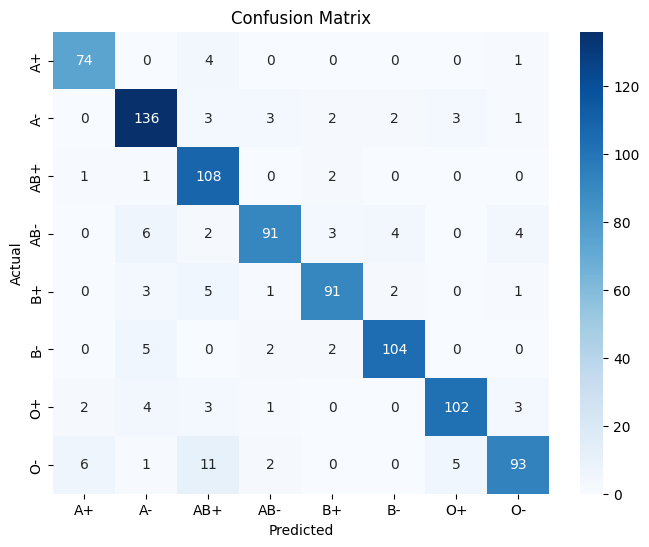

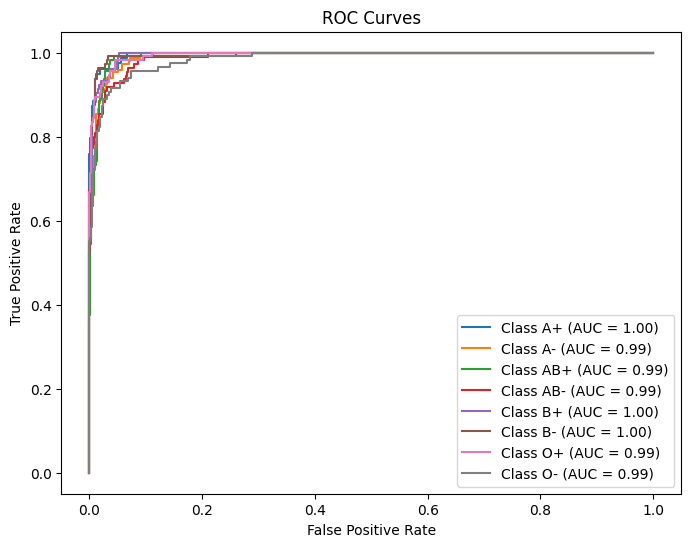


Specificity Scores for Each Class:
A+: 0.9890
A-: 0.9733
AB+: 0.9645
AB-: 0.9886
B+: 0.9887
B-: 0.9898
O+: 0.9898
O-: 0.9872


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ✅ Load Test Data
model.eval()
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(probs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# ✅ Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

# ✅ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ ROC Curves for Each Class
plt.figure(figsize=(8,6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(np.array(all_labels) == i, np.array(all_probs)[:, i])
    plt.plot(fpr, tpr, label=f'Class {full_dataset.classes[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# ✅ Specificity Calculation
cm = confusion_matrix(all_labels, all_preds)
specificity_scores = []
for i in range(num_classes):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

print("\nSpecificity Scores for Each Class:")
for i, spec in enumerate(specificity_scores):
    print(f"{full_dataset.classes[i]}: {spec:.4f}")


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load Pretrained ResNet152
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_classes = 8  # A+, A-, AB+, AB-, B+, B-, O+, O-
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# ✅ Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Track Loss & Accuracy
num_epochs = 30
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct_train, total_train = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train

    # ✅ Validation
    model.eval()
    correct_val, total_val, val_loss = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct_val / total_val

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save Model
torch.save(model.state_dict(), "/kaggle/working/resnet152_fingerprint_bloodgroup.pth")
print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30] | Train Loss: 0.6790, Train Acc: 75.40% | Val Loss: 0.4684, Val Acc: 81.67%
Epoch [2/30] | Train Loss: 0.3882, Train Acc: 85.31% | Val Loss: 0.3695, Val Acc: 84.22%
Epoch [3/30] | Train Loss: 0.2965, Train Acc: 88.76% | Val Loss: 0.3343, Val Acc: 86.78%
Epoch [4/30] | Train Loss: 0.2199, Train Acc: 91.86% | Val Loss: 0.3164, Val Acc: 88.67%
Epoch [5/30] | Train Loss: 0.1363, Train Acc: 95.55% | Val Loss: 0.3053, Val Acc: 87.67%
Epoch [6/30] | Train Loss: 0.1449, Train Acc: 94.95% | Val Loss: 0.4312, Val Acc: 84.44%
Epoch [7/30] | Train Loss: 0.0871, Train Acc: 97.36% | Val Loss: 0.3822, Val Acc: 86.11%
Epoch [8/30] | Train Loss: 0.0841, Train Acc: 97.33% | Val Loss: 0.3997, Val Acc: 86.67%
Epoch [9/30] | Train Loss: 0.0518, Train Acc: 98.57% | Val Loss: 0.4579, Val Acc: 85.67%
Epoch [10/30] | Train Loss: 0.0247, Train Acc: 99.48% | Val Loss: 0.4237, Val Acc: 86.67%
Epoch [11/30] | Train Loss: 0.0292, Train Acc: 99.19% | Val Loss: 0.4729, Val Acc: 84.67%
Epoch [12/30] | Tra

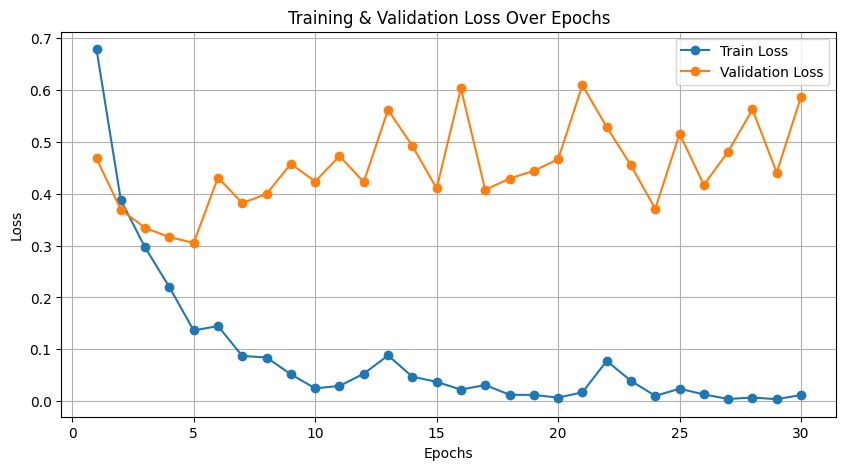

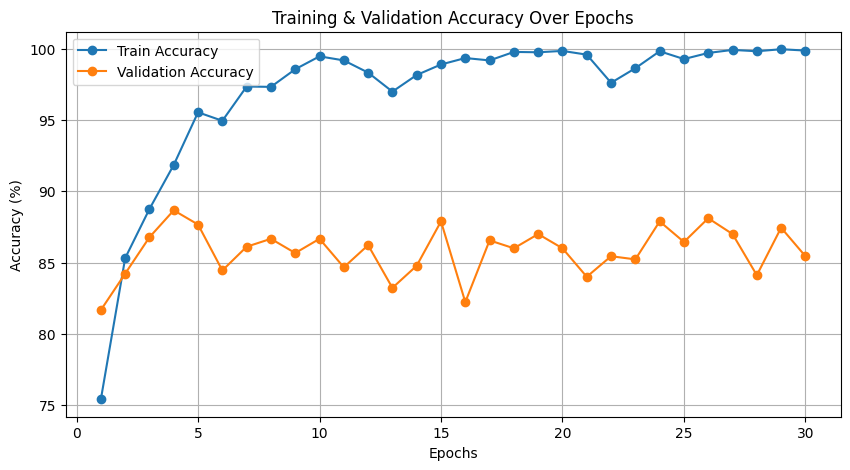

In [11]:
# ✅ Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# ✅ Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_accs, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), val_accs, label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()



Classification Report:
              precision    recall  f1-score   support

          A+       0.93      0.85      0.89        79
          A-       0.83      0.90      0.87       150
         AB+       0.90      0.85      0.88       112
         AB-       0.96      0.69      0.80       110
          B+       0.85      0.91      0.88       103
          B-       0.80      0.96      0.87       113
          O+       0.85      0.91      0.88       115
          O-       0.88      0.83      0.86       118

    accuracy                           0.87       900
   macro avg       0.88      0.86      0.87       900
weighted avg       0.87      0.87      0.86       900



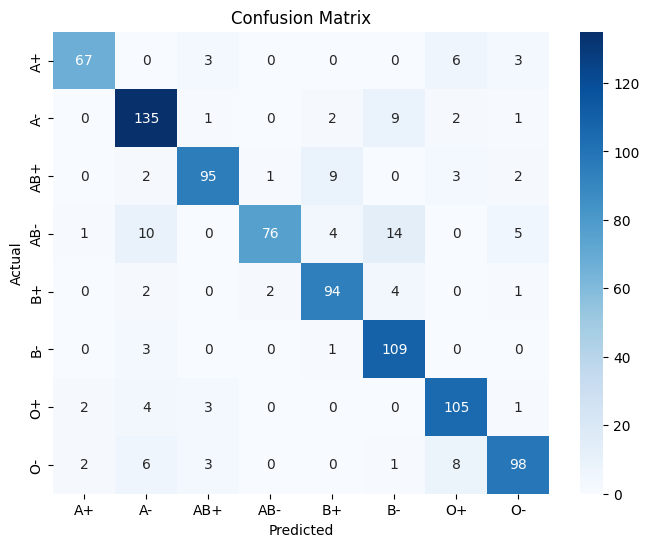

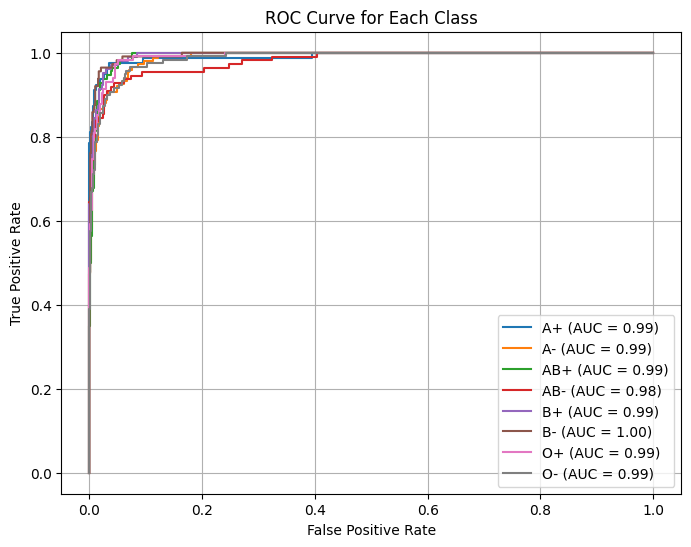


Specificity Scores for Each Class:
A+: 0.9939
A-: 0.9640
AB+: 0.9873
AB-: 0.9962
B+: 0.9799
B-: 0.9644
O+: 0.9758
O-: 0.9834


In [12]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# ✅ Load Test Data
model.eval()
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(probs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# ✅ Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

# ✅ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Improved ROC Curves
plt.figure(figsize=(8,6))
for i in range(num_classes):
    binary_labels = np.array(all_labels) == i  # Convert labels to binary for each class
    fpr, tpr, _ = roc_curve(binary_labels.astype(int), np.array(all_probs)[:, i])
    plt.plot(fpr, tpr, label=f'{full_dataset.classes[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.grid()
plt.show()

# ✅ Specificity Calculation
specificity_scores = []
for i in range(num_classes):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp)
    specificity_scores.append(specificity)

print("\nSpecificity Scores for Each Class:")
for i, spec in enumerate(specificity_scores):
    print(f"{full_dataset.classes[i]}: {spec:.4f}")


In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the same model architecture used during training
class BloodGroupResNet152(nn.Module):
    def __init__(self, num_classes=8):  # Adjust based on classes
        super(BloodGroupResNet152, self).__init__()
        self.model = models.resnet152(pretrained=False)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)  # Custom classifier
    
    def forward(self, x):
        return self.model(x)

# Initialize and load the model
model = BloodGroupResNet152(num_classes=8)
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()  # Set model to evaluation mode


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-13-37e09f9bf260>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

RuntimeError: Error(s) in loading state_dict for BloodGroupResNet152:
	Missing key(s) in state_dict: "model.conv1.weight", "model.bn1.weight", "model.bn1.bias", "model.bn1.running_mean", "model.bn1.running_var", "model.layer1.0.conv1.weight", "model.layer1.0.bn1.weight", "model.layer1.0.bn1.bias", "model.layer1.0.bn1.running_mean", "model.layer1.0.bn1.running_var", "model.layer1.0.conv2.weight", "model.layer1.0.bn2.weight", "model.layer1.0.bn2.bias", "model.layer1.0.bn2.running_mean", "model.layer1.0.bn2.running_var", "model.layer1.0.conv3.weight", "model.layer1.0.bn3.weight", "model.layer1.0.bn3.bias", "model.layer1.0.bn3.running_mean", "model.layer1.0.bn3.running_var", "model.layer1.0.downsample.0.weight", "model.layer1.0.downsample.1.weight", "model.layer1.0.downsample.1.bias", "model.layer1.0.downsample.1.running_mean", "model.layer1.0.downsample.1.running_var", "model.layer1.1.conv1.weight", "model.layer1.1.bn1.weight", "model.layer1.1.bn1.bias", "model.layer1.1.bn1.running_mean", "model.layer1.1.bn1.running_var", "model.layer1.1.conv2.weight", "model.layer1.1.bn2.weight", "model.layer1.1.bn2.bias", "model.layer1.1.bn2.running_mean", "model.layer1.1.bn2.running_var", "model.layer1.1.conv3.weight", "model.layer1.1.bn3.weight", "model.layer1.1.bn3.bias", "model.layer1.1.bn3.running_mean", "model.layer1.1.bn3.running_var", "model.layer1.2.conv1.weight", "model.layer1.2.bn1.weight", "model.layer1.2.bn1.bias", "model.layer1.2.bn1.running_mean", "model.layer1.2.bn1.running_var", "model.layer1.2.conv2.weight", "model.layer1.2.bn2.weight", "model.layer1.2.bn2.bias", "model.layer1.2.bn2.running_mean", "model.layer1.2.bn2.running_var", "model.layer1.2.conv3.weight", "model.layer1.2.bn3.weight", "model.layer1.2.bn3.bias", "model.layer1.2.bn3.running_mean", "model.layer1.2.bn3.running_var", "model.layer2.0.conv1.weight", "model.layer2.0.bn1.weight", "model.layer2.0.bn1.bias", "model.layer2.0.bn1.running_mean", "model.layer2.0.bn1.running_var", "model.layer2.0.conv2.weight", "model.layer2.0.bn2.weight", "model.layer2.0.bn2.bias", "model.layer2.0.bn2.running_mean", "model.layer2.0.bn2.running_var", "model.layer2.0.conv3.weight", "model.layer2.0.bn3.weight", "model.layer2.0.bn3.bias", "model.layer2.0.bn3.running_mean", "model.layer2.0.bn3.running_var", "model.layer2.0.downsample.0.weight", "model.layer2.0.downsample.1.weight", "model.layer2.0.downsample.1.bias", "model.layer2.0.downsample.1.running_mean", "model.layer2.0.downsample.1.running_var", "model.layer2.1.conv1.weight", "model.layer2.1.bn1.weight", "model.layer2.1.bn1.bias", "model.layer2.1.bn1.running_mean", "model.layer2.1.bn1.running_var", "model.layer2.1.conv2.weight", "model.layer2.1.bn2.weight", "model.layer2.1.bn2.bias", "model.layer2.1.bn2.running_mean", "model.layer2.1.bn2.running_var", "model.layer2.1.conv3.weight", "model.layer2.1.bn3.weight", "model.layer2.1.bn3.bias", "model.layer2.1.bn3.running_mean", "model.layer2.1.bn3.running_var", "model.layer2.2.conv1.weight", "model.layer2.2.bn1.weight", "model.layer2.2.bn1.bias", "model.layer2.2.bn1.running_mean", "model.layer2.2.bn1.running_var", "model.layer2.2.conv2.weight", "model.layer2.2.bn2.weight", "model.layer2.2.bn2.bias", "model.layer2.2.bn2.running_mean", "model.layer2.2.bn2.running_var", "model.layer2.2.conv3.weight", "model.layer2.2.bn3.weight", "model.layer2.2.bn3.bias", "model.layer2.2.bn3.running_mean", "model.layer2.2.bn3.running_var", "model.layer2.3.conv1.weight", "model.layer2.3.bn1.weight", "model.layer2.3.bn1.bias", "model.layer2.3.bn1.running_mean", "model.layer2.3.bn1.running_var", "model.layer2.3.conv2.weight", "model.layer2.3.bn2.weight", "model.layer2.3.bn2.bias", "model.layer2.3.bn2.running_mean", "model.layer2.3.bn2.running_var", "model.layer2.3.conv3.weight", "model.layer2.3.bn3.weight", "model.layer2.3.bn3.bias", "model.layer2.3.bn3.running_mean", "model.layer2.3.bn3.running_var", "model.layer2.4.conv1.weight", "model.layer2.4.bn1.weight", "model.layer2.4.bn1.bias", "model.layer2.4.bn1.running_mean", "model.layer2.4.bn1.running_var", "model.layer2.4.conv2.weight", "model.layer2.4.bn2.weight", "model.layer2.4.bn2.bias", "model.layer2.4.bn2.running_mean", "model.layer2.4.bn2.running_var", "model.layer2.4.conv3.weight", "model.layer2.4.bn3.weight", "model.layer2.4.bn3.bias", "model.layer2.4.bn3.running_mean", "model.layer2.4.bn3.running_var", "model.layer2.5.conv1.weight", "model.layer2.5.bn1.weight", "model.layer2.5.bn1.bias", "model.layer2.5.bn1.running_mean", "model.layer2.5.bn1.running_var", "model.layer2.5.conv2.weight", "model.layer2.5.bn2.weight", "model.layer2.5.bn2.bias", "model.layer2.5.bn2.running_mean", "model.layer2.5.bn2.running_var", "model.layer2.5.conv3.weight", "model.layer2.5.bn3.weight", "model.layer2.5.bn3.bias", "model.layer2.5.bn3.running_mean", "model.layer2.5.bn3.running_var", "model.layer2.6.conv1.weight", "model.layer2.6.bn1.weight", "model.layer2.6.bn1.bias", "model.layer2.6.bn1.running_mean", "model.layer2.6.bn1.running_var", "model.layer2.6.conv2.weight", "model.layer2.6.bn2.weight", "model.layer2.6.bn2.bias", "model.layer2.6.bn2.running_mean", "model.layer2.6.bn2.running_var", "model.layer2.6.conv3.weight", "model.layer2.6.bn3.weight", "model.layer2.6.bn3.bias", "model.layer2.6.bn3.running_mean", "model.layer2.6.bn3.running_var", "model.layer2.7.conv1.weight", "model.layer2.7.bn1.weight", "model.layer2.7.bn1.bias", "model.layer2.7.bn1.running_mean", "model.layer2.7.bn1.running_var", "model.layer2.7.conv2.weight", "model.layer2.7.bn2.weight", "model.layer2.7.bn2.bias", "model.layer2.7.bn2.running_mean", "model.layer2.7.bn2.running_var", "model.layer2.7.conv3.weight", "model.layer2.7.bn3.weight", "model.layer2.7.bn3.bias", "model.layer2.7.bn3.running_mean", "model.layer2.7.bn3.running_var", "model.layer3.0.conv1.weight", "model.layer3.0.bn1.weight", "model.layer3.0.bn1.bias", "model.layer3.0.bn1.running_mean", "model.layer3.0.bn1.running_var", "model.layer3.0.conv2.weight", "model.layer3.0.bn2.weight", "model.layer3.0.bn2.bias", "model.layer3.0.bn2.running_mean", "model.layer3.0.bn2.running_var", "model.layer3.0.conv3.weight", "model.layer3.0.bn3.weight", "model.layer3.0.bn3.bias", "model.layer3.0.bn3.running_mean", "model.layer3.0.bn3.running_var", "model.layer3.0.downsample.0.weight", "model.layer3.0.downsample.1.weight", "model.layer3.0.downsample.1.bias", "model.layer3.0.downsample.1.running_mean", "model.layer3.0.downsample.1.running_var", "model.layer3.1.conv1.weight", "model.layer3.1.bn1.weight", "model.layer3.1.bn1.bias", "model.layer3.1.bn1.running_mean", "model.layer3.1.bn1.running_var", "model.layer3.1.conv2.weight", "model.layer3.1.bn2.weight", "model.layer3.1.bn2.bias", "model.layer3.1.bn2.running_mean", "model.layer3.1.bn2.running_var", "model.layer3.1.conv3.weight", "model.layer3.1.bn3.weight", "model.layer3.1.bn3.bias", "model.layer3.1.bn3.running_mean", "model.layer3.1.bn3.running_var", "model.layer3.2.conv1.weight", "model.layer3.2.bn1.weight", "model.layer3.2.bn1.bias", "model.layer3.2.bn1.running_mean", "model.layer3.2.bn1.running_var", "model.layer3.2.conv2.weight", "model.layer3.2.bn2.weight", "model.layer3.2.bn2.bias", "model.layer3.2.bn2.running_mean", "model.layer3.2.bn2.running_var", "model.layer3.2.conv3.weight", "model.layer3.2.bn3.weight", "model.layer3.2.bn3.bias", "model.layer3.2.bn3.running_mean", "model.layer3.2.bn3.running_var", "model.layer3.3.conv1.weight", "model.layer3.3.bn1.weight", "model.layer3.3.bn1.bias", "model.layer3.3.bn1.running_mean", "model.layer3.3.bn1.running_var", "model.layer3.3.conv2.weight", "model.layer3.3.bn2.weight", "model.layer3.3.bn2.bias", "model.layer3.3.bn2.running_mean", "model.layer3.3.bn2.running_var", "model.layer3.3.conv3.weight", "model.layer3.3.bn3.weight", "model.layer3.3.bn3.bias", "model.layer3.3.bn3.running_mean", "model.layer3.3.bn3.running_var", "model.layer3.4.conv1.weight", "model.layer3.4.bn1.weight", "model.layer3.4.bn1.bias", "model.layer3.4.bn1.running_mean", "model.layer3.4.bn1.running_var", "model.layer3.4.conv2.weight", "model.layer3.4.bn2.weight", "model.layer3.4.bn2.bias", "model.layer3.4.bn2.running_mean", "model.layer3.4.bn2.running_var", "model.layer3.4.conv3.weight", "model.layer3.4.bn3.weight", "model.layer3.4.bn3.bias", "model.layer3.4.bn3.running_mean", "model.layer3.4.bn3.running_var", "model.layer3.5.conv1.weight", "model.layer3.5.bn1.weight", "model.layer3.5.bn1.bias", "model.layer3.5.bn1.running_mean", "model.layer3.5.bn1.running_var", "model.layer3.5.conv2.weight", "model.layer3.5.bn2.weight", "model.layer3.5.bn2.bias", "model.layer3.5.bn2.running_mean", "model.layer3.5.bn2.running_var", "model.layer3.5.conv3.weight", "model.layer3.5.bn3.weight", "model.layer3.5.bn3.bias", "model.layer3.5.bn3.running_mean", "model.layer3.5.bn3.running_var", "model.layer3.6.conv1.weight", "model.layer3.6.bn1.weight", "model.layer3.6.bn1.bias", "model.layer3.6.bn1.running_mean", "model.layer3.6.bn1.running_var", "model.layer3.6.conv2.weight", "model.layer3.6.bn2.weight", "model.layer3.6.bn2.bias", "model.layer3.6.bn2.running_mean", "model.layer3.6.bn2.running_var", "model.layer3.6.conv3.weight", "model.layer3.6.bn3.weight", "model.layer3.6.bn3.bias", "model.layer3.6.bn3.running_mean", "model.layer3.6.bn3.running_var", "model.layer3.7.conv1.weight", "model.layer3.7.bn1.weight", "model.layer3.7.bn1.bias", "model.layer3.7.bn1.running_mean", "model.layer3.7.bn1.running_var", "model.layer3.7.conv2.weight", "model.layer3.7.bn2.weight", "model.layer3.7.bn2.bias", "model.layer3.7.bn2.running_mean", "model.layer3.7.bn2.running_var", "model.layer3.7.conv3.weight", "model.layer3.7.bn3.weight", "model.layer3.7.bn3.bias", "model.layer3.7.bn3.running_mean", "model.layer3.7.bn3.running_var", "model.layer3.8.conv1.weight", "model.layer3.8.bn1.weight", "model.layer3.8.bn1.bias", "model.layer3.8.bn1.running_mean", "model.layer3.8.bn1.running_var", "model.layer3.8.conv2.weight", "model.layer3.8.bn2.weight", "model.layer3.8.bn2.bias", "model.layer3.8.bn2.running_mean", "model.layer3.8.bn2.running_var", "model.layer3.8.conv3.weight", "model.layer3.8.bn3.weight", "model.layer3.8.bn3.bias", "model.layer3.8.bn3.running_mean", "model.layer3.8.bn3.running_var", "model.layer3.9.conv1.weight", "model.layer3.9.bn1.weight", "model.layer3.9.bn1.bias", "model.layer3.9.bn1.running_mean", "model.layer3.9.bn1.running_var", "model.layer3.9.conv2.weight", "model.layer3.9.bn2.weight", "model.layer3.9.bn2.bias", "model.layer3.9.bn2.running_mean", "model.layer3.9.bn2.running_var", "model.layer3.9.conv3.weight", "model.layer3.9.bn3.weight", "model.layer3.9.bn3.bias", "model.layer3.9.bn3.running_mean", "model.layer3.9.bn3.running_var", "model.layer3.10.conv1.weight", "model.layer3.10.bn1.weight", "model.layer3.10.bn1.bias", "model.layer3.10.bn1.running_mean", "model.layer3.10.bn1.running_var", "model.layer3.10.conv2.weight", "model.layer3.10.bn2.weight", "model.layer3.10.bn2.bias", "model.layer3.10.bn2.running_mean", "model.layer3.10.bn2.running_var", "model.layer3.10.conv3.weight", "model.layer3.10.bn3.weight", "model.layer3.10.bn3.bias", "model.layer3.10.bn3.running_mean", "model.layer3.10.bn3.running_var", "model.layer3.11.conv1.weight", "model.layer3.11.bn1.weight", "model.layer3.11.bn1.bias", "model.layer3.11.bn1.running_mean", "model.layer3.11.bn1.running_var", "model.layer3.11.conv2.weight", "model.layer3.11.bn2.weight", "model.layer3.11.bn2.bias", "model.layer3.11.bn2.running_mean", "model.layer3.11.bn2.running_var", "model.layer3.11.conv3.weight", "model.layer3.11.bn3.weight", "model.layer3.11.bn3.bias", "model.layer3.11.bn3.running_mean", "model.layer3.11.bn3.running_var", "model.layer3.12.conv1.weight", "model.layer3.12.bn1.weight", "model.layer3.12.bn1.bias", "model.layer3.12.bn1.running_mean", "model.layer3.12.bn1.running_var", "model.layer3.12.conv2.weight", "model.layer3.12.bn2.weight", "model.layer3.12.bn2.bias", "model.layer3.12.bn2.running_mean", "model.layer3.12.bn2.running_var", "model.layer3.12.conv3.weight", "model.layer3.12.bn3.weight", "model.layer3.12.bn3.bias", "model.layer3.12.bn3.running_mean", "model.layer3.12.bn3.running_var", "model.layer3.13.conv1.weight", "model.layer3.13.bn1.weight", "model.layer3.13.bn1.bias", "model.layer3.13.bn1.running_mean", "model.layer3.13.bn1.running_var", "model.layer3.13.conv2.weight", "model.layer3.13.bn2.weight", "model.layer3.13.bn2.bias", "model.layer3.13.bn2.running_mean", "model.layer3.13.bn2.running_var", "model.layer3.13.conv3.weight", "model.layer3.13.bn3.weight", "model.layer3.13.bn3.bias", "model.layer3.13.bn3.running_mean", "model.layer3.13.bn3.running_var", "model.layer3.14.conv1.weight", "model.layer3.14.bn1.weight", "model.layer3.14.bn1.bias", "model.layer3.14.bn1.running_mean", "model.layer3.14.bn1.running_var", "model.layer3.14.conv2.weight", "model.layer3.14.bn2.weight", "model.layer3.14.bn2.bias", "model.layer3.14.bn2.running_mean", "model.layer3.14.bn2.running_var", "model.layer3.14.conv3.weight", "model.layer3.14.bn3.weight", "model.layer3.14.bn3.bias", "model.layer3.14.bn3.running_mean", "model.layer3.14.bn3.running_var", "model.layer3.15.conv1.weight", "model.layer3.15.bn1.weight", "model.layer3.15.bn1.bias", "model.layer3.15.bn1.running_mean", "model.layer3.15.bn1.running_var", "model.layer3.15.conv2.weight", "model.layer3.15.bn2.weight", "model.layer3.15.bn2.bias", "model.layer3.15.bn2.running_mean", "model.layer3.15.bn2.running_var", "model.layer3.15.conv3.weight", "model.layer3.15.bn3.weight", "model.layer3.15.bn3.bias", "model.layer3.15.bn3.running_mean", "model.layer3.15.bn3.running_var", "model.layer3.16.conv1.weight", "model.layer3.16.bn1.weight", "model.layer3.16.bn1.bias", "model.layer3.16.bn1.running_mean", "model.layer3.16.bn1.running_var", "model.layer3.16.conv2.weight", "model.layer3.16.bn2.weight", "model.layer3.16.bn2.bias", "model.layer3.16.bn2.running_mean", "model.layer3.16.bn2.running_var", "model.layer3.16.conv3.weight", "model.layer3.16.bn3.weight", "model.layer3.16.bn3.bias", "model.layer3.16.bn3.running_mean", "model.layer3.16.bn3.running_var", "model.layer3.17.conv1.weight", "model.layer3.17.bn1.weight", "model.layer3.17.bn1.bias", "model.layer3.17.bn1.running_mean", "model.layer3.17.bn1.running_var", "model.layer3.17.conv2.weight", "model.layer3.17.bn2.weight", "model.layer3.17.bn2.bias", "model.layer3.17.bn2.running_mean", "model.layer3.17.bn2.running_var", "model.layer3.17.conv3.weight", "model.layer3.17.bn3.weight", "model.layer3.17.bn3.bias", "model.layer3.17.bn3.running_mean", "model.layer3.17.bn3.running_var", "model.layer3.18.conv1.weight", "model.layer3.18.bn1.weight", "model.layer3.18.bn1.bias", "model.layer3.18.bn1.running_mean", "model.layer3.18.bn1.running_var", "model.layer3.18.conv2.weight", "model.layer3.18.bn2.weight", "model.layer3.18.bn2.bias", "model.layer3.18.bn2.running_mean", "model.layer3.18.bn2.running_var", "model.layer3.18.conv3.weight", "model.layer3.18.bn3.weight", "model.layer3.18.bn3.bias", "model.layer3.18.bn3.running_mean", "model.layer3.18.bn3.running_var", "model.layer3.19.conv1.weight", "model.layer3.19.bn1.weight", "model.layer3.19.bn1.bias", "model.layer3.19.bn1.running_mean", "model.layer3.19.bn1.running_var", "model.layer3.19.conv2.weight", "model.layer3.19.bn2.weight", "model.layer3.19.bn2.bias", "model.layer3.19.bn2.running_mean", "model.layer3.19.bn2.running_var", "model.layer3.19.conv3.weight", "model.layer3.19.bn3.weight", "model.layer3.19.bn3.bias", "model.layer3.19.bn3.running_mean", "model.layer3.19.bn3.running_var", "model.layer3.20.conv1.weight", "model.layer3.20.bn1.weight", "model.layer3.20.bn1.bias", "model.layer3.20.bn1.running_mean", "model.layer3.20.bn1.running_var", "model.layer3.20.conv2.weight", "model.layer3.20.bn2.weight", "model.layer3.20.bn2.bias", "model.layer3.20.bn2.running_mean", "model.layer3.20.bn2.running_var", "model.layer3.20.conv3.weight", "model.layer3.20.bn3.weight", "model.layer3.20.bn3.bias", "model.layer3.20.bn3.running_mean", "model.layer3.20.bn3.running_var", "model.layer3.21.conv1.weight", "model.layer3.21.bn1.weight", "model.layer3.21.bn1.bias", "model.layer3.21.bn1.running_mean", "model.layer3.21.bn1.running_var", "model.layer3.21.conv2.weight", "model.layer3.21.bn2.weight", "model.layer3.21.bn2.bias", "model.layer3.21.bn2.running_mean", "model.layer3.21.bn2.running_var", "model.layer3.21.conv3.weight", "model.layer3.21.bn3.weight", "model.layer3.21.bn3.bias", "model.layer3.21.bn3.running_mean", "model.layer3.21.bn3.running_var", "model.layer3.22.conv1.weight", "model.layer3.22.bn1.weight", "model.layer3.22.bn1.bias", "model.layer3.22.bn1.running_mean", "model.layer3.22.bn1.running_var", "model.layer3.22.conv2.weight", "model.layer3.22.bn2.weight", "model.layer3.22.bn2.bias", "model.layer3.22.bn2.running_mean", "model.layer3.22.bn2.running_var", "model.layer3.22.conv3.weight", "model.layer3.22.bn3.weight", "model.layer3.22.bn3.bias", "model.layer3.22.bn3.running_mean", "model.layer3.22.bn3.running_var", "model.layer3.23.conv1.weight", "model.layer3.23.bn1.weight", "model.layer3.23.bn1.bias", "model.layer3.23.bn1.running_mean", "model.layer3.23.bn1.running_var", "model.layer3.23.conv2.weight", "model.layer3.23.bn2.weight", "model.layer3.23.bn2.bias", "model.layer3.23.bn2.running_mean", "model.layer3.23.bn2.running_var", "model.layer3.23.conv3.weight", "model.layer3.23.bn3.weight", "model.layer3.23.bn3.bias", "model.layer3.23.bn3.running_mean", "model.layer3.23.bn3.running_var", "model.layer3.24.conv1.weight", "model.layer3.24.bn1.weight", "model.layer3.24.bn1.bias", "model.layer3.24.bn1.running_mean", "model.layer3.24.bn1.running_var", "model.layer3.24.conv2.weight", "model.layer3.24.bn2.weight", "model.layer3.24.bn2.bias", "model.layer3.24.bn2.running_mean", "model.layer3.24.bn2.running_var", "model.layer3.24.conv3.weight", "model.layer3.24.bn3.weight", "model.layer3.24.bn3.bias", "model.layer3.24.bn3.running_mean", "model.layer3.24.bn3.running_var", "model.layer3.25.conv1.weight", "model.layer3.25.bn1.weight", "model.layer3.25.bn1.bias", "model.layer3.25.bn1.running_mean", "model.layer3.25.bn1.running_var", "model.layer3.25.conv2.weight", "model.layer3.25.bn2.weight", "model.layer3.25.bn2.bias", "model.layer3.25.bn2.running_mean", "model.layer3.25.bn2.running_var", "model.layer3.25.conv3.weight", "model.layer3.25.bn3.weight", "model.layer3.25.bn3.bias", "model.layer3.25.bn3.running_mean", "model.layer3.25.bn3.running_var", "model.layer3.26.conv1.weight", "model.layer3.26.bn1.weight", "model.layer3.26.bn1.bias", "model.layer3.26.bn1.running_mean", "model.layer3.26.bn1.running_var", "model.layer3.26.conv2.weight", "model.layer3.26.bn2.weight", "model.layer3.26.bn2.bias", "model.layer3.26.bn2.running_mean", "model.layer3.26.bn2.running_var", "model.layer3.26.conv3.weight", "model.layer3.26.bn3.weight", "model.layer3.26.bn3.bias", "model.layer3.26.bn3.running_mean", "model.layer3.26.bn3.running_var", "model.layer3.27.conv1.weight", "model.layer3.27.bn1.weight", "model.layer3.27.bn1.bias", "model.layer3.27.bn1.running_mean", "model.layer3.27.bn1.running_var", "model.layer3.27.conv2.weight", "model.layer3.27.bn2.weight", "model.layer3.27.bn2.bias", "model.layer3.27.bn2.running_mean", "model.layer3.27.bn2.running_var", "model.layer3.27.conv3.weight", "model.layer3.27.bn3.weight", "model.layer3.27.bn3.bias", "model.layer3.27.bn3.running_mean", "model.layer3.27.bn3.running_var", "model.layer3.28.conv1.weight", "model.layer3.28.bn1.weight", "model.layer3.28.bn1.bias", "model.layer3.28.bn1.running_mean", "model.layer3.28.bn1.running_var", "model.layer3.28.conv2.weight", "model.layer3.28.bn2.weight", "model.layer3.28.bn2.bias", "model.layer3.28.bn2.running_mean", "model.layer3.28.bn2.running_var", "model.layer3.28.conv3.weight", "model.layer3.28.bn3.weight", "model.layer3.28.bn3.bias", "model.layer3.28.bn3.running_mean", "model.layer3.28.bn3.running_var", "model.layer3.29.conv1.weight", "model.layer3.29.bn1.weight", "model.layer3.29.bn1.bias", "model.layer3.29.bn1.running_mean", "model.layer3.29.bn1.running_var", "model.layer3.29.conv2.weight", "model.layer3.29.bn2.weight", "model.layer3.29.bn2.bias", "model.layer3.29.bn2.running_mean", "model.layer3.29.bn2.running_var", "model.layer3.29.conv3.weight", "model.layer3.29.bn3.weight", "model.layer3.29.bn3.bias", "model.layer3.29.bn3.running_mean", "model.layer3.29.bn3.running_var", "model.layer3.30.conv1.weight", "model.layer3.30.bn1.weight", "model.layer3.30.bn1.bias", "model.layer3.30.bn1.running_mean", "model.layer3.30.bn1.running_var", "model.layer3.30.conv2.weight", "model.layer3.30.bn2.weight", "model.layer3.30.bn2.bias", "model.layer3.30.bn2.running_mean", "model.layer3.30.bn2.running_var", "model.layer3.30.conv3.weight", "model.layer3.30.bn3.weight", "model.layer3.30.bn3.bias", "model.layer3.30.bn3.running_mean", "model.layer3.30.bn3.running_var", "model.layer3.31.conv1.weight", "model.layer3.31.bn1.weight", "model.layer3.31.bn1.bias", "model.layer3.31.bn1.running_mean", "model.layer3.31.bn1.running_var", "model.layer3.31.conv2.weight", "model.layer3.31.bn2.weight", "model.layer3.31.bn2.bias", "model.layer3.31.bn2.running_mean", "model.layer3.31.bn2.running_var", "model.layer3.31.conv3.weight", "model.layer3.31.bn3.weight", "model.layer3.31.bn3.bias", "model.layer3.31.bn3.running_mean", "model.layer3.31.bn3.running_var", "model.layer3.32.conv1.weight", "model.layer3.32.bn1.weight", "model.layer3.32.bn1.bias", "model.layer3.32.bn1.running_mean", "model.layer3.32.bn1.running_var", "model.layer3.32.conv2.weight", "model.layer3.32.bn2.weight", "model.layer3.32.bn2.bias", "model.layer3.32.bn2.running_mean", "model.layer3.32.bn2.running_var", "model.layer3.32.conv3.weight", "model.layer3.32.bn3.weight", "model.layer3.32.bn3.bias", "model.layer3.32.bn3.running_mean", "model.layer3.32.bn3.running_var", "model.layer3.33.conv1.weight", "model.layer3.33.bn1.weight", "model.layer3.33.bn1.bias", "model.layer3.33.bn1.running_mean", "model.layer3.33.bn1.running_var", "model.layer3.33.conv2.weight", "model.layer3.33.bn2.weight", "model.layer3.33.bn2.bias", "model.layer3.33.bn2.running_mean", "model.layer3.33.bn2.running_var", "model.layer3.33.conv3.weight", "model.layer3.33.bn3.weight", "model.layer3.33.bn3.bias", "model.layer3.33.bn3.running_mean", "model.layer3.33.bn3.running_var", "model.layer3.34.conv1.weight", "model.layer3.34.bn1.weight", "model.layer3.34.bn1.bias", "model.layer3.34.bn1.running_mean", "model.layer3.34.bn1.running_var", "model.layer3.34.conv2.weight", "model.layer3.34.bn2.weight", "model.layer3.34.bn2.bias", "model.layer3.34.bn2.running_mean", "model.layer3.34.bn2.running_var", "model.layer3.34.conv3.weight", "model.layer3.34.bn3.weight", "model.layer3.34.bn3.bias", "model.layer3.34.bn3.running_mean", "model.layer3.34.bn3.running_var", "model.layer3.35.conv1.weight", "model.layer3.35.bn1.weight", "model.layer3.35.bn1.bias", "model.layer3.35.bn1.running_mean", "model.layer3.35.bn1.running_var", "model.layer3.35.conv2.weight", "model.layer3.35.bn2.weight", "model.layer3.35.bn2.bias", "model.layer3.35.bn2.running_mean", "model.layer3.35.bn2.running_var", "model.layer3.35.conv3.weight", "model.layer3.35.bn3.weight", "model.layer3.35.bn3.bias", "model.layer3.35.bn3.running_mean", "model.layer3.35.bn3.running_var", "model.layer4.0.conv1.weight", "model.layer4.0.bn1.weight", "model.layer4.0.bn1.bias", "model.layer4.0.bn1.running_mean", "model.layer4.0.bn1.running_var", "model.layer4.0.conv2.weight", "model.layer4.0.bn2.weight", "model.layer4.0.bn2.bias", "model.layer4.0.bn2.running_mean", "model.layer4.0.bn2.running_var", "model.layer4.0.conv3.weight", "model.layer4.0.bn3.weight", "model.layer4.0.bn3.bias", "model.layer4.0.bn3.running_mean", "model.layer4.0.bn3.running_var", "model.layer4.0.downsample.0.weight", "model.layer4.0.downsample.1.weight", "model.layer4.0.downsample.1.bias", "model.layer4.0.downsample.1.running_mean", "model.layer4.0.downsample.1.running_var", "model.layer4.1.conv1.weight", "model.layer4.1.bn1.weight", "model.layer4.1.bn1.bias", "model.layer4.1.bn1.running_mean", "model.layer4.1.bn1.running_var", "model.layer4.1.conv2.weight", "model.layer4.1.bn2.weight", "model.layer4.1.bn2.bias", "model.layer4.1.bn2.running_mean", "model.layer4.1.bn2.running_var", "model.layer4.1.conv3.weight", "model.layer4.1.bn3.weight", "model.layer4.1.bn3.bias", "model.layer4.1.bn3.running_mean", "model.layer4.1.bn3.running_var", "model.layer4.2.conv1.weight", "model.layer4.2.bn1.weight", "model.layer4.2.bn1.bias", "model.layer4.2.bn1.running_mean", "model.layer4.2.bn1.running_var", "model.layer4.2.conv2.weight", "model.layer4.2.bn2.weight", "model.layer4.2.bn2.bias", "model.layer4.2.bn2.running_mean", "model.layer4.2.bn2.running_var", "model.layer4.2.conv3.weight", "model.layer4.2.bn3.weight", "model.layer4.2.bn3.bias", "model.layer4.2.bn3.running_mean", "model.layer4.2.bn3.running_var", "model.fc.weight", "model.fc.bias". 
	Unexpected key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.bn1.num_batches_tracked", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.bn2.num_batches_tracked", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.bn3.num_batches_tracked", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.num_batches_tracked", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.bn1.num_batches_tracked", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.bn2.num_batches_tracked", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.1.bn3.num_batches_tracked", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.bn1.num_batches_tracked", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.bn2.num_batches_tracked", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer1.2.bn3.num_batches_tracked", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.bn1.num_batches_tracked", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.bn2.num_batches_tracked", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.bn3.num_batches_tracked", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.bn1.num_batches_tracked", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.bn2.num_batches_tracked", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.1.bn3.num_batches_tracked", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.bn1.num_batches_tracked", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.bn2.num_batches_tracked", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.2.bn3.num_batches_tracked", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.bn1.num_batches_tracked", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.bn2.num_batches_tracked", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.3.bn3.num_batches_tracked", "layer2.4.conv1.weight", "layer2.4.bn1.weight", "layer2.4.bn1.bias", "layer2.4.bn1.running_mean", "layer2.4.bn1.running_var", "layer2.4.bn1.num_batches_tracked", "layer2.4.conv2.weight", "layer2.4.bn2.weight", "layer2.4.bn2.bias", "layer2.4.bn2.running_mean", "layer2.4.bn2.running_var", "layer2.4.bn2.num_batches_tracked", "layer2.4.conv3.weight", "layer2.4.bn3.weight", "layer2.4.bn3.bias", "layer2.4.bn3.running_mean", "layer2.4.bn3.running_var", "layer2.4.bn3.num_batches_tracked", "layer2.5.conv1.weight", "layer2.5.bn1.weight", "layer2.5.bn1.bias", "layer2.5.bn1.running_mean", "layer2.5.bn1.running_var", "layer2.5.bn1.num_batches_tracked", "layer2.5.conv2.weight", "layer2.5.bn2.weight", "layer2.5.bn2.bias", "layer2.5.bn2.running_mean", "layer2.5.bn2.running_var", "layer2.5.bn2.num_batches_tracked", "layer2.5.conv3.weight", "layer2.5.bn3.weight", "layer2.5.bn3.bias", "layer2.5.bn3.running_mean", "layer2.5.bn3.running_var", "layer2.5.bn3.num_batches_tracked", "layer2.6.conv1.weight", "layer2.6.bn1.weight", "layer2.6.bn1.bias", "layer2.6.bn1.running_mean", "layer2.6.bn1.running_var", "layer2.6.bn1.num_batches_tracked", "layer2.6.conv2.weight", "layer2.6.bn2.weight", "layer2.6.bn2.bias", "layer2.6.bn2.running_mean", "layer2.6.bn2.running_var", "layer2.6.bn2.num_batches_tracked", "layer2.6.conv3.weight", "layer2.6.bn3.weight", "layer2.6.bn3.bias", "layer2.6.bn3.running_mean", "layer2.6.bn3.running_var", "layer2.6.bn3.num_batches_tracked", "layer2.7.conv1.weight", "layer2.7.bn1.weight", "layer2.7.bn1.bias", "layer2.7.bn1.running_mean", "layer2.7.bn1.running_var", "layer2.7.bn1.num_batches_tracked", "layer2.7.conv2.weight", "layer2.7.bn2.weight", "layer2.7.bn2.bias", "layer2.7.bn2.running_mean", "layer2.7.bn2.running_var", "layer2.7.bn2.num_batches_tracked", "layer2.7.conv3.weight", "layer2.7.bn3.weight", "layer2.7.bn3.bias", "layer2.7.bn3.running_mean", "layer2.7.bn3.running_var", "layer2.7.bn3.num_batches_tracked", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.bn1.num_batches_tracked", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.bn2.num_batches_tracked", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.bn3.num_batches_tracked", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.bn1.num_batches_tracked", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.bn2.num_batches_tracked", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.1.bn3.num_batches_tracked", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.bn1.num_batches_tracked", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.bn2.num_batches_tracked", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.2.bn3.num_batches_tracked", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.bn1.num_batches_tracked", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.bn2.num_batches_tracked", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.3.bn3.num_batches_tracked", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.bn1.num_batches_tracked", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.bn2.num_batches_tracked", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.4.bn3.num_batches_tracked", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.bn1.num_batches_tracked", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.bn2.num_batches_tracked", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.5.bn3.num_batches_tracked", "layer3.6.conv1.weight", "layer3.6.bn1.weight", "layer3.6.bn1.bias", "layer3.6.bn1.running_mean", "layer3.6.bn1.running_var", "layer3.6.bn1.num_batches_tracked", "layer3.6.conv2.weight", "layer3.6.bn2.weight", "layer3.6.bn2.bias", "layer3.6.bn2.running_mean", "layer3.6.bn2.running_var", "layer3.6.bn2.num_batches_tracked", "layer3.6.conv3.weight", "layer3.6.bn3.weight", "layer3.6.bn3.bias", "layer3.6.bn3.running_mean", "layer3.6.bn3.running_var", "layer3.6.bn3.num_batches_tracked", "layer3.7.conv1.weight", "layer3.7.bn1.weight", "layer3.7.bn1.bias", "layer3.7.bn1.running_mean", "layer3.7.bn1.running_var", "layer3.7.bn1.num_batches_tracked", "layer3.7.conv2.weight", "layer3.7.bn2.weight", "layer3.7.bn2.bias", "layer3.7.bn2.running_mean", "layer3.7.bn2.running_var", "layer3.7.bn2.num_batches_tracked", "layer3.7.conv3.weight", "layer3.7.bn3.weight", "layer3.7.bn3.bias", "layer3.7.bn3.running_mean", "layer3.7.bn3.running_var", "layer3.7.bn3.num_batches_tracked", "layer3.8.conv1.weight", "layer3.8.bn1.weight", "layer3.8.bn1.bias", "layer3.8.bn1.running_mean", "layer3.8.bn1.running_var", "layer3.8.bn1.num_batches_tracked", "layer3.8.conv2.weight", "layer3.8.bn2.weight", "layer3.8.bn2.bias", "layer3.8.bn2.running_mean", "layer3.8.bn2.running_var", "layer3.8.bn2.num_batches_tracked", "layer3.8.conv3.weight", "layer3.8.bn3.weight", "layer3.8.bn3.bias", "layer3.8.bn3.running_mean", "layer3.8.bn3.running_var", "layer3.8.bn3.num_batches_tracked", "layer3.9.conv1.weight", "layer3.9.bn1.weight", "layer3.9.bn1.bias", "layer3.9.bn1.running_mean", "layer3.9.bn1.running_var", "layer3.9.bn1.num_batches_tracked", "layer3.9.conv2.weight", "layer3.9.bn2.weight", "layer3.9.bn2.bias", "layer3.9.bn2.running_mean", "layer3.9.bn2.running_var", "layer3.9.bn2.num_batches_tracked", "layer3.9.conv3.weight", "layer3.9.bn3.weight", "layer3.9.bn3.bias", "layer3.9.bn3.running_mean", "layer3.9.bn3.running_var", "layer3.9.bn3.num_batches_tracked", "layer3.10.conv1.weight", "layer3.10.bn1.weight", "layer3.10.bn1.bias", "layer3.10.bn1.running_mean", "layer3.10.bn1.running_var", "layer3.10.bn1.num_batches_tracked", "layer3.10.conv2.weight", "layer3.10.bn2.weight", "layer3.10.bn2.bias", "layer3.10.bn2.running_mean", "layer3.10.bn2.running_var", "layer3.10.bn2.num_batches_tracked", "layer3.10.conv3.weight", "layer3.10.bn3.weight", "layer3.10.bn3.bias", "layer3.10.bn3.running_mean", "layer3.10.bn3.running_var", "layer3.10.bn3.num_batches_tracked", "layer3.11.conv1.weight", "layer3.11.bn1.weight", "layer3.11.bn1.bias", "layer3.11.bn1.running_mean", "layer3.11.bn1.running_var", "layer3.11.bn1.num_batches_tracked", "layer3.11.conv2.weight", "layer3.11.bn2.weight", "layer3.11.bn2.bias", "layer3.11.bn2.running_mean", "layer3.11.bn2.running_var", "layer3.11.bn2.num_batches_tracked", "layer3.11.conv3.weight", "layer3.11.bn3.weight", "layer3.11.bn3.bias", "layer3.11.bn3.running_mean", "layer3.11.bn3.running_var", "layer3.11.bn3.num_batches_tracked", "layer3.12.conv1.weight", "layer3.12.bn1.weight", "layer3.12.bn1.bias", "layer3.12.bn1.running_mean", "layer3.12.bn1.running_var", "layer3.12.bn1.num_batches_tracked", "layer3.12.conv2.weight", "layer3.12.bn2.weight", "layer3.12.bn2.bias", "layer3.12.bn2.running_mean", "layer3.12.bn2.running_var", "layer3.12.bn2.num_batches_tracked", "layer3.12.conv3.weight", "layer3.12.bn3.weight", "layer3.12.bn3.bias", "layer3.12.bn3.running_mean", "layer3.12.bn3.running_var", "layer3.12.bn3.num_batches_tracked", "layer3.13.conv1.weight", "layer3.13.bn1.weight", "layer3.13.bn1.bias", "layer3.13.bn1.running_mean", "layer3.13.bn1.running_var", "layer3.13.bn1.num_batches_tracked", "layer3.13.conv2.weight", "layer3.13.bn2.weight", "layer3.13.bn2.bias", "layer3.13.bn2.running_mean", "layer3.13.bn2.running_var", "layer3.13.bn2.num_batches_tracked", "layer3.13.conv3.weight", "layer3.13.bn3.weight", "layer3.13.bn3.bias", "layer3.13.bn3.running_mean", "layer3.13.bn3.running_var", "layer3.13.bn3.num_batches_tracked", "layer3.14.conv1.weight", "layer3.14.bn1.weight", "layer3.14.bn1.bias", "layer3.14.bn1.running_mean", "layer3.14.bn1.running_var", "layer3.14.bn1.num_batches_tracked", "layer3.14.conv2.weight", "layer3.14.bn2.weight", "layer3.14.bn2.bias", "layer3.14.bn2.running_mean", "layer3.14.bn2.running_var", "layer3.14.bn2.num_batches_tracked", "layer3.14.conv3.weight", "layer3.14.bn3.weight", "layer3.14.bn3.bias", "layer3.14.bn3.running_mean", "layer3.14.bn3.running_var", "layer3.14.bn3.num_batches_tracked", "layer3.15.conv1.weight", "layer3.15.bn1.weight", "layer3.15.bn1.bias", "layer3.15.bn1.running_mean", "layer3.15.bn1.running_var", "layer3.15.bn1.num_batches_tracked", "layer3.15.conv2.weight", "layer3.15.bn2.weight", "layer3.15.bn2.bias", "layer3.15.bn2.running_mean", "layer3.15.bn2.running_var", "layer3.15.bn2.num_batches_tracked", "layer3.15.conv3.weight", "layer3.15.bn3.weight", "layer3.15.bn3.bias", "layer3.15.bn3.running_mean", "layer3.15.bn3.running_var", "layer3.15.bn3.num_batches_tracked", "layer3.16.conv1.weight", "layer3.16.bn1.weight", "layer3.16.bn1.bias", "layer3.16.bn1.running_mean", "layer3.16.bn1.running_var", "layer3.16.bn1.num_batches_tracked", "layer3.16.conv2.weight", "layer3.16.bn2.weight", "layer3.16.bn2.bias", "layer3.16.bn2.running_mean", "layer3.16.bn2.running_var", "layer3.16.bn2.num_batches_tracked", "layer3.16.conv3.weight", "layer3.16.bn3.weight", "layer3.16.bn3.bias", "layer3.16.bn3.running_mean", "layer3.16.bn3.running_var", "layer3.16.bn3.num_batches_tracked", "layer3.17.conv1.weight", "layer3.17.bn1.weight", "layer3.17.bn1.bias", "layer3.17.bn1.running_mean", "layer3.17.bn1.running_var", "layer3.17.bn1.num_batches_tracked", "layer3.17.conv2.weight", "layer3.17.bn2.weight", "layer3.17.bn2.bias", "layer3.17.bn2.running_mean", "layer3.17.bn2.running_var", "layer3.17.bn2.num_batches_tracked", "layer3.17.conv3.weight", "layer3.17.bn3.weight", "layer3.17.bn3.bias", "layer3.17.bn3.running_mean", "layer3.17.bn3.running_var", "layer3.17.bn3.num_batches_tracked", "layer3.18.conv1.weight", "layer3.18.bn1.weight", "layer3.18.bn1.bias", "layer3.18.bn1.running_mean", "layer3.18.bn1.running_var", "layer3.18.bn1.num_batches_tracked", "layer3.18.conv2.weight", "layer3.18.bn2.weight", "layer3.18.bn2.bias", "layer3.18.bn2.running_mean", "layer3.18.bn2.running_var", "layer3.18.bn2.num_batches_tracked", "layer3.18.conv3.weight", "layer3.18.bn3.weight", "layer3.18.bn3.bias", "layer3.18.bn3.running_mean", "layer3.18.bn3.running_var", "layer3.18.bn3.num_batches_tracked", "layer3.19.conv1.weight", "layer3.19.bn1.weight", "layer3.19.bn1.bias", "layer3.19.bn1.running_mean", "layer3.19.bn1.running_var", "layer3.19.bn1.num_batches_tracked", "layer3.19.conv2.weight", "layer3.19.bn2.weight", "layer3.19.bn2.bias", "layer3.19.bn2.running_mean", "layer3.19.bn2.running_var", "layer3.19.bn2.num_batches_tracked", "layer3.19.conv3.weight", "layer3.19.bn3.weight", "layer3.19.bn3.bias", "layer3.19.bn3.running_mean", "layer3.19.bn3.running_var", "layer3.19.bn3.num_batches_tracked", "layer3.20.conv1.weight", "layer3.20.bn1.weight", "layer3.20.bn1.bias", "layer3.20.bn1.running_mean", "layer3.20.bn1.running_var", "layer3.20.bn1.num_batches_tracked", "layer3.20.conv2.weight", "layer3.20.bn2.weight", "layer3.20.bn2.bias", "layer3.20.bn2.running_mean", "layer3.20.bn2.running_var", "layer3.20.bn2.num_batches_tracked", "layer3.20.conv3.weight", "layer3.20.bn3.weight", "layer3.20.bn3.bias", "layer3.20.bn3.running_mean", "layer3.20.bn3.running_var", "layer3.20.bn3.num_batches_tracked", "layer3.21.conv1.weight", "layer3.21.bn1.weight", "layer3.21.bn1.bias", "layer3.21.bn1.running_mean", "layer3.21.bn1.running_var", "layer3.21.bn1.num_batches_tracked", "layer3.21.conv2.weight", "layer3.21.bn2.weight", "layer3.21.bn2.bias", "layer3.21.bn2.running_mean", "layer3.21.bn2.running_var", "layer3.21.bn2.num_batches_tracked", "layer3.21.conv3.weight", "layer3.21.bn3.weight", "layer3.21.bn3.bias", "layer3.21.bn3.running_mean", "layer3.21.bn3.running_var", "layer3.21.bn3.num_batches_tracked", "layer3.22.conv1.weight", "layer3.22.bn1.weight", "layer3.22.bn1.bias", "layer3.22.bn1.running_mean", "layer3.22.bn1.running_var", "layer3.22.bn1.num_batches_tracked", "layer3.22.conv2.weight", "layer3.22.bn2.weight", "layer3.22.bn2.bias", "layer3.22.bn2.running_mean", "layer3.22.bn2.running_var", "layer3.22.bn2.num_batches_tracked", "layer3.22.conv3.weight", "layer3.22.bn3.weight", "layer3.22.bn3.bias", "layer3.22.bn3.running_mean", "layer3.22.bn3.running_var", "layer3.22.bn3.num_batches_tracked", "layer3.23.conv1.weight", "layer3.23.bn1.weight", "layer3.23.bn1.bias", "layer3.23.bn1.running_mean", "layer3.23.bn1.running_var", "layer3.23.bn1.num_batches_tracked", "layer3.23.conv2.weight", "layer3.23.bn2.weight", "layer3.23.bn2.bias", "layer3.23.bn2.running_mean", "layer3.23.bn2.running_var", "layer3.23.bn2.num_batches_tracked", "layer3.23.conv3.weight", "layer3.23.bn3.weight", "layer3.23.bn3.bias", "layer3.23.bn3.running_mean", "layer3.23.bn3.running_var", "layer3.23.bn3.num_batches_tracked", "layer3.24.conv1.weight", "layer3.24.bn1.weight", "layer3.24.bn1.bias", "layer3.24.bn1.running_mean", "layer3.24.bn1.running_var", "layer3.24.bn1.num_batches_tracked", "layer3.24.conv2.weight", "layer3.24.bn2.weight", "layer3.24.bn2.bias", "layer3.24.bn2.running_mean", "layer3.24.bn2.running_var", "layer3.24.bn2.num_batches_tracked", "layer3.24.conv3.weight", "layer3.24.bn3.weight", "layer3.24.bn3.bias", "layer3.24.bn3.running_mean", "layer3.24.bn3.running_var", "layer3.24.bn3.num_batches_tracked", "layer3.25.conv1.weight", "layer3.25.bn1.weight", "layer3.25.bn1.bias", "layer3.25.bn1.running_mean", "layer3.25.bn1.running_var", "layer3.25.bn1.num_batches_tracked", "layer3.25.conv2.weight", "layer3.25.bn2.weight", "layer3.25.bn2.bias", "layer3.25.bn2.running_mean", "layer3.25.bn2.running_var", "layer3.25.bn2.num_batches_tracked", "layer3.25.conv3.weight", "layer3.25.bn3.weight", "layer3.25.bn3.bias", "layer3.25.bn3.running_mean", "layer3.25.bn3.running_var", "layer3.25.bn3.num_batches_tracked", "layer3.26.conv1.weight", "layer3.26.bn1.weight", "layer3.26.bn1.bias", "layer3.26.bn1.running_mean", "layer3.26.bn1.running_var", "layer3.26.bn1.num_batches_tracked", "layer3.26.conv2.weight", "layer3.26.bn2.weight", "layer3.26.bn2.bias", "layer3.26.bn2.running_mean", "layer3.26.bn2.running_var", "layer3.26.bn2.num_batches_tracked", "layer3.26.conv3.weight", "layer3.26.bn3.weight", "layer3.26.bn3.bias", "layer3.26.bn3.running_mean", "layer3.26.bn3.running_var", "layer3.26.bn3.num_batches_tracked", "layer3.27.conv1.weight", "layer3.27.bn1.weight", "layer3.27.bn1.bias", "layer3.27.bn1.running_mean", "layer3.27.bn1.running_var", "layer3.27.bn1.num_batches_tracked", "layer3.27.conv2.weight", "layer3.27.bn2.weight", "layer3.27.bn2.bias", "layer3.27.bn2.running_mean", "layer3.27.bn2.running_var", "layer3.27.bn2.num_batches_tracked", "layer3.27.conv3.weight", "layer3.27.bn3.weight", "layer3.27.bn3.bias", "layer3.27.bn3.running_mean", "layer3.27.bn3.running_var", "layer3.27.bn3.num_batches_tracked", "layer3.28.conv1.weight", "layer3.28.bn1.weight", "layer3.28.bn1.bias", "layer3.28.bn1.running_mean", "layer3.28.bn1.running_var", "layer3.28.bn1.num_batches_tracked", "layer3.28.conv2.weight", "layer3.28.bn2.weight", "layer3.28.bn2.bias", "layer3.28.bn2.running_mean", "layer3.28.bn2.running_var", "layer3.28.bn2.num_batches_tracked", "layer3.28.conv3.weight", "layer3.28.bn3.weight", "layer3.28.bn3.bias", "layer3.28.bn3.running_mean", "layer3.28.bn3.running_var", "layer3.28.bn3.num_batches_tracked", "layer3.29.conv1.weight", "layer3.29.bn1.weight", "layer3.29.bn1.bias", "layer3.29.bn1.running_mean", "layer3.29.bn1.running_var", "layer3.29.bn1.num_batches_tracked", "layer3.29.conv2.weight", "layer3.29.bn2.weight", "layer3.29.bn2.bias", "layer3.29.bn2.running_mean", "layer3.29.bn2.running_var", "layer3.29.bn2.num_batches_tracked", "layer3.29.conv3.weight", "layer3.29.bn3.weight", "layer3.29.bn3.bias", "layer3.29.bn3.running_mean", "layer3.29.bn3.running_var", "layer3.29.bn3.num_batches_tracked", "layer3.30.conv1.weight", "layer3.30.bn1.weight", "layer3.30.bn1.bias", "layer3.30.bn1.running_mean", "layer3.30.bn1.running_var", "layer3.30.bn1.num_batches_tracked", "layer3.30.conv2.weight", "layer3.30.bn2.weight", "layer3.30.bn2.bias", "layer3.30.bn2.running_mean", "layer3.30.bn2.running_var", "layer3.30.bn2.num_batches_tracked", "layer3.30.conv3.weight", "layer3.30.bn3.weight", "layer3.30.bn3.bias", "layer3.30.bn3.running_mean", "layer3.30.bn3.running_var", "layer3.30.bn3.num_batches_tracked", "layer3.31.conv1.weight", "layer3.31.bn1.weight", "layer3.31.bn1.bias", "layer3.31.bn1.running_mean", "layer3.31.bn1.running_var", "layer3.31.bn1.num_batches_tracked", "layer3.31.conv2.weight", "layer3.31.bn2.weight", "layer3.31.bn2.bias", "layer3.31.bn2.running_mean", "layer3.31.bn2.running_var", "layer3.31.bn2.num_batches_tracked", "layer3.31.conv3.weight", "layer3.31.bn3.weight", "layer3.31.bn3.bias", "layer3.31.bn3.running_mean", "layer3.31.bn3.running_var", "layer3.31.bn3.num_batches_tracked", "layer3.32.conv1.weight", "layer3.32.bn1.weight", "layer3.32.bn1.bias", "layer3.32.bn1.running_mean", "layer3.32.bn1.running_var", "layer3.32.bn1.num_batches_tracked", "layer3.32.conv2.weight", "layer3.32.bn2.weight", "layer3.32.bn2.bias", "layer3.32.bn2.running_mean", "layer3.32.bn2.running_var", "layer3.32.bn2.num_batches_tracked", "layer3.32.conv3.weight", "layer3.32.bn3.weight", "layer3.32.bn3.bias", "layer3.32.bn3.running_mean", "layer3.32.bn3.running_var", "layer3.32.bn3.num_batches_tracked", "layer3.33.conv1.weight", "layer3.33.bn1.weight", "layer3.33.bn1.bias", "layer3.33.bn1.running_mean", "layer3.33.bn1.running_var", "layer3.33.bn1.num_batches_tracked", "layer3.33.conv2.weight", "layer3.33.bn2.weight", "layer3.33.bn2.bias", "layer3.33.bn2.running_mean", "layer3.33.bn2.running_var", "layer3.33.bn2.num_batches_tracked", "layer3.33.conv3.weight", "layer3.33.bn3.weight", "layer3.33.bn3.bias", "layer3.33.bn3.running_mean", "layer3.33.bn3.running_var", "layer3.33.bn3.num_batches_tracked", "layer3.34.conv1.weight", "layer3.34.bn1.weight", "layer3.34.bn1.bias", "layer3.34.bn1.running_mean", "layer3.34.bn1.running_var", "layer3.34.bn1.num_batches_tracked", "layer3.34.conv2.weight", "layer3.34.bn2.weight", "layer3.34.bn2.bias", "layer3.34.bn2.running_mean", "layer3.34.bn2.running_var", "layer3.34.bn2.num_batches_tracked", "layer3.34.conv3.weight", "layer3.34.bn3.weight", "layer3.34.bn3.bias", "layer3.34.bn3.running_mean", "layer3.34.bn3.running_var", "layer3.34.bn3.num_batches_tracked", "layer3.35.conv1.weight", "layer3.35.bn1.weight", "layer3.35.bn1.bias", "layer3.35.bn1.running_mean", "layer3.35.bn1.running_var", "layer3.35.bn1.num_batches_tracked", "layer3.35.conv2.weight", "layer3.35.bn2.weight", "layer3.35.bn2.bias", "layer3.35.bn2.running_mean", "layer3.35.bn2.running_var", "layer3.35.bn2.num_batches_tracked", "layer3.35.conv3.weight", "layer3.35.bn3.weight", "layer3.35.bn3.bias", "layer3.35.bn3.running_mean", "layer3.35.bn3.running_var", "layer3.35.bn3.num_batches_tracked", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.bn1.num_batches_tracked", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.bn2.num_batches_tracked", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.bn3.num_batches_tracked", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.bn1.num_batches_tracked", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.bn2.num_batches_tracked", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.1.bn3.num_batches_tracked", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.bn1.num_batches_tracked", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.bn2.num_batches_tracked", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "layer4.2.bn3.num_batches_tracked", "fc.weight", "fc.bias". 

In [14]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [15]:
model = BloodGroupResNet152(num_classes=8)  # Initialize model architecture
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()


<ipython-input-15-08d8afa51e6c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device

BloodGroupResNet152(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [16]:
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device, weights_only=True))


<All keys matched successfully>

In [17]:
checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device)
print(checkpoint.keys())  # Check available keys


<ipython-input-17-22d83921e9e8>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device)


odict_keys(['model.conv1.weight', 'model.bn1.weight', 'model.bn1.bias', 'model.bn1.running_mean', 'model.bn1.running_var', 'model.bn1.num_batches_tracked', 'model.layer1.0.conv1.weight', 'model.layer1.0.bn1.weight', 'model.layer1.0.bn1.bias', 'model.layer1.0.bn1.running_mean', 'model.layer1.0.bn1.running_var', 'model.layer1.0.bn1.num_batches_tracked', 'model.layer1.0.conv2.weight', 'model.layer1.0.bn2.weight', 'model.layer1.0.bn2.bias', 'model.layer1.0.bn2.running_mean', 'model.layer1.0.bn2.running_var', 'model.layer1.0.bn2.num_batches_tracked', 'model.layer1.0.conv3.weight', 'model.layer1.0.bn3.weight', 'model.layer1.0.bn3.bias', 'model.layer1.0.bn3.running_mean', 'model.layer1.0.bn3.running_var', 'model.layer1.0.bn3.num_batches_tracked', 'model.layer1.0.downsample.0.weight', 'model.layer1.0.downsample.1.weight', 'model.layer1.0.downsample.1.bias', 'model.layer1.0.downsample.1.running_mean', 'model.layer1.0.downsample.1.running_var', 'model.layer1.0.downsample.1.num_batches_tracked', 

In [18]:
model = BloodGroupResNet152(num_classes=8)  # Initialize model
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()


<ipython-input-18-d907c2cfbb52>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device

BloodGroupResNet152(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [19]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [20]:
model = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device)
model.to(device)
model.eval()


<ipython-input-20-6cd57ca82f32>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device)


AttributeError: 'collections.OrderedDict' object has no attribute 'to'

In [21]:
import torch
import torchvision.models as models

# Define the model architecture
model = models.resnet152(pretrained=False)  # Initialize ResNet152 model
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 8)  # Set number of output classes

# Load the trained weights
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch.device("cpu")))

# Move model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

print("✅ Model loaded successfully!")


<ipython-input-21-105326b20c2c>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch

RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.4.conv1.weight", "layer2.4.bn1.weight", "layer2.4.bn1.bias", "layer2.4.bn1.running_mean", "layer2.4.bn1.running_var", "layer2.4.conv2.weight", "layer2.4.bn2.weight", "layer2.4.bn2.bias", "layer2.4.bn2.running_mean", "layer2.4.bn2.running_var", "layer2.4.conv3.weight", "layer2.4.bn3.weight", "layer2.4.bn3.bias", "layer2.4.bn3.running_mean", "layer2.4.bn3.running_var", "layer2.5.conv1.weight", "layer2.5.bn1.weight", "layer2.5.bn1.bias", "layer2.5.bn1.running_mean", "layer2.5.bn1.running_var", "layer2.5.conv2.weight", "layer2.5.bn2.weight", "layer2.5.bn2.bias", "layer2.5.bn2.running_mean", "layer2.5.bn2.running_var", "layer2.5.conv3.weight", "layer2.5.bn3.weight", "layer2.5.bn3.bias", "layer2.5.bn3.running_mean", "layer2.5.bn3.running_var", "layer2.6.conv1.weight", "layer2.6.bn1.weight", "layer2.6.bn1.bias", "layer2.6.bn1.running_mean", "layer2.6.bn1.running_var", "layer2.6.conv2.weight", "layer2.6.bn2.weight", "layer2.6.bn2.bias", "layer2.6.bn2.running_mean", "layer2.6.bn2.running_var", "layer2.6.conv3.weight", "layer2.6.bn3.weight", "layer2.6.bn3.bias", "layer2.6.bn3.running_mean", "layer2.6.bn3.running_var", "layer2.7.conv1.weight", "layer2.7.bn1.weight", "layer2.7.bn1.bias", "layer2.7.bn1.running_mean", "layer2.7.bn1.running_var", "layer2.7.conv2.weight", "layer2.7.bn2.weight", "layer2.7.bn2.bias", "layer2.7.bn2.running_mean", "layer2.7.bn2.running_var", "layer2.7.conv3.weight", "layer2.7.bn3.weight", "layer2.7.bn3.bias", "layer2.7.bn3.running_mean", "layer2.7.bn3.running_var", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.6.conv1.weight", "layer3.6.bn1.weight", "layer3.6.bn1.bias", "layer3.6.bn1.running_mean", "layer3.6.bn1.running_var", "layer3.6.conv2.weight", "layer3.6.bn2.weight", "layer3.6.bn2.bias", "layer3.6.bn2.running_mean", "layer3.6.bn2.running_var", "layer3.6.conv3.weight", "layer3.6.bn3.weight", "layer3.6.bn3.bias", "layer3.6.bn3.running_mean", "layer3.6.bn3.running_var", "layer3.7.conv1.weight", "layer3.7.bn1.weight", "layer3.7.bn1.bias", "layer3.7.bn1.running_mean", "layer3.7.bn1.running_var", "layer3.7.conv2.weight", "layer3.7.bn2.weight", "layer3.7.bn2.bias", "layer3.7.bn2.running_mean", "layer3.7.bn2.running_var", "layer3.7.conv3.weight", "layer3.7.bn3.weight", "layer3.7.bn3.bias", "layer3.7.bn3.running_mean", "layer3.7.bn3.running_var", "layer3.8.conv1.weight", "layer3.8.bn1.weight", "layer3.8.bn1.bias", "layer3.8.bn1.running_mean", "layer3.8.bn1.running_var", "layer3.8.conv2.weight", "layer3.8.bn2.weight", "layer3.8.bn2.bias", "layer3.8.bn2.running_mean", "layer3.8.bn2.running_var", "layer3.8.conv3.weight", "layer3.8.bn3.weight", "layer3.8.bn3.bias", "layer3.8.bn3.running_mean", "layer3.8.bn3.running_var", "layer3.9.conv1.weight", "layer3.9.bn1.weight", "layer3.9.bn1.bias", "layer3.9.bn1.running_mean", "layer3.9.bn1.running_var", "layer3.9.conv2.weight", "layer3.9.bn2.weight", "layer3.9.bn2.bias", "layer3.9.bn2.running_mean", "layer3.9.bn2.running_var", "layer3.9.conv3.weight", "layer3.9.bn3.weight", "layer3.9.bn3.bias", "layer3.9.bn3.running_mean", "layer3.9.bn3.running_var", "layer3.10.conv1.weight", "layer3.10.bn1.weight", "layer3.10.bn1.bias", "layer3.10.bn1.running_mean", "layer3.10.bn1.running_var", "layer3.10.conv2.weight", "layer3.10.bn2.weight", "layer3.10.bn2.bias", "layer3.10.bn2.running_mean", "layer3.10.bn2.running_var", "layer3.10.conv3.weight", "layer3.10.bn3.weight", "layer3.10.bn3.bias", "layer3.10.bn3.running_mean", "layer3.10.bn3.running_var", "layer3.11.conv1.weight", "layer3.11.bn1.weight", "layer3.11.bn1.bias", "layer3.11.bn1.running_mean", "layer3.11.bn1.running_var", "layer3.11.conv2.weight", "layer3.11.bn2.weight", "layer3.11.bn2.bias", "layer3.11.bn2.running_mean", "layer3.11.bn2.running_var", "layer3.11.conv3.weight", "layer3.11.bn3.weight", "layer3.11.bn3.bias", "layer3.11.bn3.running_mean", "layer3.11.bn3.running_var", "layer3.12.conv1.weight", "layer3.12.bn1.weight", "layer3.12.bn1.bias", "layer3.12.bn1.running_mean", "layer3.12.bn1.running_var", "layer3.12.conv2.weight", "layer3.12.bn2.weight", "layer3.12.bn2.bias", "layer3.12.bn2.running_mean", "layer3.12.bn2.running_var", "layer3.12.conv3.weight", "layer3.12.bn3.weight", "layer3.12.bn3.bias", "layer3.12.bn3.running_mean", "layer3.12.bn3.running_var", "layer3.13.conv1.weight", "layer3.13.bn1.weight", "layer3.13.bn1.bias", "layer3.13.bn1.running_mean", "layer3.13.bn1.running_var", "layer3.13.conv2.weight", "layer3.13.bn2.weight", "layer3.13.bn2.bias", "layer3.13.bn2.running_mean", "layer3.13.bn2.running_var", "layer3.13.conv3.weight", "layer3.13.bn3.weight", "layer3.13.bn3.bias", "layer3.13.bn3.running_mean", "layer3.13.bn3.running_var", "layer3.14.conv1.weight", "layer3.14.bn1.weight", "layer3.14.bn1.bias", "layer3.14.bn1.running_mean", "layer3.14.bn1.running_var", "layer3.14.conv2.weight", "layer3.14.bn2.weight", "layer3.14.bn2.bias", "layer3.14.bn2.running_mean", "layer3.14.bn2.running_var", "layer3.14.conv3.weight", "layer3.14.bn3.weight", "layer3.14.bn3.bias", "layer3.14.bn3.running_mean", "layer3.14.bn3.running_var", "layer3.15.conv1.weight", "layer3.15.bn1.weight", "layer3.15.bn1.bias", "layer3.15.bn1.running_mean", "layer3.15.bn1.running_var", "layer3.15.conv2.weight", "layer3.15.bn2.weight", "layer3.15.bn2.bias", "layer3.15.bn2.running_mean", "layer3.15.bn2.running_var", "layer3.15.conv3.weight", "layer3.15.bn3.weight", "layer3.15.bn3.bias", "layer3.15.bn3.running_mean", "layer3.15.bn3.running_var", "layer3.16.conv1.weight", "layer3.16.bn1.weight", "layer3.16.bn1.bias", "layer3.16.bn1.running_mean", "layer3.16.bn1.running_var", "layer3.16.conv2.weight", "layer3.16.bn2.weight", "layer3.16.bn2.bias", "layer3.16.bn2.running_mean", "layer3.16.bn2.running_var", "layer3.16.conv3.weight", "layer3.16.bn3.weight", "layer3.16.bn3.bias", "layer3.16.bn3.running_mean", "layer3.16.bn3.running_var", "layer3.17.conv1.weight", "layer3.17.bn1.weight", "layer3.17.bn1.bias", "layer3.17.bn1.running_mean", "layer3.17.bn1.running_var", "layer3.17.conv2.weight", "layer3.17.bn2.weight", "layer3.17.bn2.bias", "layer3.17.bn2.running_mean", "layer3.17.bn2.running_var", "layer3.17.conv3.weight", "layer3.17.bn3.weight", "layer3.17.bn3.bias", "layer3.17.bn3.running_mean", "layer3.17.bn3.running_var", "layer3.18.conv1.weight", "layer3.18.bn1.weight", "layer3.18.bn1.bias", "layer3.18.bn1.running_mean", "layer3.18.bn1.running_var", "layer3.18.conv2.weight", "layer3.18.bn2.weight", "layer3.18.bn2.bias", "layer3.18.bn2.running_mean", "layer3.18.bn2.running_var", "layer3.18.conv3.weight", "layer3.18.bn3.weight", "layer3.18.bn3.bias", "layer3.18.bn3.running_mean", "layer3.18.bn3.running_var", "layer3.19.conv1.weight", "layer3.19.bn1.weight", "layer3.19.bn1.bias", "layer3.19.bn1.running_mean", "layer3.19.bn1.running_var", "layer3.19.conv2.weight", "layer3.19.bn2.weight", "layer3.19.bn2.bias", "layer3.19.bn2.running_mean", "layer3.19.bn2.running_var", "layer3.19.conv3.weight", "layer3.19.bn3.weight", "layer3.19.bn3.bias", "layer3.19.bn3.running_mean", "layer3.19.bn3.running_var", "layer3.20.conv1.weight", "layer3.20.bn1.weight", "layer3.20.bn1.bias", "layer3.20.bn1.running_mean", "layer3.20.bn1.running_var", "layer3.20.conv2.weight", "layer3.20.bn2.weight", "layer3.20.bn2.bias", "layer3.20.bn2.running_mean", "layer3.20.bn2.running_var", "layer3.20.conv3.weight", "layer3.20.bn3.weight", "layer3.20.bn3.bias", "layer3.20.bn3.running_mean", "layer3.20.bn3.running_var", "layer3.21.conv1.weight", "layer3.21.bn1.weight", "layer3.21.bn1.bias", "layer3.21.bn1.running_mean", "layer3.21.bn1.running_var", "layer3.21.conv2.weight", "layer3.21.bn2.weight", "layer3.21.bn2.bias", "layer3.21.bn2.running_mean", "layer3.21.bn2.running_var", "layer3.21.conv3.weight", "layer3.21.bn3.weight", "layer3.21.bn3.bias", "layer3.21.bn3.running_mean", "layer3.21.bn3.running_var", "layer3.22.conv1.weight", "layer3.22.bn1.weight", "layer3.22.bn1.bias", "layer3.22.bn1.running_mean", "layer3.22.bn1.running_var", "layer3.22.conv2.weight", "layer3.22.bn2.weight", "layer3.22.bn2.bias", "layer3.22.bn2.running_mean", "layer3.22.bn2.running_var", "layer3.22.conv3.weight", "layer3.22.bn3.weight", "layer3.22.bn3.bias", "layer3.22.bn3.running_mean", "layer3.22.bn3.running_var", "layer3.23.conv1.weight", "layer3.23.bn1.weight", "layer3.23.bn1.bias", "layer3.23.bn1.running_mean", "layer3.23.bn1.running_var", "layer3.23.conv2.weight", "layer3.23.bn2.weight", "layer3.23.bn2.bias", "layer3.23.bn2.running_mean", "layer3.23.bn2.running_var", "layer3.23.conv3.weight", "layer3.23.bn3.weight", "layer3.23.bn3.bias", "layer3.23.bn3.running_mean", "layer3.23.bn3.running_var", "layer3.24.conv1.weight", "layer3.24.bn1.weight", "layer3.24.bn1.bias", "layer3.24.bn1.running_mean", "layer3.24.bn1.running_var", "layer3.24.conv2.weight", "layer3.24.bn2.weight", "layer3.24.bn2.bias", "layer3.24.bn2.running_mean", "layer3.24.bn2.running_var", "layer3.24.conv3.weight", "layer3.24.bn3.weight", "layer3.24.bn3.bias", "layer3.24.bn3.running_mean", "layer3.24.bn3.running_var", "layer3.25.conv1.weight", "layer3.25.bn1.weight", "layer3.25.bn1.bias", "layer3.25.bn1.running_mean", "layer3.25.bn1.running_var", "layer3.25.conv2.weight", "layer3.25.bn2.weight", "layer3.25.bn2.bias", "layer3.25.bn2.running_mean", "layer3.25.bn2.running_var", "layer3.25.conv3.weight", "layer3.25.bn3.weight", "layer3.25.bn3.bias", "layer3.25.bn3.running_mean", "layer3.25.bn3.running_var", "layer3.26.conv1.weight", "layer3.26.bn1.weight", "layer3.26.bn1.bias", "layer3.26.bn1.running_mean", "layer3.26.bn1.running_var", "layer3.26.conv2.weight", "layer3.26.bn2.weight", "layer3.26.bn2.bias", "layer3.26.bn2.running_mean", "layer3.26.bn2.running_var", "layer3.26.conv3.weight", "layer3.26.bn3.weight", "layer3.26.bn3.bias", "layer3.26.bn3.running_mean", "layer3.26.bn3.running_var", "layer3.27.conv1.weight", "layer3.27.bn1.weight", "layer3.27.bn1.bias", "layer3.27.bn1.running_mean", "layer3.27.bn1.running_var", "layer3.27.conv2.weight", "layer3.27.bn2.weight", "layer3.27.bn2.bias", "layer3.27.bn2.running_mean", "layer3.27.bn2.running_var", "layer3.27.conv3.weight", "layer3.27.bn3.weight", "layer3.27.bn3.bias", "layer3.27.bn3.running_mean", "layer3.27.bn3.running_var", "layer3.28.conv1.weight", "layer3.28.bn1.weight", "layer3.28.bn1.bias", "layer3.28.bn1.running_mean", "layer3.28.bn1.running_var", "layer3.28.conv2.weight", "layer3.28.bn2.weight", "layer3.28.bn2.bias", "layer3.28.bn2.running_mean", "layer3.28.bn2.running_var", "layer3.28.conv3.weight", "layer3.28.bn3.weight", "layer3.28.bn3.bias", "layer3.28.bn3.running_mean", "layer3.28.bn3.running_var", "layer3.29.conv1.weight", "layer3.29.bn1.weight", "layer3.29.bn1.bias", "layer3.29.bn1.running_mean", "layer3.29.bn1.running_var", "layer3.29.conv2.weight", "layer3.29.bn2.weight", "layer3.29.bn2.bias", "layer3.29.bn2.running_mean", "layer3.29.bn2.running_var", "layer3.29.conv3.weight", "layer3.29.bn3.weight", "layer3.29.bn3.bias", "layer3.29.bn3.running_mean", "layer3.29.bn3.running_var", "layer3.30.conv1.weight", "layer3.30.bn1.weight", "layer3.30.bn1.bias", "layer3.30.bn1.running_mean", "layer3.30.bn1.running_var", "layer3.30.conv2.weight", "layer3.30.bn2.weight", "layer3.30.bn2.bias", "layer3.30.bn2.running_mean", "layer3.30.bn2.running_var", "layer3.30.conv3.weight", "layer3.30.bn3.weight", "layer3.30.bn3.bias", "layer3.30.bn3.running_mean", "layer3.30.bn3.running_var", "layer3.31.conv1.weight", "layer3.31.bn1.weight", "layer3.31.bn1.bias", "layer3.31.bn1.running_mean", "layer3.31.bn1.running_var", "layer3.31.conv2.weight", "layer3.31.bn2.weight", "layer3.31.bn2.bias", "layer3.31.bn2.running_mean", "layer3.31.bn2.running_var", "layer3.31.conv3.weight", "layer3.31.bn3.weight", "layer3.31.bn3.bias", "layer3.31.bn3.running_mean", "layer3.31.bn3.running_var", "layer3.32.conv1.weight", "layer3.32.bn1.weight", "layer3.32.bn1.bias", "layer3.32.bn1.running_mean", "layer3.32.bn1.running_var", "layer3.32.conv2.weight", "layer3.32.bn2.weight", "layer3.32.bn2.bias", "layer3.32.bn2.running_mean", "layer3.32.bn2.running_var", "layer3.32.conv3.weight", "layer3.32.bn3.weight", "layer3.32.bn3.bias", "layer3.32.bn3.running_mean", "layer3.32.bn3.running_var", "layer3.33.conv1.weight", "layer3.33.bn1.weight", "layer3.33.bn1.bias", "layer3.33.bn1.running_mean", "layer3.33.bn1.running_var", "layer3.33.conv2.weight", "layer3.33.bn2.weight", "layer3.33.bn2.bias", "layer3.33.bn2.running_mean", "layer3.33.bn2.running_var", "layer3.33.conv3.weight", "layer3.33.bn3.weight", "layer3.33.bn3.bias", "layer3.33.bn3.running_mean", "layer3.33.bn3.running_var", "layer3.34.conv1.weight", "layer3.34.bn1.weight", "layer3.34.bn1.bias", "layer3.34.bn1.running_mean", "layer3.34.bn1.running_var", "layer3.34.conv2.weight", "layer3.34.bn2.weight", "layer3.34.bn2.bias", "layer3.34.bn2.running_mean", "layer3.34.bn2.running_var", "layer3.34.conv3.weight", "layer3.34.bn3.weight", "layer3.34.bn3.bias", "layer3.34.bn3.running_mean", "layer3.34.bn3.running_var", "layer3.35.conv1.weight", "layer3.35.bn1.weight", "layer3.35.bn1.bias", "layer3.35.bn1.running_mean", "layer3.35.bn1.running_var", "layer3.35.conv2.weight", "layer3.35.bn2.weight", "layer3.35.bn2.bias", "layer3.35.bn2.running_mean", "layer3.35.bn2.running_var", "layer3.35.conv3.weight", "layer3.35.bn3.weight", "layer3.35.bn3.bias", "layer3.35.bn3.running_mean", "layer3.35.bn3.running_var", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "model.conv1.weight", "model.bn1.weight", "model.bn1.bias", "model.bn1.running_mean", "model.bn1.running_var", "model.bn1.num_batches_tracked", "model.layer1.0.conv1.weight", "model.layer1.0.bn1.weight", "model.layer1.0.bn1.bias", "model.layer1.0.bn1.running_mean", "model.layer1.0.bn1.running_var", "model.layer1.0.bn1.num_batches_tracked", "model.layer1.0.conv2.weight", "model.layer1.0.bn2.weight", "model.layer1.0.bn2.bias", "model.layer1.0.bn2.running_mean", "model.layer1.0.bn2.running_var", "model.layer1.0.bn2.num_batches_tracked", "model.layer1.0.conv3.weight", "model.layer1.0.bn3.weight", "model.layer1.0.bn3.bias", "model.layer1.0.bn3.running_mean", "model.layer1.0.bn3.running_var", "model.layer1.0.bn3.num_batches_tracked", "model.layer1.0.downsample.0.weight", "model.layer1.0.downsample.1.weight", "model.layer1.0.downsample.1.bias", "model.layer1.0.downsample.1.running_mean", "model.layer1.0.downsample.1.running_var", "model.layer1.0.downsample.1.num_batches_tracked", "model.layer1.1.conv1.weight", "model.layer1.1.bn1.weight", "model.layer1.1.bn1.bias", "model.layer1.1.bn1.running_mean", "model.layer1.1.bn1.running_var", "model.layer1.1.bn1.num_batches_tracked", "model.layer1.1.conv2.weight", "model.layer1.1.bn2.weight", "model.layer1.1.bn2.bias", "model.layer1.1.bn2.running_mean", "model.layer1.1.bn2.running_var", "model.layer1.1.bn2.num_batches_tracked", "model.layer1.1.conv3.weight", "model.layer1.1.bn3.weight", "model.layer1.1.bn3.bias", "model.layer1.1.bn3.running_mean", "model.layer1.1.bn3.running_var", "model.layer1.1.bn3.num_batches_tracked", "model.layer1.2.conv1.weight", "model.layer1.2.bn1.weight", "model.layer1.2.bn1.bias", "model.layer1.2.bn1.running_mean", "model.layer1.2.bn1.running_var", "model.layer1.2.bn1.num_batches_tracked", "model.layer1.2.conv2.weight", "model.layer1.2.bn2.weight", "model.layer1.2.bn2.bias", "model.layer1.2.bn2.running_mean", "model.layer1.2.bn2.running_var", "model.layer1.2.bn2.num_batches_tracked", "model.layer1.2.conv3.weight", "model.layer1.2.bn3.weight", "model.layer1.2.bn3.bias", "model.layer1.2.bn3.running_mean", "model.layer1.2.bn3.running_var", "model.layer1.2.bn3.num_batches_tracked", "model.layer2.0.conv1.weight", "model.layer2.0.bn1.weight", "model.layer2.0.bn1.bias", "model.layer2.0.bn1.running_mean", "model.layer2.0.bn1.running_var", "model.layer2.0.bn1.num_batches_tracked", "model.layer2.0.conv2.weight", "model.layer2.0.bn2.weight", "model.layer2.0.bn2.bias", "model.layer2.0.bn2.running_mean", "model.layer2.0.bn2.running_var", "model.layer2.0.bn2.num_batches_tracked", "model.layer2.0.conv3.weight", "model.layer2.0.bn3.weight", "model.layer2.0.bn3.bias", "model.layer2.0.bn3.running_mean", "model.layer2.0.bn3.running_var", "model.layer2.0.bn3.num_batches_tracked", "model.layer2.0.downsample.0.weight", "model.layer2.0.downsample.1.weight", "model.layer2.0.downsample.1.bias", "model.layer2.0.downsample.1.running_mean", "model.layer2.0.downsample.1.running_var", "model.layer2.0.downsample.1.num_batches_tracked", "model.layer2.1.conv1.weight", "model.layer2.1.bn1.weight", "model.layer2.1.bn1.bias", "model.layer2.1.bn1.running_mean", "model.layer2.1.bn1.running_var", "model.layer2.1.bn1.num_batches_tracked", "model.layer2.1.conv2.weight", "model.layer2.1.bn2.weight", "model.layer2.1.bn2.bias", "model.layer2.1.bn2.running_mean", "model.layer2.1.bn2.running_var", "model.layer2.1.bn2.num_batches_tracked", "model.layer2.1.conv3.weight", "model.layer2.1.bn3.weight", "model.layer2.1.bn3.bias", "model.layer2.1.bn3.running_mean", "model.layer2.1.bn3.running_var", "model.layer2.1.bn3.num_batches_tracked", "model.layer2.2.conv1.weight", "model.layer2.2.bn1.weight", "model.layer2.2.bn1.bias", "model.layer2.2.bn1.running_mean", "model.layer2.2.bn1.running_var", "model.layer2.2.bn1.num_batches_tracked", "model.layer2.2.conv2.weight", "model.layer2.2.bn2.weight", "model.layer2.2.bn2.bias", "model.layer2.2.bn2.running_mean", "model.layer2.2.bn2.running_var", "model.layer2.2.bn2.num_batches_tracked", "model.layer2.2.conv3.weight", "model.layer2.2.bn3.weight", "model.layer2.2.bn3.bias", "model.layer2.2.bn3.running_mean", "model.layer2.2.bn3.running_var", "model.layer2.2.bn3.num_batches_tracked", "model.layer2.3.conv1.weight", "model.layer2.3.bn1.weight", "model.layer2.3.bn1.bias", "model.layer2.3.bn1.running_mean", "model.layer2.3.bn1.running_var", "model.layer2.3.bn1.num_batches_tracked", "model.layer2.3.conv2.weight", "model.layer2.3.bn2.weight", "model.layer2.3.bn2.bias", "model.layer2.3.bn2.running_mean", "model.layer2.3.bn2.running_var", "model.layer2.3.bn2.num_batches_tracked", "model.layer2.3.conv3.weight", "model.layer2.3.bn3.weight", "model.layer2.3.bn3.bias", "model.layer2.3.bn3.running_mean", "model.layer2.3.bn3.running_var", "model.layer2.3.bn3.num_batches_tracked", "model.layer2.4.conv1.weight", "model.layer2.4.bn1.weight", "model.layer2.4.bn1.bias", "model.layer2.4.bn1.running_mean", "model.layer2.4.bn1.running_var", "model.layer2.4.bn1.num_batches_tracked", "model.layer2.4.conv2.weight", "model.layer2.4.bn2.weight", "model.layer2.4.bn2.bias", "model.layer2.4.bn2.running_mean", "model.layer2.4.bn2.running_var", "model.layer2.4.bn2.num_batches_tracked", "model.layer2.4.conv3.weight", "model.layer2.4.bn3.weight", "model.layer2.4.bn3.bias", "model.layer2.4.bn3.running_mean", "model.layer2.4.bn3.running_var", "model.layer2.4.bn3.num_batches_tracked", "model.layer2.5.conv1.weight", "model.layer2.5.bn1.weight", "model.layer2.5.bn1.bias", "model.layer2.5.bn1.running_mean", "model.layer2.5.bn1.running_var", "model.layer2.5.bn1.num_batches_tracked", "model.layer2.5.conv2.weight", "model.layer2.5.bn2.weight", "model.layer2.5.bn2.bias", "model.layer2.5.bn2.running_mean", "model.layer2.5.bn2.running_var", "model.layer2.5.bn2.num_batches_tracked", "model.layer2.5.conv3.weight", "model.layer2.5.bn3.weight", "model.layer2.5.bn3.bias", "model.layer2.5.bn3.running_mean", "model.layer2.5.bn3.running_var", "model.layer2.5.bn3.num_batches_tracked", "model.layer2.6.conv1.weight", "model.layer2.6.bn1.weight", "model.layer2.6.bn1.bias", "model.layer2.6.bn1.running_mean", "model.layer2.6.bn1.running_var", "model.layer2.6.bn1.num_batches_tracked", "model.layer2.6.conv2.weight", "model.layer2.6.bn2.weight", "model.layer2.6.bn2.bias", "model.layer2.6.bn2.running_mean", "model.layer2.6.bn2.running_var", "model.layer2.6.bn2.num_batches_tracked", "model.layer2.6.conv3.weight", "model.layer2.6.bn3.weight", "model.layer2.6.bn3.bias", "model.layer2.6.bn3.running_mean", "model.layer2.6.bn3.running_var", "model.layer2.6.bn3.num_batches_tracked", "model.layer2.7.conv1.weight", "model.layer2.7.bn1.weight", "model.layer2.7.bn1.bias", "model.layer2.7.bn1.running_mean", "model.layer2.7.bn1.running_var", "model.layer2.7.bn1.num_batches_tracked", "model.layer2.7.conv2.weight", "model.layer2.7.bn2.weight", "model.layer2.7.bn2.bias", "model.layer2.7.bn2.running_mean", "model.layer2.7.bn2.running_var", "model.layer2.7.bn2.num_batches_tracked", "model.layer2.7.conv3.weight", "model.layer2.7.bn3.weight", "model.layer2.7.bn3.bias", "model.layer2.7.bn3.running_mean", "model.layer2.7.bn3.running_var", "model.layer2.7.bn3.num_batches_tracked", "model.layer3.0.conv1.weight", "model.layer3.0.bn1.weight", "model.layer3.0.bn1.bias", "model.layer3.0.bn1.running_mean", "model.layer3.0.bn1.running_var", "model.layer3.0.bn1.num_batches_tracked", "model.layer3.0.conv2.weight", "model.layer3.0.bn2.weight", "model.layer3.0.bn2.bias", "model.layer3.0.bn2.running_mean", "model.layer3.0.bn2.running_var", "model.layer3.0.bn2.num_batches_tracked", "model.layer3.0.conv3.weight", "model.layer3.0.bn3.weight", "model.layer3.0.bn3.bias", "model.layer3.0.bn3.running_mean", "model.layer3.0.bn3.running_var", "model.layer3.0.bn3.num_batches_tracked", "model.layer3.0.downsample.0.weight", "model.layer3.0.downsample.1.weight", "model.layer3.0.downsample.1.bias", "model.layer3.0.downsample.1.running_mean", "model.layer3.0.downsample.1.running_var", "model.layer3.0.downsample.1.num_batches_tracked", "model.layer3.1.conv1.weight", "model.layer3.1.bn1.weight", "model.layer3.1.bn1.bias", "model.layer3.1.bn1.running_mean", "model.layer3.1.bn1.running_var", "model.layer3.1.bn1.num_batches_tracked", "model.layer3.1.conv2.weight", "model.layer3.1.bn2.weight", "model.layer3.1.bn2.bias", "model.layer3.1.bn2.running_mean", "model.layer3.1.bn2.running_var", "model.layer3.1.bn2.num_batches_tracked", "model.layer3.1.conv3.weight", "model.layer3.1.bn3.weight", "model.layer3.1.bn3.bias", "model.layer3.1.bn3.running_mean", "model.layer3.1.bn3.running_var", "model.layer3.1.bn3.num_batches_tracked", "model.layer3.2.conv1.weight", "model.layer3.2.bn1.weight", "model.layer3.2.bn1.bias", "model.layer3.2.bn1.running_mean", "model.layer3.2.bn1.running_var", "model.layer3.2.bn1.num_batches_tracked", "model.layer3.2.conv2.weight", "model.layer3.2.bn2.weight", "model.layer3.2.bn2.bias", "model.layer3.2.bn2.running_mean", "model.layer3.2.bn2.running_var", "model.layer3.2.bn2.num_batches_tracked", "model.layer3.2.conv3.weight", "model.layer3.2.bn3.weight", "model.layer3.2.bn3.bias", "model.layer3.2.bn3.running_mean", "model.layer3.2.bn3.running_var", "model.layer3.2.bn3.num_batches_tracked", "model.layer3.3.conv1.weight", "model.layer3.3.bn1.weight", "model.layer3.3.bn1.bias", "model.layer3.3.bn1.running_mean", "model.layer3.3.bn1.running_var", "model.layer3.3.bn1.num_batches_tracked", "model.layer3.3.conv2.weight", "model.layer3.3.bn2.weight", "model.layer3.3.bn2.bias", "model.layer3.3.bn2.running_mean", "model.layer3.3.bn2.running_var", "model.layer3.3.bn2.num_batches_tracked", "model.layer3.3.conv3.weight", "model.layer3.3.bn3.weight", "model.layer3.3.bn3.bias", "model.layer3.3.bn3.running_mean", "model.layer3.3.bn3.running_var", "model.layer3.3.bn3.num_batches_tracked", "model.layer3.4.conv1.weight", "model.layer3.4.bn1.weight", "model.layer3.4.bn1.bias", "model.layer3.4.bn1.running_mean", "model.layer3.4.bn1.running_var", "model.layer3.4.bn1.num_batches_tracked", "model.layer3.4.conv2.weight", "model.layer3.4.bn2.weight", "model.layer3.4.bn2.bias", "model.layer3.4.bn2.running_mean", "model.layer3.4.bn2.running_var", "model.layer3.4.bn2.num_batches_tracked", "model.layer3.4.conv3.weight", "model.layer3.4.bn3.weight", "model.layer3.4.bn3.bias", "model.layer3.4.bn3.running_mean", "model.layer3.4.bn3.running_var", "model.layer3.4.bn3.num_batches_tracked", "model.layer3.5.conv1.weight", "model.layer3.5.bn1.weight", "model.layer3.5.bn1.bias", "model.layer3.5.bn1.running_mean", "model.layer3.5.bn1.running_var", "model.layer3.5.bn1.num_batches_tracked", "model.layer3.5.conv2.weight", "model.layer3.5.bn2.weight", "model.layer3.5.bn2.bias", "model.layer3.5.bn2.running_mean", "model.layer3.5.bn2.running_var", "model.layer3.5.bn2.num_batches_tracked", "model.layer3.5.conv3.weight", "model.layer3.5.bn3.weight", "model.layer3.5.bn3.bias", "model.layer3.5.bn3.running_mean", "model.layer3.5.bn3.running_var", "model.layer3.5.bn3.num_batches_tracked", "model.layer3.6.conv1.weight", "model.layer3.6.bn1.weight", "model.layer3.6.bn1.bias", "model.layer3.6.bn1.running_mean", "model.layer3.6.bn1.running_var", "model.layer3.6.bn1.num_batches_tracked", "model.layer3.6.conv2.weight", "model.layer3.6.bn2.weight", "model.layer3.6.bn2.bias", "model.layer3.6.bn2.running_mean", "model.layer3.6.bn2.running_var", "model.layer3.6.bn2.num_batches_tracked", "model.layer3.6.conv3.weight", "model.layer3.6.bn3.weight", "model.layer3.6.bn3.bias", "model.layer3.6.bn3.running_mean", "model.layer3.6.bn3.running_var", "model.layer3.6.bn3.num_batches_tracked", "model.layer3.7.conv1.weight", "model.layer3.7.bn1.weight", "model.layer3.7.bn1.bias", "model.layer3.7.bn1.running_mean", "model.layer3.7.bn1.running_var", "model.layer3.7.bn1.num_batches_tracked", "model.layer3.7.conv2.weight", "model.layer3.7.bn2.weight", "model.layer3.7.bn2.bias", "model.layer3.7.bn2.running_mean", "model.layer3.7.bn2.running_var", "model.layer3.7.bn2.num_batches_tracked", "model.layer3.7.conv3.weight", "model.layer3.7.bn3.weight", "model.layer3.7.bn3.bias", "model.layer3.7.bn3.running_mean", "model.layer3.7.bn3.running_var", "model.layer3.7.bn3.num_batches_tracked", "model.layer3.8.conv1.weight", "model.layer3.8.bn1.weight", "model.layer3.8.bn1.bias", "model.layer3.8.bn1.running_mean", "model.layer3.8.bn1.running_var", "model.layer3.8.bn1.num_batches_tracked", "model.layer3.8.conv2.weight", "model.layer3.8.bn2.weight", "model.layer3.8.bn2.bias", "model.layer3.8.bn2.running_mean", "model.layer3.8.bn2.running_var", "model.layer3.8.bn2.num_batches_tracked", "model.layer3.8.conv3.weight", "model.layer3.8.bn3.weight", "model.layer3.8.bn3.bias", "model.layer3.8.bn3.running_mean", "model.layer3.8.bn3.running_var", "model.layer3.8.bn3.num_batches_tracked", "model.layer3.9.conv1.weight", "model.layer3.9.bn1.weight", "model.layer3.9.bn1.bias", "model.layer3.9.bn1.running_mean", "model.layer3.9.bn1.running_var", "model.layer3.9.bn1.num_batches_tracked", "model.layer3.9.conv2.weight", "model.layer3.9.bn2.weight", "model.layer3.9.bn2.bias", "model.layer3.9.bn2.running_mean", "model.layer3.9.bn2.running_var", "model.layer3.9.bn2.num_batches_tracked", "model.layer3.9.conv3.weight", "model.layer3.9.bn3.weight", "model.layer3.9.bn3.bias", "model.layer3.9.bn3.running_mean", "model.layer3.9.bn3.running_var", "model.layer3.9.bn3.num_batches_tracked", "model.layer3.10.conv1.weight", "model.layer3.10.bn1.weight", "model.layer3.10.bn1.bias", "model.layer3.10.bn1.running_mean", "model.layer3.10.bn1.running_var", "model.layer3.10.bn1.num_batches_tracked", "model.layer3.10.conv2.weight", "model.layer3.10.bn2.weight", "model.layer3.10.bn2.bias", "model.layer3.10.bn2.running_mean", "model.layer3.10.bn2.running_var", "model.layer3.10.bn2.num_batches_tracked", "model.layer3.10.conv3.weight", "model.layer3.10.bn3.weight", "model.layer3.10.bn3.bias", "model.layer3.10.bn3.running_mean", "model.layer3.10.bn3.running_var", "model.layer3.10.bn3.num_batches_tracked", "model.layer3.11.conv1.weight", "model.layer3.11.bn1.weight", "model.layer3.11.bn1.bias", "model.layer3.11.bn1.running_mean", "model.layer3.11.bn1.running_var", "model.layer3.11.bn1.num_batches_tracked", "model.layer3.11.conv2.weight", "model.layer3.11.bn2.weight", "model.layer3.11.bn2.bias", "model.layer3.11.bn2.running_mean", "model.layer3.11.bn2.running_var", "model.layer3.11.bn2.num_batches_tracked", "model.layer3.11.conv3.weight", "model.layer3.11.bn3.weight", "model.layer3.11.bn3.bias", "model.layer3.11.bn3.running_mean", "model.layer3.11.bn3.running_var", "model.layer3.11.bn3.num_batches_tracked", "model.layer3.12.conv1.weight", "model.layer3.12.bn1.weight", "model.layer3.12.bn1.bias", "model.layer3.12.bn1.running_mean", "model.layer3.12.bn1.running_var", "model.layer3.12.bn1.num_batches_tracked", "model.layer3.12.conv2.weight", "model.layer3.12.bn2.weight", "model.layer3.12.bn2.bias", "model.layer3.12.bn2.running_mean", "model.layer3.12.bn2.running_var", "model.layer3.12.bn2.num_batches_tracked", "model.layer3.12.conv3.weight", "model.layer3.12.bn3.weight", "model.layer3.12.bn3.bias", "model.layer3.12.bn3.running_mean", "model.layer3.12.bn3.running_var", "model.layer3.12.bn3.num_batches_tracked", "model.layer3.13.conv1.weight", "model.layer3.13.bn1.weight", "model.layer3.13.bn1.bias", "model.layer3.13.bn1.running_mean", "model.layer3.13.bn1.running_var", "model.layer3.13.bn1.num_batches_tracked", "model.layer3.13.conv2.weight", "model.layer3.13.bn2.weight", "model.layer3.13.bn2.bias", "model.layer3.13.bn2.running_mean", "model.layer3.13.bn2.running_var", "model.layer3.13.bn2.num_batches_tracked", "model.layer3.13.conv3.weight", "model.layer3.13.bn3.weight", "model.layer3.13.bn3.bias", "model.layer3.13.bn3.running_mean", "model.layer3.13.bn3.running_var", "model.layer3.13.bn3.num_batches_tracked", "model.layer3.14.conv1.weight", "model.layer3.14.bn1.weight", "model.layer3.14.bn1.bias", "model.layer3.14.bn1.running_mean", "model.layer3.14.bn1.running_var", "model.layer3.14.bn1.num_batches_tracked", "model.layer3.14.conv2.weight", "model.layer3.14.bn2.weight", "model.layer3.14.bn2.bias", "model.layer3.14.bn2.running_mean", "model.layer3.14.bn2.running_var", "model.layer3.14.bn2.num_batches_tracked", "model.layer3.14.conv3.weight", "model.layer3.14.bn3.weight", "model.layer3.14.bn3.bias", "model.layer3.14.bn3.running_mean", "model.layer3.14.bn3.running_var", "model.layer3.14.bn3.num_batches_tracked", "model.layer3.15.conv1.weight", "model.layer3.15.bn1.weight", "model.layer3.15.bn1.bias", "model.layer3.15.bn1.running_mean", "model.layer3.15.bn1.running_var", "model.layer3.15.bn1.num_batches_tracked", "model.layer3.15.conv2.weight", "model.layer3.15.bn2.weight", "model.layer3.15.bn2.bias", "model.layer3.15.bn2.running_mean", "model.layer3.15.bn2.running_var", "model.layer3.15.bn2.num_batches_tracked", "model.layer3.15.conv3.weight", "model.layer3.15.bn3.weight", "model.layer3.15.bn3.bias", "model.layer3.15.bn3.running_mean", "model.layer3.15.bn3.running_var", "model.layer3.15.bn3.num_batches_tracked", "model.layer3.16.conv1.weight", "model.layer3.16.bn1.weight", "model.layer3.16.bn1.bias", "model.layer3.16.bn1.running_mean", "model.layer3.16.bn1.running_var", "model.layer3.16.bn1.num_batches_tracked", "model.layer3.16.conv2.weight", "model.layer3.16.bn2.weight", "model.layer3.16.bn2.bias", "model.layer3.16.bn2.running_mean", "model.layer3.16.bn2.running_var", "model.layer3.16.bn2.num_batches_tracked", "model.layer3.16.conv3.weight", "model.layer3.16.bn3.weight", "model.layer3.16.bn3.bias", "model.layer3.16.bn3.running_mean", "model.layer3.16.bn3.running_var", "model.layer3.16.bn3.num_batches_tracked", "model.layer3.17.conv1.weight", "model.layer3.17.bn1.weight", "model.layer3.17.bn1.bias", "model.layer3.17.bn1.running_mean", "model.layer3.17.bn1.running_var", "model.layer3.17.bn1.num_batches_tracked", "model.layer3.17.conv2.weight", "model.layer3.17.bn2.weight", "model.layer3.17.bn2.bias", "model.layer3.17.bn2.running_mean", "model.layer3.17.bn2.running_var", "model.layer3.17.bn2.num_batches_tracked", "model.layer3.17.conv3.weight", "model.layer3.17.bn3.weight", "model.layer3.17.bn3.bias", "model.layer3.17.bn3.running_mean", "model.layer3.17.bn3.running_var", "model.layer3.17.bn3.num_batches_tracked", "model.layer3.18.conv1.weight", "model.layer3.18.bn1.weight", "model.layer3.18.bn1.bias", "model.layer3.18.bn1.running_mean", "model.layer3.18.bn1.running_var", "model.layer3.18.bn1.num_batches_tracked", "model.layer3.18.conv2.weight", "model.layer3.18.bn2.weight", "model.layer3.18.bn2.bias", "model.layer3.18.bn2.running_mean", "model.layer3.18.bn2.running_var", "model.layer3.18.bn2.num_batches_tracked", "model.layer3.18.conv3.weight", "model.layer3.18.bn3.weight", "model.layer3.18.bn3.bias", "model.layer3.18.bn3.running_mean", "model.layer3.18.bn3.running_var", "model.layer3.18.bn3.num_batches_tracked", "model.layer3.19.conv1.weight", "model.layer3.19.bn1.weight", "model.layer3.19.bn1.bias", "model.layer3.19.bn1.running_mean", "model.layer3.19.bn1.running_var", "model.layer3.19.bn1.num_batches_tracked", "model.layer3.19.conv2.weight", "model.layer3.19.bn2.weight", "model.layer3.19.bn2.bias", "model.layer3.19.bn2.running_mean", "model.layer3.19.bn2.running_var", "model.layer3.19.bn2.num_batches_tracked", "model.layer3.19.conv3.weight", "model.layer3.19.bn3.weight", "model.layer3.19.bn3.bias", "model.layer3.19.bn3.running_mean", "model.layer3.19.bn3.running_var", "model.layer3.19.bn3.num_batches_tracked", "model.layer3.20.conv1.weight", "model.layer3.20.bn1.weight", "model.layer3.20.bn1.bias", "model.layer3.20.bn1.running_mean", "model.layer3.20.bn1.running_var", "model.layer3.20.bn1.num_batches_tracked", "model.layer3.20.conv2.weight", "model.layer3.20.bn2.weight", "model.layer3.20.bn2.bias", "model.layer3.20.bn2.running_mean", "model.layer3.20.bn2.running_var", "model.layer3.20.bn2.num_batches_tracked", "model.layer3.20.conv3.weight", "model.layer3.20.bn3.weight", "model.layer3.20.bn3.bias", "model.layer3.20.bn3.running_mean", "model.layer3.20.bn3.running_var", "model.layer3.20.bn3.num_batches_tracked", "model.layer3.21.conv1.weight", "model.layer3.21.bn1.weight", "model.layer3.21.bn1.bias", "model.layer3.21.bn1.running_mean", "model.layer3.21.bn1.running_var", "model.layer3.21.bn1.num_batches_tracked", "model.layer3.21.conv2.weight", "model.layer3.21.bn2.weight", "model.layer3.21.bn2.bias", "model.layer3.21.bn2.running_mean", "model.layer3.21.bn2.running_var", "model.layer3.21.bn2.num_batches_tracked", "model.layer3.21.conv3.weight", "model.layer3.21.bn3.weight", "model.layer3.21.bn3.bias", "model.layer3.21.bn3.running_mean", "model.layer3.21.bn3.running_var", "model.layer3.21.bn3.num_batches_tracked", "model.layer3.22.conv1.weight", "model.layer3.22.bn1.weight", "model.layer3.22.bn1.bias", "model.layer3.22.bn1.running_mean", "model.layer3.22.bn1.running_var", "model.layer3.22.bn1.num_batches_tracked", "model.layer3.22.conv2.weight", "model.layer3.22.bn2.weight", "model.layer3.22.bn2.bias", "model.layer3.22.bn2.running_mean", "model.layer3.22.bn2.running_var", "model.layer3.22.bn2.num_batches_tracked", "model.layer3.22.conv3.weight", "model.layer3.22.bn3.weight", "model.layer3.22.bn3.bias", "model.layer3.22.bn3.running_mean", "model.layer3.22.bn3.running_var", "model.layer3.22.bn3.num_batches_tracked", "model.layer3.23.conv1.weight", "model.layer3.23.bn1.weight", "model.layer3.23.bn1.bias", "model.layer3.23.bn1.running_mean", "model.layer3.23.bn1.running_var", "model.layer3.23.bn1.num_batches_tracked", "model.layer3.23.conv2.weight", "model.layer3.23.bn2.weight", "model.layer3.23.bn2.bias", "model.layer3.23.bn2.running_mean", "model.layer3.23.bn2.running_var", "model.layer3.23.bn2.num_batches_tracked", "model.layer3.23.conv3.weight", "model.layer3.23.bn3.weight", "model.layer3.23.bn3.bias", "model.layer3.23.bn3.running_mean", "model.layer3.23.bn3.running_var", "model.layer3.23.bn3.num_batches_tracked", "model.layer3.24.conv1.weight", "model.layer3.24.bn1.weight", "model.layer3.24.bn1.bias", "model.layer3.24.bn1.running_mean", "model.layer3.24.bn1.running_var", "model.layer3.24.bn1.num_batches_tracked", "model.layer3.24.conv2.weight", "model.layer3.24.bn2.weight", "model.layer3.24.bn2.bias", "model.layer3.24.bn2.running_mean", "model.layer3.24.bn2.running_var", "model.layer3.24.bn2.num_batches_tracked", "model.layer3.24.conv3.weight", "model.layer3.24.bn3.weight", "model.layer3.24.bn3.bias", "model.layer3.24.bn3.running_mean", "model.layer3.24.bn3.running_var", "model.layer3.24.bn3.num_batches_tracked", "model.layer3.25.conv1.weight", "model.layer3.25.bn1.weight", "model.layer3.25.bn1.bias", "model.layer3.25.bn1.running_mean", "model.layer3.25.bn1.running_var", "model.layer3.25.bn1.num_batches_tracked", "model.layer3.25.conv2.weight", "model.layer3.25.bn2.weight", "model.layer3.25.bn2.bias", "model.layer3.25.bn2.running_mean", "model.layer3.25.bn2.running_var", "model.layer3.25.bn2.num_batches_tracked", "model.layer3.25.conv3.weight", "model.layer3.25.bn3.weight", "model.layer3.25.bn3.bias", "model.layer3.25.bn3.running_mean", "model.layer3.25.bn3.running_var", "model.layer3.25.bn3.num_batches_tracked", "model.layer3.26.conv1.weight", "model.layer3.26.bn1.weight", "model.layer3.26.bn1.bias", "model.layer3.26.bn1.running_mean", "model.layer3.26.bn1.running_var", "model.layer3.26.bn1.num_batches_tracked", "model.layer3.26.conv2.weight", "model.layer3.26.bn2.weight", "model.layer3.26.bn2.bias", "model.layer3.26.bn2.running_mean", "model.layer3.26.bn2.running_var", "model.layer3.26.bn2.num_batches_tracked", "model.layer3.26.conv3.weight", "model.layer3.26.bn3.weight", "model.layer3.26.bn3.bias", "model.layer3.26.bn3.running_mean", "model.layer3.26.bn3.running_var", "model.layer3.26.bn3.num_batches_tracked", "model.layer3.27.conv1.weight", "model.layer3.27.bn1.weight", "model.layer3.27.bn1.bias", "model.layer3.27.bn1.running_mean", "model.layer3.27.bn1.running_var", "model.layer3.27.bn1.num_batches_tracked", "model.layer3.27.conv2.weight", "model.layer3.27.bn2.weight", "model.layer3.27.bn2.bias", "model.layer3.27.bn2.running_mean", "model.layer3.27.bn2.running_var", "model.layer3.27.bn2.num_batches_tracked", "model.layer3.27.conv3.weight", "model.layer3.27.bn3.weight", "model.layer3.27.bn3.bias", "model.layer3.27.bn3.running_mean", "model.layer3.27.bn3.running_var", "model.layer3.27.bn3.num_batches_tracked", "model.layer3.28.conv1.weight", "model.layer3.28.bn1.weight", "model.layer3.28.bn1.bias", "model.layer3.28.bn1.running_mean", "model.layer3.28.bn1.running_var", "model.layer3.28.bn1.num_batches_tracked", "model.layer3.28.conv2.weight", "model.layer3.28.bn2.weight", "model.layer3.28.bn2.bias", "model.layer3.28.bn2.running_mean", "model.layer3.28.bn2.running_var", "model.layer3.28.bn2.num_batches_tracked", "model.layer3.28.conv3.weight", "model.layer3.28.bn3.weight", "model.layer3.28.bn3.bias", "model.layer3.28.bn3.running_mean", "model.layer3.28.bn3.running_var", "model.layer3.28.bn3.num_batches_tracked", "model.layer3.29.conv1.weight", "model.layer3.29.bn1.weight", "model.layer3.29.bn1.bias", "model.layer3.29.bn1.running_mean", "model.layer3.29.bn1.running_var", "model.layer3.29.bn1.num_batches_tracked", "model.layer3.29.conv2.weight", "model.layer3.29.bn2.weight", "model.layer3.29.bn2.bias", "model.layer3.29.bn2.running_mean", "model.layer3.29.bn2.running_var", "model.layer3.29.bn2.num_batches_tracked", "model.layer3.29.conv3.weight", "model.layer3.29.bn3.weight", "model.layer3.29.bn3.bias", "model.layer3.29.bn3.running_mean", "model.layer3.29.bn3.running_var", "model.layer3.29.bn3.num_batches_tracked", "model.layer3.30.conv1.weight", "model.layer3.30.bn1.weight", "model.layer3.30.bn1.bias", "model.layer3.30.bn1.running_mean", "model.layer3.30.bn1.running_var", "model.layer3.30.bn1.num_batches_tracked", "model.layer3.30.conv2.weight", "model.layer3.30.bn2.weight", "model.layer3.30.bn2.bias", "model.layer3.30.bn2.running_mean", "model.layer3.30.bn2.running_var", "model.layer3.30.bn2.num_batches_tracked", "model.layer3.30.conv3.weight", "model.layer3.30.bn3.weight", "model.layer3.30.bn3.bias", "model.layer3.30.bn3.running_mean", "model.layer3.30.bn3.running_var", "model.layer3.30.bn3.num_batches_tracked", "model.layer3.31.conv1.weight", "model.layer3.31.bn1.weight", "model.layer3.31.bn1.bias", "model.layer3.31.bn1.running_mean", "model.layer3.31.bn1.running_var", "model.layer3.31.bn1.num_batches_tracked", "model.layer3.31.conv2.weight", "model.layer3.31.bn2.weight", "model.layer3.31.bn2.bias", "model.layer3.31.bn2.running_mean", "model.layer3.31.bn2.running_var", "model.layer3.31.bn2.num_batches_tracked", "model.layer3.31.conv3.weight", "model.layer3.31.bn3.weight", "model.layer3.31.bn3.bias", "model.layer3.31.bn3.running_mean", "model.layer3.31.bn3.running_var", "model.layer3.31.bn3.num_batches_tracked", "model.layer3.32.conv1.weight", "model.layer3.32.bn1.weight", "model.layer3.32.bn1.bias", "model.layer3.32.bn1.running_mean", "model.layer3.32.bn1.running_var", "model.layer3.32.bn1.num_batches_tracked", "model.layer3.32.conv2.weight", "model.layer3.32.bn2.weight", "model.layer3.32.bn2.bias", "model.layer3.32.bn2.running_mean", "model.layer3.32.bn2.running_var", "model.layer3.32.bn2.num_batches_tracked", "model.layer3.32.conv3.weight", "model.layer3.32.bn3.weight", "model.layer3.32.bn3.bias", "model.layer3.32.bn3.running_mean", "model.layer3.32.bn3.running_var", "model.layer3.32.bn3.num_batches_tracked", "model.layer3.33.conv1.weight", "model.layer3.33.bn1.weight", "model.layer3.33.bn1.bias", "model.layer3.33.bn1.running_mean", "model.layer3.33.bn1.running_var", "model.layer3.33.bn1.num_batches_tracked", "model.layer3.33.conv2.weight", "model.layer3.33.bn2.weight", "model.layer3.33.bn2.bias", "model.layer3.33.bn2.running_mean", "model.layer3.33.bn2.running_var", "model.layer3.33.bn2.num_batches_tracked", "model.layer3.33.conv3.weight", "model.layer3.33.bn3.weight", "model.layer3.33.bn3.bias", "model.layer3.33.bn3.running_mean", "model.layer3.33.bn3.running_var", "model.layer3.33.bn3.num_batches_tracked", "model.layer3.34.conv1.weight", "model.layer3.34.bn1.weight", "model.layer3.34.bn1.bias", "model.layer3.34.bn1.running_mean", "model.layer3.34.bn1.running_var", "model.layer3.34.bn1.num_batches_tracked", "model.layer3.34.conv2.weight", "model.layer3.34.bn2.weight", "model.layer3.34.bn2.bias", "model.layer3.34.bn2.running_mean", "model.layer3.34.bn2.running_var", "model.layer3.34.bn2.num_batches_tracked", "model.layer3.34.conv3.weight", "model.layer3.34.bn3.weight", "model.layer3.34.bn3.bias", "model.layer3.34.bn3.running_mean", "model.layer3.34.bn3.running_var", "model.layer3.34.bn3.num_batches_tracked", "model.layer3.35.conv1.weight", "model.layer3.35.bn1.weight", "model.layer3.35.bn1.bias", "model.layer3.35.bn1.running_mean", "model.layer3.35.bn1.running_var", "model.layer3.35.bn1.num_batches_tracked", "model.layer3.35.conv2.weight", "model.layer3.35.bn2.weight", "model.layer3.35.bn2.bias", "model.layer3.35.bn2.running_mean", "model.layer3.35.bn2.running_var", "model.layer3.35.bn2.num_batches_tracked", "model.layer3.35.conv3.weight", "model.layer3.35.bn3.weight", "model.layer3.35.bn3.bias", "model.layer3.35.bn3.running_mean", "model.layer3.35.bn3.running_var", "model.layer3.35.bn3.num_batches_tracked", "model.layer4.0.conv1.weight", "model.layer4.0.bn1.weight", "model.layer4.0.bn1.bias", "model.layer4.0.bn1.running_mean", "model.layer4.0.bn1.running_var", "model.layer4.0.bn1.num_batches_tracked", "model.layer4.0.conv2.weight", "model.layer4.0.bn2.weight", "model.layer4.0.bn2.bias", "model.layer4.0.bn2.running_mean", "model.layer4.0.bn2.running_var", "model.layer4.0.bn2.num_batches_tracked", "model.layer4.0.conv3.weight", "model.layer4.0.bn3.weight", "model.layer4.0.bn3.bias", "model.layer4.0.bn3.running_mean", "model.layer4.0.bn3.running_var", "model.layer4.0.bn3.num_batches_tracked", "model.layer4.0.downsample.0.weight", "model.layer4.0.downsample.1.weight", "model.layer4.0.downsample.1.bias", "model.layer4.0.downsample.1.running_mean", "model.layer4.0.downsample.1.running_var", "model.layer4.0.downsample.1.num_batches_tracked", "model.layer4.1.conv1.weight", "model.layer4.1.bn1.weight", "model.layer4.1.bn1.bias", "model.layer4.1.bn1.running_mean", "model.layer4.1.bn1.running_var", "model.layer4.1.bn1.num_batches_tracked", "model.layer4.1.conv2.weight", "model.layer4.1.bn2.weight", "model.layer4.1.bn2.bias", "model.layer4.1.bn2.running_mean", "model.layer4.1.bn2.running_var", "model.layer4.1.bn2.num_batches_tracked", "model.layer4.1.conv3.weight", "model.layer4.1.bn3.weight", "model.layer4.1.bn3.bias", "model.layer4.1.bn3.running_mean", "model.layer4.1.bn3.running_var", "model.layer4.1.bn3.num_batches_tracked", "model.layer4.2.conv1.weight", "model.layer4.2.bn1.weight", "model.layer4.2.bn1.bias", "model.layer4.2.bn1.running_mean", "model.layer4.2.bn1.running_var", "model.layer4.2.bn1.num_batches_tracked", "model.layer4.2.conv2.weight", "model.layer4.2.bn2.weight", "model.layer4.2.bn2.bias", "model.layer4.2.bn2.running_mean", "model.layer4.2.bn2.running_var", "model.layer4.2.bn2.num_batches_tracked", "model.layer4.2.conv3.weight", "model.layer4.2.bn3.weight", "model.layer4.2.bn3.bias", "model.layer4.2.bn3.running_mean", "model.layer4.2.bn3.running_var", "model.layer4.2.bn3.num_batches_tracked", "model.fc.weight", "model.fc.bias". 

In [22]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [23]:
import torch
import torchvision.models as models

# Initialize the same model architecture as used during training
model = models.resnet152(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 8)  # Adjust for 8 blood groups

# Load the state_dict properly
state_dict = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch.device("cpu"))
model.load_state_dict(state_dict)  # Correct way to load state_dict

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set to evaluation mode

print("✅ Model loaded successfully!")


<ipython-input-23-00d5d2f4598e>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch.device("

✅ Model loaded successfully!


In [24]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [25]:
import os
print(os.listdir("."))


['resnet152_fingerprint_bloodgroup.pth', '.virtual_documents']


In [26]:
from IPython.display import FileLink
FileLink("resnet152_fingerprint_bloodgroup.pth")


/kaggle/working/resnet152_fingerprint_bloodgroup.pth

In [27]:
import os
print(os.listdir("."))


['resnet152_fingerprint_bloodgroup.pth', '.virtual_documents']


In [1]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


NameError: name 'torch' is not defined

In [2]:
import os
from collections import Counter

dataset_path = "path_to_your_dataset"  # Change this to your dataset path
classes = os.listdir(dataset_path)  # Get class names
count_per_class = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

print("🛠 Dataset Distribution:")
print(count_per_class)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset'

In [3]:
import os

# ✅ Correct dataset path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Check if the path exists
if not os.path.exists(dataset_path):
    print("❌ Error: Dataset path does not exist!")
else:
    # Get class names
    classes = os.listdir(dataset_path)  
    count_per_class = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

    print("🛠 Dataset Distribution:")
    print(count_per_class)


🛠 Dataset Distribution:
{'AB-': 761, 'O+': 852, 'B-': 741, 'B+': 652, 'A-': 1009, 'A+': 565, 'O-': 712, 'AB+': 708}


In [4]:
import torch
model = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch.device("cpu"))
print(model)  # Check if model is loading correctly


<ipython-input-4-45ad3a295bc8>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=torch.device("cpu"))


FileNotFoundError: [Errno 2] No such file or directory: 'resnet152_fingerprint_bloodgroup.pth'

In [5]:
import os
print(os.path.exists("resnet152_fingerprint_bloodgroup.pth"))


False


In [1]:
import os

# List all datasets in the Kaggle input directory
input_path = "/kaggle/input/"
datasets = os.listdir(input_path)

print("Available Datasets:", datasets)


Available Datasets: ['h5-file', 'finger-print-based-blood-group-dataset']


In [3]:
import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    print(dirname)


/kaggle/input
/kaggle/input/h5-file
/kaggle/input/finger-print-based-blood-group-dataset
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B-
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A-
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A+
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB+


Using device: cuda
Epoch 1/30 | Train Loss: 1.9057 | Train Acc: 25.10% | Test Acc: 30.33%
Epoch 2/30 | Train Loss: 1.6672 | Train Acc: 33.29% | Test Acc: 35.17%
Epoch 3/30 | Train Loss: 1.6002 | Train Acc: 35.65% | Test Acc: 37.00%
Epoch 4/30 | Train Loss: 1.5602 | Train Acc: 37.17% | Test Acc: 37.25%
Epoch 5/30 | Train Loss: 1.5399 | Train Acc: 37.79% | Test Acc: 36.67%
Epoch 6/30 | Train Loss: 1.5014 | Train Acc: 39.88% | Test Acc: 38.83%
Epoch 7/30 | Train Loss: 1.5052 | Train Acc: 39.38% | Test Acc: 38.50%
Epoch 8/30 | Train Loss: 1.4903 | Train Acc: 39.92% | Test Acc: 39.42%
Epoch 9/30 | Train Loss: 1.4709 | Train Acc: 41.67% | Test Acc: 39.17%
Epoch 10/30 | Train Loss: 1.4736 | Train Acc: 40.98% | Test Acc: 38.00%
Epoch 11/30 | Train Loss: 1.4722 | Train Acc: 41.33% | Test Acc: 38.42%
Epoch 12/30 | Train Loss: 1.4712 | Train Acc: 41.69% | Test Acc: 40.83%
Epoch 13/30 | Train Loss: 1.4729 | Train Acc: 40.56% | Test Acc: 40.67%
Epoch 14/30 | Train Loss: 1.4843 | Train Acc: 41.54% |

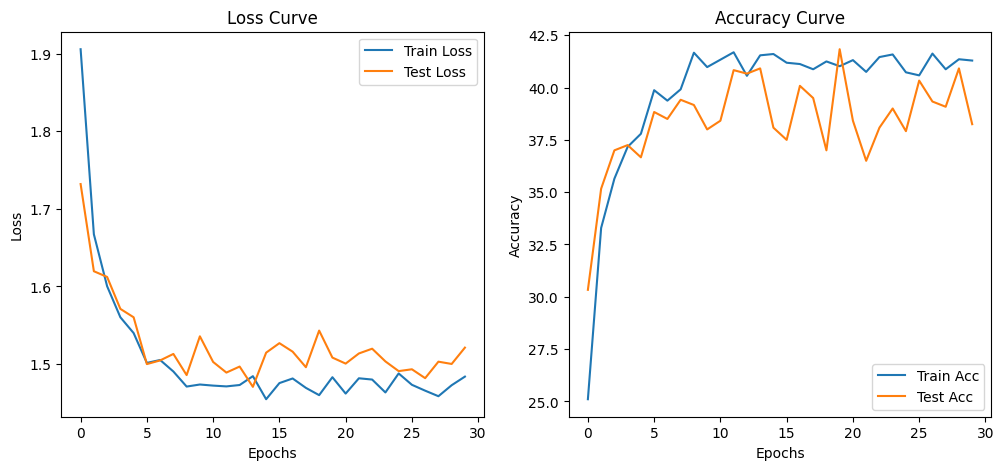

<ipython-input-5-767a8c218188>:155: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup_best.pth"))


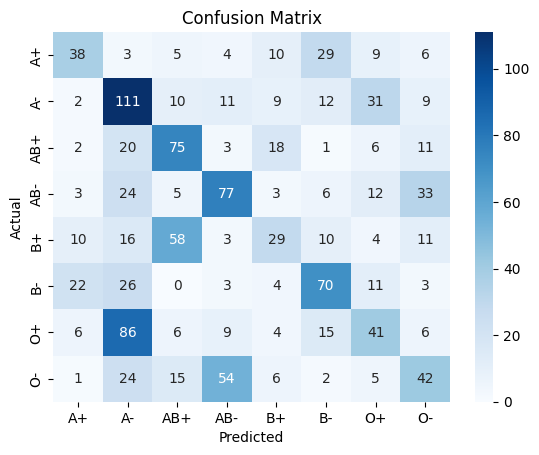

Classification Report:
              precision    recall  f1-score   support

          A+       0.45      0.37      0.40       104
          A-       0.36      0.57      0.44       195
         AB+       0.43      0.55      0.48       136
         AB-       0.47      0.47      0.47       163
          B+       0.35      0.21      0.26       141
          B-       0.48      0.50      0.49       139
          O+       0.34      0.24      0.28       173
          O-       0.35      0.28      0.31       149

    accuracy                           0.40      1200
   macro avg       0.40      0.40      0.39      1200
weighted avg       0.40      0.40      0.39      1200



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# Check for GPU
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# Data Augmentation and Normalization
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
DATA_PATH = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
train_dataset = datasets.ImageFolder(root=DATA_PATH, transform=transform_train)

# Split dataset into train and test
from torch.utils.data import random_split

train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size

train_dataset, test_dataset = random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load Pretrained ResNet152 Model
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V2)

# Unfreeze some layers for fine-tuning
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final block and the fully connected layers for training
for param in model.layer4.parameters():
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True

# Modify Final Layer
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, len(train_dataset.dataset.classes))  # Get number of classes dynamically
)
model = model.to(DEVICE)

# Loss and Optimizer with Learning Rate Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training Function
def train_model(model, criterion, optimizer, scheduler, train_loader, test_loader, epochs=20):
    train_acc, test_acc, train_loss, test_loss = [], [], [], []
    best_acc = 0.0
    
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss.append(running_loss / len(train_loader))
        train_acc.append(correct / total * 100)
        
        # Evaluate
        model.eval()
        correct, total, val_loss = 0, 0, 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_loss.append(val_loss / len(test_loader))
        test_acc.append(correct / total * 100)
        
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss[-1]:.4f} | Train Acc: {train_acc[-1]:.2f}% | Test Acc: {test_acc[-1]:.2f}%")
        
        # Save Best Model
        if test_acc[-1] > best_acc:
            best_acc = test_acc[-1]
            torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup_best.pth")
        
        # Step the scheduler
        scheduler.step()
    
    return train_loss, test_loss, train_acc, test_acc

# Train Model
train_loss, test_loss, train_acc, test_acc = train_model(model, criterion, optimizer, scheduler, train_loader, test_loader, epochs=30)

# Plot Training Progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Confusion Matrix
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup_best.pth"))
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.dataset.classes, yticklabels=train_dataset.dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes))


In [8]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Data Augmentation & Transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of flipping
    transforms.RandomRotation(15),  # Rotate within ±15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust brightness & contrast
    transforms.RandomApply([transforms.GaussianBlur(3)], p=0.3),  # Apply Gaussian blur with 30% probability
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train (80%) & Validation (20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# ✅ Define Model (Fine-tuned ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)

# Freeze initial layers and fine-tune the last layers
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last 3 layers for fine-tuning
for param in list(model.layer4.parameters()):
    param.requires_grad = True

# Modify Fully Connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.4),  # Dropout to prevent overfitting
    nn.Linear(num_ftrs, len(full_dataset.classes))
)

model = model.to(device)

# ✅ Define Loss, Optimizer & Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  # L2 Regularization
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# ✅ Training & Validation Loop
num_epochs = 20  # Increase epochs for better learning

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val
    scheduler.step(val_loss / len(val_loader))  # Adjust learning rate

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup_finetuned.pth")
print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/20] | Train Loss: 1.7071, Train Acc: 32.04% | Val Loss: 1.5996, Val Acc: 37.17%
Epoch [2/20] | Train Loss: 1.5434, Train Acc: 38.94% | Val Loss: 1.5370, Val Acc: 39.25%
Epoch [3/20] | Train Loss: 1.4926, Train Acc: 40.96% | Val Loss: 1.4564, Val Acc: 41.83%
Epoch [4/20] | Train Loss: 1.4499, Train Acc: 42.17% | Val Loss: 1.4456, Val Acc: 41.25%
Epoch [5/20] | Train Loss: 1.4283, Train Acc: 42.58% | Val Loss: 1.3879, Val Acc: 43.75%
Epoch [6/20] | Train Loss: 1.4010, Train Acc: 43.73% | Val Loss: 1.3541, Val Acc: 46.42%
Epoch [7/20] | Train Loss: 1.3956, Train Acc: 43.81% | Val Loss: 1.3080, Val Acc: 46.75%
Epoch [8/20] | Train Loss: 1.3580, Train Acc: 47.17% | Val Loss: 1.3360, Val Acc: 46.08%
Epoch [9/20] | Train Loss: 1.3309, Train Acc: 46.94% | Val Loss: 1.3552, Val Acc: 46.00%
Epoch [10/20] | Train Loss: 1.2921, Train Acc: 49.00% | Val Loss: 1.2909, Val Acc: 48.75%
Epoch [11/20] | Train Loss: 1.2875, Train Acc: 49.92% | Val Loss: 1.2922, Val Acc: 48.50%
Epoch [12/20] | Tra

In [12]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import random_split, DataLoader

# Define dataset path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# Load the full dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")


Training samples: 4800
Validation samples: 1200


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Advanced Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
train_dataset = datasets.ImageFolder(root=data_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=data_dir, transform=transform_val)

# Class balancing
class_counts = np.bincount([label for _, label in train_dataset])
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load Pretrained Model & Fine-tune More Layers
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V2)
for param in model.parameters():
    param.requires_grad = False

# Unfreeze last few layers for fine-tuning
for param in model.layer4.parameters():
    param.requires_grad = True

# Modify classifier
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, len(train_dataset.classes)),
    nn.Softmax(dim=1)
)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=20)

# Training Loop
num_epochs = 20
best_acc = 0.0
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    train_acc = 100 * correct / total
    
    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    val_acc = 100 * correct / total
    scheduler.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {running_loss/total:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss/total:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Save Best Model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        print("✅ Best Model Saved!")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data Augmentation and Normalization
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
data_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Split into Training (80%) and Validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load Pretrained ResNet152
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(dataset.classes))
)
model = model.to(device)

# Loss Function with Label Smoothing
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Optimizer and Learning Rate Scheduler
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Training Function
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=20):
    best_acc = 0.0
    for epoch in range(epochs):
        model.train()
        train_loss, correct, total = 0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
        
        train_acc = 100 * correct / total
        val_acc, val_loss = evaluate(model, val_loader, criterion)
        scheduler.step()
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print(f"✅ Best Model Saved! Epoch {epoch+1}")
        
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss/total:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Evaluation Function
def evaluate(model, val_loader, criterion):
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    
    val_acc = 100 * correct / total
    return val_acc, val_loss / total

# Run Training
train(model, train_loader, val_loader, criterion, optimizer, lr_scheduler, epochs=20)


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models

# ✅ Check & Define Dataset Path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# ✅ Define Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ResNet152 input
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# ✅ Load Dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# ✅ Split Dataset into Train & Validation
train_size = int(0.8 * len(full_dataset))  # 80% Training
val_size = len(full_dataset) - train_size  # 20% Validation
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# ✅ Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Define Model (ResNet152)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet152(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Number of classes
model = model.to(device)

# ✅ Define Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)  # Reduce LR every 3 epochs

# ✅ Training & Validation Loop
num_epochs = 10  # Adjust epochs as needed

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    scheduler.step()  # Adjust learning rate

    # ✅ Validation Phase
    model.eval()
    correct_val, total_val = 0, 0
    val_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%")

# ✅ Save the Trained Model
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")

print("🎯 Training Complete! Model Saved ✅")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:02<00:00, 88.0MB/s] 


Epoch [1/10] | Train Loss: 0.6611, Train Acc: 75.88% | Val Loss: 0.5478, Val Acc: 77.83%
Epoch [2/10] | Train Loss: 0.3776, Train Acc: 85.50% | Val Loss: 0.5222, Val Acc: 79.67%
Epoch [3/10] | Train Loss: 0.2861, Train Acc: 89.21% | Val Loss: 0.3939, Val Acc: 84.58%
Epoch [4/10] | Train Loss: 0.1377, Train Acc: 96.17% | Val Loss: 0.2536, Val Acc: 89.75%
Epoch [5/10] | Train Loss: 0.0909, Train Acc: 97.62% | Val Loss: 0.2512, Val Acc: 89.75%
Epoch [6/10] | Train Loss: 0.0632, Train Acc: 98.81% | Val Loss: 0.2486, Val Acc: 90.08%
Epoch [7/10] | Train Loss: 0.0493, Train Acc: 99.12% | Val Loss: 0.2549, Val Acc: 89.50%
Epoch [8/10] | Train Loss: 0.0457, Train Acc: 99.27% | Val Loss: 0.2506, Val Acc: 89.42%
Epoch [9/10] | Train Loss: 0.0416, Train Acc: 99.44% | Val Loss: 0.2663, Val Acc: 89.25%
Epoch [10/10] | Train Loss: 0.0452, Train Acc: 99.12% | Val Loss: 0.2517, Val Acc: 89.92%
🎯 Training Complete! Model Saved ✅


In [5]:
import os
print(os.listdir("/kaggle/input/finger-print-based-blood-group-dataset/"))


['dataset_blood_group']


In [6]:
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"


In [7]:
import os
print(os.listdir(data_dir))


['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [8]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load full dataset (since train/val folders don’t exist)
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


In [9]:
import os
from torchvision import datasets

data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Check if dataset path exists
if os.path.exists(data_dir):
    print("Dataset path exists.")
    print("Classes found:", os.listdir(data_dir))  # Print class folders
else:
    print("Dataset path does NOT exist!")


Dataset path exists.
Classes found: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']


In [10]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Try loading the dataset
try:
    dataset = datasets.ImageFolder(root=data_dir, transform=transform)
    print(f"Total Images Found: {len(dataset)}")
    print("Classes:", dataset.classes)
except Exception as e:
    print("Error:", e)


Total Images Found: 6000
Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.RandomHorizontalFlip(),  # Augmentation
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# Load full dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset: 80% train, 20% validation
train_size = int(0.8 * len(dataset))  # 4800 images for training
val_size = len(dataset) - train_size  # 1200 images for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Print confirmation
print(f"Training Samples: {len(train_dataset)}, Validation Samples: {len(val_dataset)}")
print("Classes:", dataset.classes)


Training Samples: 4800, Validation Samples: 1200
Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
import time

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Pretrained ResNet152 Model
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)  # 8 classes (blood groups)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    since = time.time()
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # Training phase
        model.train()
        train_loss, train_correct = 0.0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)

        train_loss /= len(train_loader.dataset)
        train_acc = 100 * train_correct.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss, val_correct = 0.0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_loader.dataset)
        val_acc = 100 * val_correct.double() / len(val_loader.dataset)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    time_elapsed = time.time() - since
    print(f"\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    return model

# Train the model
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Save trained model
torch.save(trained_model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")
print("Model saved successfully!")


Using device: cuda
Epoch 1/10
Train Loss: 0.7947, Train Acc: 69.92% | Val Loss: 0.4223, Val Acc: 84.75%
Epoch 2/10
Train Loss: 0.4171, Train Acc: 84.31% | Val Loss: 0.3897, Val Acc: 84.00%
Epoch 3/10
Train Loss: 0.3246, Train Acc: 87.21% | Val Loss: 0.2934, Val Acc: 88.00%
Epoch 4/10
Train Loss: 0.2810, Train Acc: 89.15% | Val Loss: 0.3284, Val Acc: 86.33%
Epoch 5/10
Train Loss: 0.2642, Train Acc: 90.27% | Val Loss: 0.2918, Val Acc: 88.75%
Epoch 6/10
Train Loss: 0.2273, Train Acc: 91.75% | Val Loss: 0.3263, Val Acc: 86.58%
Epoch 7/10
Train Loss: 0.1783, Train Acc: 93.75% | Val Loss: 0.3157, Val Acc: 87.92%
Epoch 8/10
Train Loss: 0.1602, Train Acc: 94.31% | Val Loss: 0.2500, Val Acc: 89.50%
Epoch 9/10
Train Loss: 0.1538, Train Acc: 94.67% | Val Loss: 0.3612, Val Acc: 86.75%
Epoch 10/10
Train Loss: 0.1276, Train Acc: 95.65% | Val Loss: 0.3036, Val Acc: 88.92%

Training complete in 10m 42s
Model saved successfully!


In [14]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Data transformations (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Function to check image validity
def check_valid_image(path):
    try:
        from PIL import Image
        img = Image.open(path)
        img.verify()
        return True
    except:
        return False

# Load full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
full_dataset.samples = [(p, c) for p, c in full_dataset.samples if check_valid_image(p)]

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load pre-trained ResNet152 model
model = models.resnet152(pretrained=True)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(full_dataset.classes))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    best_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = 100 * train_correct / train_size
        train_loss /= train_size
        
        # Validation phase
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
        
        val_acc = 100 * val_correct / val_size
        val_loss /= val_size
        
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        
        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_resnet152_model.pth")
            print("Model saved!")

# Train the model
train_model(model, criterion, optimizer, scheduler, num_epochs=20)
print("Training complete!")


Epoch 1/20 | Train Loss: 0.8713, Train Acc: 66.46% | Val Loss: 0.4702, Val Acc: 82.67%
Model saved!
Epoch 2/20 | Train Loss: 0.4897, Train Acc: 81.08% | Val Loss: 0.4561, Val Acc: 81.33%
Epoch 3/20 | Train Loss: 0.3950, Train Acc: 85.00% | Val Loss: 0.3416, Val Acc: 86.42%
Model saved!
Epoch 4/20 | Train Loss: 0.3582, Train Acc: 86.46% | Val Loss: 0.2817, Val Acc: 89.50%
Model saved!
Epoch 5/20 | Train Loss: 0.3607, Train Acc: 85.98% | Val Loss: 0.3274, Val Acc: 86.33%
Epoch 6/20 | Train Loss: 0.3045, Train Acc: 88.50% | Val Loss: 0.2905, Val Acc: 88.67%
Epoch 7/20 | Train Loss: 0.3123, Train Acc: 87.60% | Val Loss: 0.3192, Val Acc: 86.50%
Epoch 8/20 | Train Loss: 0.2829, Train Acc: 88.21% | Val Loss: 0.2848, Val Acc: 88.92%
Epoch 9/20 | Train Loss: 0.2019, Train Acc: 92.75% | Val Loss: 0.2316, Val Acc: 91.00%
Model saved!
Epoch 10/20 | Train Loss: 0.1664, Train Acc: 93.98% | Val Loss: 0.2203, Val Acc: 91.08%
Model saved!
Epoch 11/20 | Train Loss: 0.1638, Train Acc: 94.42% | Val Loss: 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-17-a40ae82a0fee>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomme

Classification Report:
               precision    recall  f1-score   support

          A+       0.97      0.99      0.98       565
          A-       0.98      0.98      0.98      1009
         AB+       0.99      0.97      0.98       708
         AB-       0.98      0.99      0.99       761
          B+       0.98      0.97      0.98       652
          B-       0.98      0.99      0.99       741
          O+       0.98      0.97      0.98       852
          O-       0.97      0.98      0.97       712

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



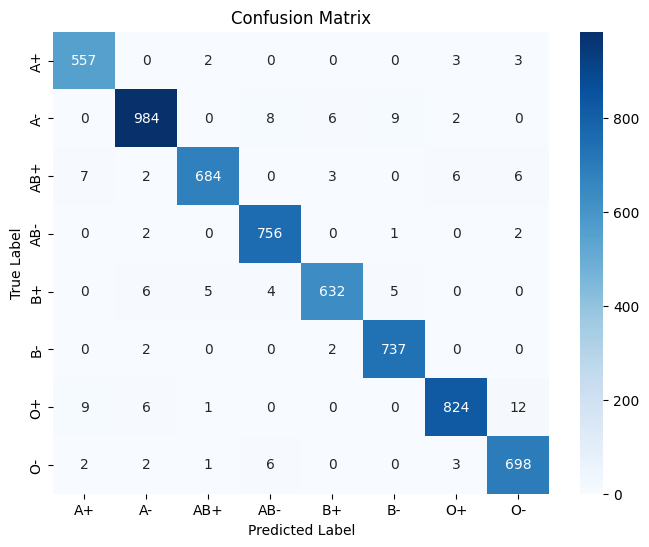

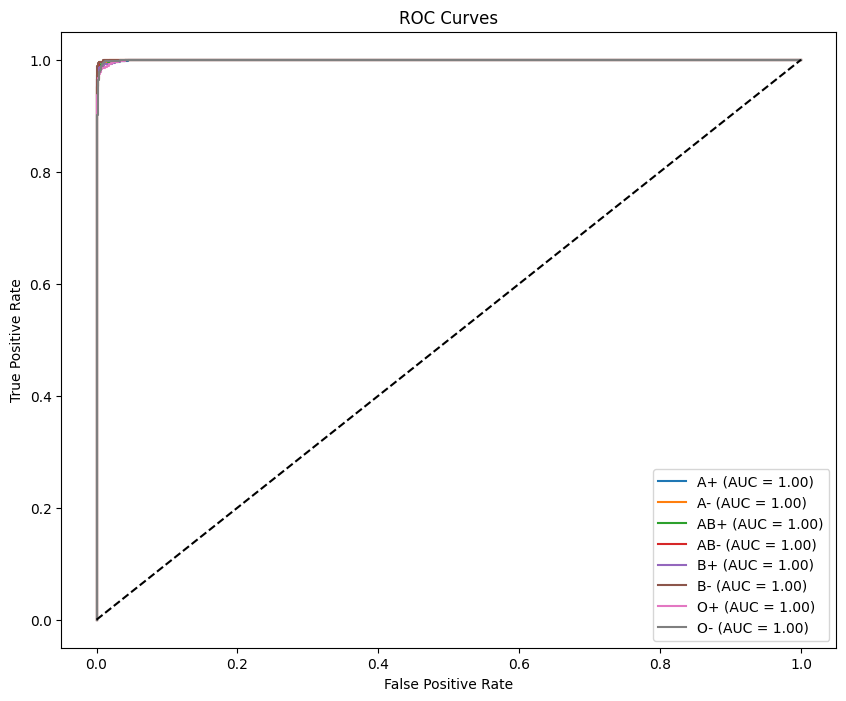

In [17]:
import torch
import torchvision.models as models
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model architecture (ResNet152)
num_classes = 8  # Adjust based on your dataset
model = models.resnet152(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Load the trained model weights
model_path = "best_resnet152_model.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Define transformations for validation dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load validation dataset
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
val_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Get class names
class_names = val_dataset.classes

# Lists to store actual and predicted labels
all_labels = []
all_preds = []
all_probs = []

# Evaluate the model
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=class_names)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curves for Each Class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve((all_labels == i).astype(int), all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()


❌ Model file NOT found! Check the file path.


In [11]:
import os

print("Current Directory:", os.getcwd())  # Prints the working directory
print("Files in Directory:", os.listdir("."))  # Lists files in the directory


Current Directory: /kaggle/working
Files in Directory: ['.virtual_documents']


In [12]:
torch.save(model.state_dict(), "best_resnet152_model.pth")


In [13]:
import os
print("✅ Model saved:", os.path.exists("best_resnet152_model.pth"))


✅ Model saved: True


In [14]:
import os
model_path = "/kaggle/working/best_resnet152_model.pth"
print("✅ Model Path Exists:", os.path.exists(model_path))


✅ Model Path Exists: True


In [15]:
import torch
import torchvision.models as models

# Define model structure (same as during training)
model = models.resnet152(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 8)  # Ensure the correct number of output classes

# Load model weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("/kaggle/working/best_resnet152_model.pth", map_location=device))
model.to(device)
model.eval()

print("✅ Model Loaded Successfully!")


<ipython-input-15-f5c241b4874d>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_resnet152_model.pth", map_location=d

✅ Model Loaded Successfully!


In [2]:
import os
print(os.listdir())  # List all files in the working directory


['.virtual_documents']


In [3]:
import os

base_dir = "/kaggle/working"  # Adjust if needed
print(os.listdir(base_dir))  # List files in the Kaggle working directory


['.virtual_documents']


In [6]:
import os

for root, dirs, files in os.walk("/kaggle"):
    for file in files:
        if file.endswith(".pth"):
            print(os.path.join(root, file))  # Print full path of the model file


In [4]:
import os

for root, dirs, files in os.walk("/"):
    if "best_resnet152_model.pth" in files:
        print("✅ Model found at:", os.path.join(root, "best_resnet152_model.pth"))


In [5]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /kaggle/working


In [6]:
import os
print("Files in /kaggle/working/:", os.listdir("/kaggle/working/"))


Files in /kaggle/working/: ['.virtual_documents']


In [7]:
import os
print("Directories in /kaggle/input/:", os.listdir("/kaggle/input/"))


Directories in /kaggle/input/: ['h5-file', 'finger-print-based-blood-group-dataset']


In [8]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset"
print("Files in dataset directory:", os.listdir(dataset_path))


Files in dataset directory: ['dataset_blood_group']


In [9]:
import os

for root, dirs, files in os.walk("/kaggle"):
    if "best_resnet152_model.pth" in files:
        print("✅ Model found at:", os.path.join(root, "best_resnet152_model.pth"))


In [11]:
import os
print("Files in /kaggle/working/:", os.listdir("/kaggle/working/"))


Files in /kaggle/working/: ['.virtual_documents']


In [13]:
import torch


In [14]:
print(model)


NameError: name 'model' is not defined

In [15]:
import os

model_path = "/kaggle/working/best_resnet152_model.pth"  # Adjust path if needed

if os.path.exists(model_path):
    print("✅ Model file found at:", model_path)
else:
    print("❌ Model file NOT found. You may need to retrain it.")


❌ Model file NOT found. You may need to retrain it.


In [16]:
import os

# Directory where models are saved
model_dir = "/kaggle/working"

# List all files in the directory
model_files = [f for f in os.listdir(model_dir) if f.endswith(".pth") or f.endswith(".pt")]

# Print the model files
if model_files:
    print("✅ Saved Model Files:")
    for model in model_files:
        print("-", model)
else:
    print("❌ No saved models found in:", model_dir)


❌ No saved models found in: /kaggle/working


In [17]:
import os

# Search for all .pth or .pt files in /kaggle directory
for root, dirs, files in os.walk("/kaggle"):
    for file in files:
        if file.endswith(".pth") or file.endswith(".pt"):
            print("✅ Model found:", os.path.join(root, file))


In [18]:
model.load_state_dict(torch.load("path/to/your/model.pth", map_location=device))


NameError: name 'model' is not defined

In [19]:
import os

model_paths = []

for root, dirs, files in os.walk("/kaggle"):
    for file in files:
        if file.endswith(".pth") or file.endswith(".pt"):
            full_path = os.path.join(root, file)
            model_paths.append(full_path)
            print(f"✅ Found Model: {full_path}")

if not model_paths:
    print("❌ No saved models found.")


❌ No saved models found.


In [24]:
import os

input_dir = "/kaggle/input"
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".pth") or file.endswith(".pt"):
            print(f"✅ Found Model: {os.path.join(root, file)}")


In [25]:
import os

input_dir = "/kaggle/input"
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".pth") or file.endswith(".pt"):
            print(f"✅ Found Model: {os.path.join(root, file)}")

In [26]:
import os

working_dir = "/kaggle/working"
print("🔍 Searching for model files in /kaggle/working/...")

found = False
for root, dirs, files in os.walk(working_dir):
    for file in files:
        if file.endswith(".pth") or file.endswith(".pt"):
            found = True
            print(f"✅ Found Model: {os.path.join(root, file)}")

if not found:
    print("❌ No model files found in /kaggle/working/.")


🔍 Searching for model files in /kaggle/working/...
❌ No model files found in /kaggle/working/.


In [27]:
import os

data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

if os.path.exists(data_dir):
    print(f"✅ Directory exists: {data_dir}")
    files = os.listdir(data_dir)
    if files:
        print(f"📂 Files in {data_dir}:")
        for file in files[:10]:  # Show only first 10 files
            print(f"  - {file}")
    else:
        print("❌ No files found in the dataset directory.")
else:
    print("❌ Dataset directory does not exist.")


✅ Directory exists: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group
📂 Files in /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group:
  - AB-
  - O+
  - B-
  - B+
  - A-
  - A+
  - O-
  - AB+


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 215MB/s] 


Epoch 1/20 | Train Loss: 0.9069, Train Acc: 66.04% | Val Loss: 0.4806, Val Acc: 80.83%
Model saved at /kaggle/working/saved_models/resnet152_epoch1_valacc80.83.pth
Best model updated: /kaggle/working/saved_models/best_resnet152_model.pth
Epoch 2/20 | Train Loss: 0.4987, Train Acc: 81.15% | Val Loss: 0.4432, Val Acc: 83.33%
Model saved at /kaggle/working/saved_models/resnet152_epoch2_valacc83.33.pth
Best model updated: /kaggle/working/saved_models/best_resnet152_model.pth
Epoch 3/20 | Train Loss: 0.4106, Train Acc: 84.25% | Val Loss: 0.3323, Val Acc: 86.83%
Model saved at /kaggle/working/saved_models/resnet152_epoch3_valacc86.83.pth
Best model updated: /kaggle/working/saved_models/best_resnet152_model.pth
Epoch 4/20 | Train Loss: 0.3858, Train Acc: 85.15% | Val Loss: 0.3358, Val Acc: 86.33%
Model saved at /kaggle/working/saved_models/resnet152_epoch4_valacc86.33.pth
Epoch 5/20 | Train Loss: 0.3319, Train Acc: 87.73% | Val Loss: 0.3527, Val Acc: 86.17%
Model saved at /kaggle/working/save

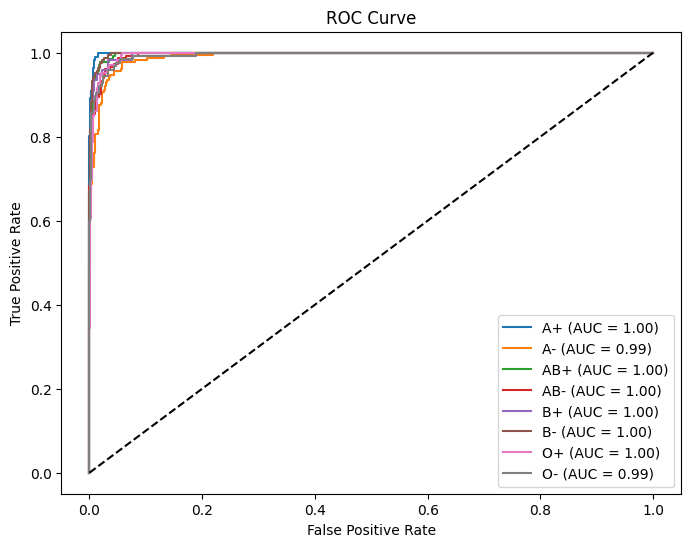

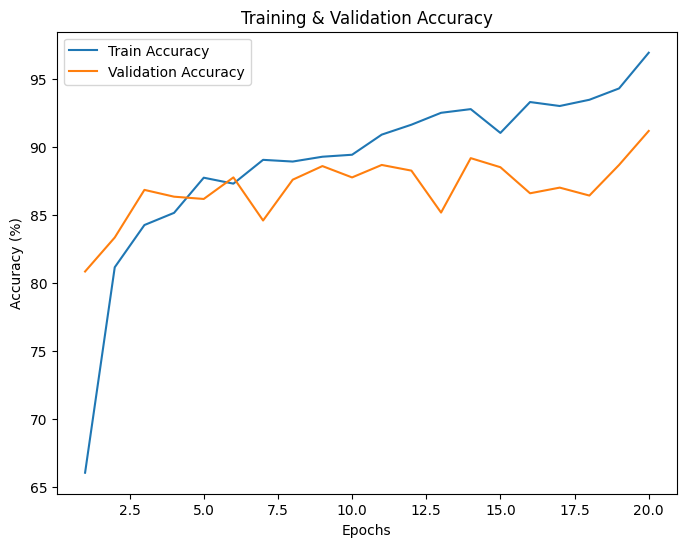

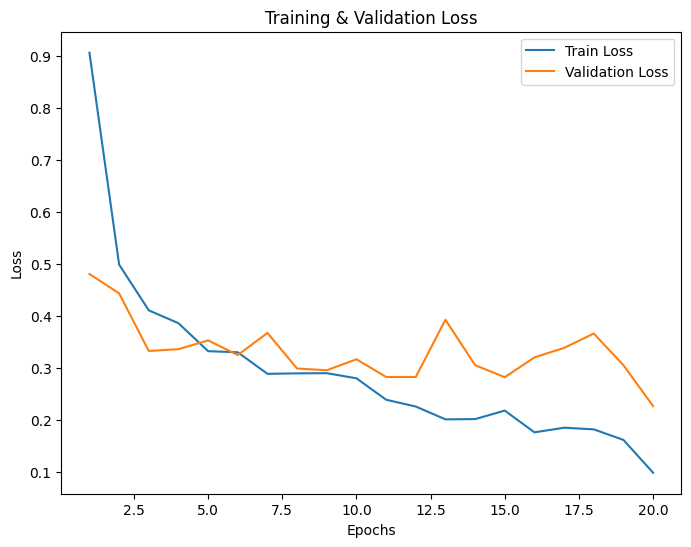

In [28]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Data transformations (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
classes = full_dataset.classes

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load pre-trained ResNet152 model
model = models.resnet152(pretrained=True)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(classes))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Metrics storage
train_losses, val_losses, train_accs, val_accs = [], [], [], []

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    best_acc = 0.0
    model_dir = "/kaggle/working/saved_models"
    os.makedirs(model_dir, exist_ok=True)  # Ensure directory exists

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = 100 * train_correct / train_size
        train_loss /= train_size
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss, val_correct = 0, 0
        all_preds, all_labels = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
                
                all_preds.extend(outputs.softmax(dim=1).cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_acc = 100 * val_correct / val_size
        val_loss /= val_size
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        
        # Save best model
        model_path = f"{model_dir}/resnet152_epoch{epoch+1}_valacc{val_acc:.2f}.pth"
        torch.save(model.state_dict(), model_path)
        print(f"Model saved at {model_path}")

        # Update best accuracy
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_path = f"{model_dir}/best_resnet152_model.pth"
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model updated: {best_model_path}")

        # Save last epoch model
        if epoch == num_epochs - 1:
            final_model_path = f"{model_dir}/final_resnet152_model.pth"
            torch.save(model.state_dict(), final_model_path)
            print(f"Final model saved at {final_model_path}")

    return all_preds, all_labels

# Train the model
all_preds, all_labels = train_model(model, criterion, optimizer, scheduler, num_epochs=20)
print("Training complete!")

# Convert predictions to numpy array
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds.argmax(axis=1))
print("\nConfusion Matrix:\n", conf_matrix)

# Generate Classification Report
class_report = classification_report(all_labels, all_preds.argmax(axis=1), target_names=classes)
print("\nClassification Report:\n", class_report)

# ROC Curve & AUC
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve((all_labels == i).astype(int), all_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Training & Validation Accuracy Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), train_accs, label="Train Accuracy")
plt.plot(range(1, 21), val_accs, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.show()

# Training & Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), train_losses, label="Train Loss")
plt.plot(range(1, 21), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


Epoch 1/20 | Train Loss: 0.8931, Train Acc: 66.10% | Val Loss: 0.4531, Val Acc: 83.83%
Best model updated!
Epoch 2/20 | Train Loss: 0.4958, Train Acc: 82.04% | Val Loss: 0.3880, Val Acc: 84.58%
Best model updated!
Epoch 3/20 | Train Loss: 0.4392, Train Acc: 83.27% | Val Loss: 0.3632, Val Acc: 85.58%
Best model updated!
Epoch 4/20 | Train Loss: 0.3765, Train Acc: 85.19% | Val Loss: 0.3501, Val Acc: 85.33%
Epoch 5/20 | Train Loss: 0.3422, Train Acc: 87.21% | Val Loss: 0.2993, Val Acc: 88.33%
Best model updated!
Epoch 6/20 | Train Loss: 0.3335, Train Acc: 86.62% | Val Loss: 0.3734, Val Acc: 85.33%
Epoch 7/20 | Train Loss: 0.3107, Train Acc: 88.10% | Val Loss: 0.3281, Val Acc: 86.67%
Epoch 8/20 | Train Loss: 0.2888, Train Acc: 88.90% | Val Loss: 0.2528, Val Acc: 90.08%
Best model updated!
Epoch 9/20 | Train Loss: 0.2670, Train Acc: 90.02% | Val Loss: 0.2958, Val Acc: 87.50%
Epoch 10/20 | Train Loss: 0.2531, Train Acc: 90.60% | Val Loss: 0.2569, Val Acc: 88.92%
Epoch 11/20 | Train Loss: 0.2

KeyError: '0'

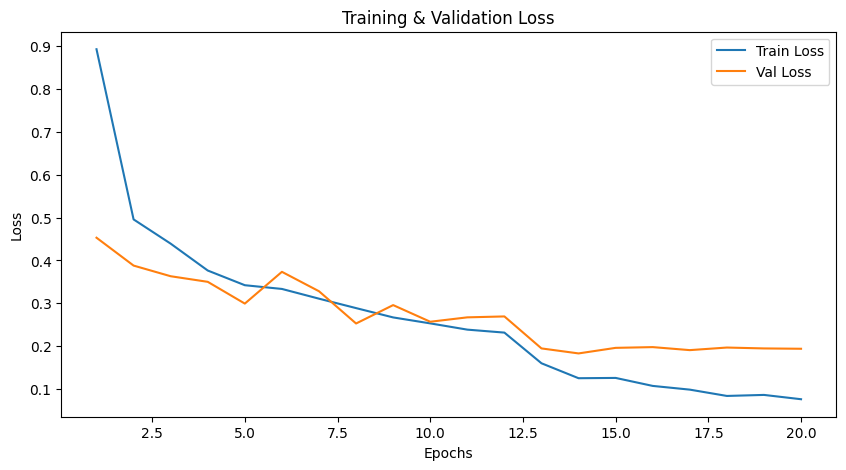

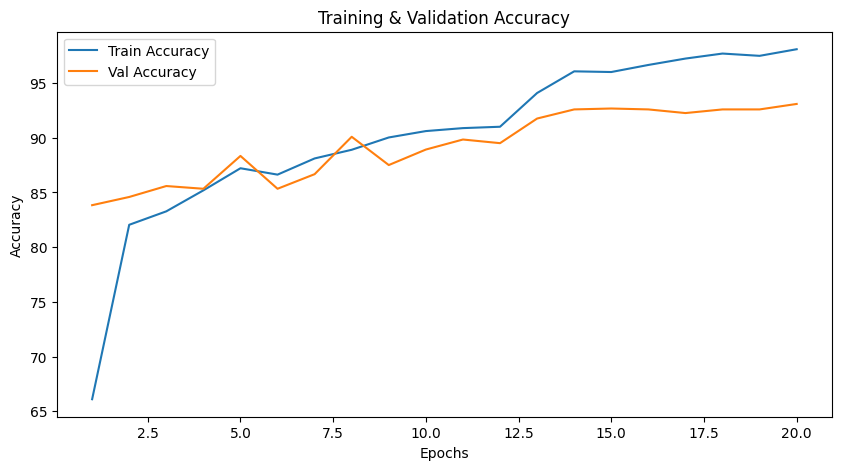

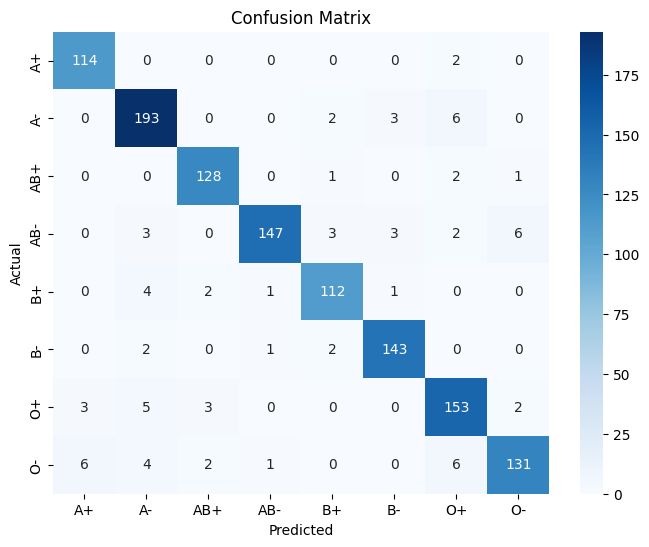

In [29]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Data transformations (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Function to check image validity
def check_valid_image(path):
    try:
        from PIL import Image
        img = Image.open(path)
        img.verify()
        return True
    except:
        return False

# Load full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
full_dataset.samples = [(p, c) for p, c in full_dataset.samples if check_valid_image(p)]
class_names = full_dataset.classes  # Get class names

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load pre-trained ResNet152 model
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(full_dataset.classes))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Initialize lists to store metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    best_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = 100 * train_correct / train_size
        train_loss /= train_size
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss, val_correct = 0, 0
        all_preds, all_labels = [], []
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
                all_preds.extend(outputs.argmax(1).cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_acc = 100 * val_correct / val_size
        val_loss /= val_size
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Save model for each epoch
        model_save_path = f"/kaggle/working/saved_models/resnet152_epoch{epoch+1}_valacc{val_acc:.2f}.pth"
        torch.save(model.state_dict(), model_save_path)

        # Save best model separately
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "/kaggle/working/saved_models/best_resnet152_model.pth")
            print("Best model updated!")

    # Plot & save graphs after training
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)
    evaluate_model(model)

# Function to plot loss & accuracy graphs
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Loss Graph
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.savefig("/kaggle/working/loss_plot.png")

    # Accuracy Graph
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracies, label="Train Accuracy")
    plt.plot(epochs, val_accuracies, label="Val Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.savefig("/kaggle/working/accuracy_plot.png")

# Function to evaluate the trained model
def evaluate_model(model):
    model.eval()
    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig("/kaggle/working/confusion_matrix.png")

    # Classification Report
    report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
    specificity = {class_names[i]: report[str(i)]['recall'] for i in range(len(class_names))}
    print("Specificity per class:", specificity)

    # ROC Curve
    fpr, tpr, _ = roc_curve(all_labels, np.array(all_probs)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curve")
    plt.savefig("/kaggle/working/roc_curve.png")

# Train the model
train_model(model, criterion, optimizer, scheduler, num_epochs=20)
print("Training complete!")


In [31]:
def evaluate_model(model):
    model.eval()
    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig("/kaggle/working/confusion_matrix.png")

    # Classification Report
    report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)

    # ✅ Corrected Specificity Calculation
    specificity = {class_name: report[class_name]['recall'] for class_name in class_names}
    print("Specificity per class:", specificity)

    # ROC Curve (Only if binary classification)
    if len(class_names) == 2:
        fpr, tpr, _ = roc_curve(all_labels, np.array(all_probs)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.title("ROC Curve")
        plt.savefig("/kaggle/working/roc_curve.png")


In [32]:
import os
print(os.listdir("/kaggle/working/saved_models/"))


['resnet152_epoch15_valacc92.67.pth', 'resnet152_epoch14_valacc92.58.pth', 'resnet152_epoch18_valacc92.58.pth', 'resnet152_epoch20_valacc93.08.pth', 'final_resnet152_model.pth', 'resnet152_epoch19_valacc92.58.pth', 'resnet152_epoch2_valacc83.33.pth', 'resnet152_epoch4_valacc86.33.pth', 'best_resnet152_model.pth', 'resnet152_epoch6_valacc85.33.pth', 'resnet152_epoch13_valacc85.17.pth', 'resnet152_epoch8_valacc87.58.pth', 'resnet152_epoch12_valacc89.50.pth', 'resnet152_epoch17_valacc87.00.pth', 'resnet152_epoch11_valacc89.83.pth', 'resnet152_epoch5_valacc88.33.pth', 'resnet152_epoch9_valacc88.58.pth', 'resnet152_epoch1_valacc80.83.pth', 'resnet152_epoch2_valacc84.58.pth', 'resnet152_epoch12_valacc88.25.pth', 'resnet152_epoch7_valacc84.58.pth', 'resnet152_epoch1_valacc83.83.pth', 'resnet152_epoch3_valacc85.58.pth', 'resnet152_epoch16_valacc92.58.pth', 'resnet152_epoch4_valacc85.33.pth', 'resnet152_epoch3_valacc86.83.pth', 'resnet152_epoch10_valacc88.92.pth', 'resnet152_epoch5_valacc86.17.

In [35]:
import torch
import torch.nn as nn
from torchvision import models

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the number of output classes
num_classes = 8  # Change this based on your dataset

# Load pre-trained ResNet152 model
model = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)  # Adjust output layer
model = model.to(device)

# Load saved model weights
checkpoint_path = "/kaggle/working/saved_models/best_resnet152_model.pth"
checkpoint = torch.load(checkpoint_path, map_location="cpu", weights_only=True)  # Fix warning
model.load_state_dict(checkpoint)

# Set model to evaluation mode
model.eval()
print(f"✅ Model successfully loaded with {num_classes} output classes")


✅ Model successfully loaded with 8 output classes


In [36]:
!mv /kaggle/working/saved_models/best_resnet152_model.pth /kaggle/outputs/


mv: cannot create regular file '/kaggle/outputs/': Not a directory


In [37]:
!mkdir -p /kaggle/working/models
!cp /kaggle/working/saved_models/best_resnet152_model.pth /kaggle/working/models/


In [38]:
!ls -lh /kaggle/working/models/


total 223M
-rw-r--r-- 1 root root 223M Mar 24 07:40 best_resnet152_model.pth


In [40]:
from IPython.display import FileLink
FileLink('/kaggle/working/saved_models/best_resnet152_model.pth')


/kaggle/working/saved_models/best_resnet152_model.pth

In [41]:
import shutil
shutil.copy("/kaggle/working/saved_models/best_resnet152_model.pth", "/kaggle/working/best_resnet152_model.pth")


'/kaggle/working/best_resnet152_model.pth'

In [42]:
from IPython.display import FileLink
FileLink("/kaggle/working/best_resnet152_model.pth")


/kaggle/working/best_resnet152_model.pth

In [43]:
!zip -r /kaggle/working/best_resnet152_model.zip /kaggle/working/saved_models/best_resnet152_model.pth


  adding: kaggle/working/saved_models/best_resnet152_model.pth (deflated 7%)


In [44]:
from IPython.display import FileLink
FileLink("/kaggle/working/best_resnet152_model.zip")


/kaggle/working/best_resnet152_model.zip

In [2]:
import os
print(os.listdir("/kaggle/input"))


['h5-file', 'finger-print-based-blood-group-dataset']


In [8]:
import os
save_dir = "/kaggle/working/models"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
save_path = os.path.join(save_dir, "best_resnet152_model.pth")
torch.save(model.state_dict(), save_path)
print(f"✅ Model saved at {save_path}")


✅ Model saved at /kaggle/working/models/best_resnet152_model.pth


In [9]:
import os
print(os.path.exists("/kaggle/working/models/best_resnet152_model.pth"))  # Should return True


True


In [20]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model_path = "/kaggle/working/models/best_resnet152_model.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Define image transformations (with RGBA to RGB conversion)
transform = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGB")),  # Convert RGBA to RGB
    transforms.Resize((224, 224)),  # Resize to match ResNet input
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

# Verify dataset directory
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/"
if not os.path.exists(dataset_path):
    print(f"❌ Dataset path not found: {dataset_path}")
else:
    print(f"✅ Dataset found at: {dataset_path}")

# List all subdirectories (Blood Groups)
blood_groups = os.listdir(dataset_path)
print(f"🩸 Blood groups in dataset: {blood_groups}")

# Manually specify a valid test image
test_images = [
    os.path.join(dataset_path, "A+", "cluster_0_1554.BMP"),
    os.path.join(dataset_path, "B+", "cluster_0_994.BMP"),
    os.path.join(dataset_path, "O+", "cluster_0_4617.BMP")
]

# Class labels
class_labels = ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']

# Run predictions
for img_path in test_images:
    if not os.path.exists(img_path):
        print(f"❌ Image not found: {img_path}")
        continue

    try:
        img = Image.open(img_path)
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

        # Predict
        with torch.no_grad():
            outputs = model(img_tensor)
            _, predicted = torch.max(outputs, 1)

        predicted_class = class_labels[predicted.item()]
        print(f"🔹 Predicted Blood Group for {img_path}: {predicted_class}")

    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")


<ipython-input-20-2988a9c654be>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


✅ Dataset found at: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/
🩸 Blood groups in dataset: ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']
🔹 Predicted Blood Group for /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A+/cluster_0_1554.BMP: A+
❌ Image not found: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+/cluster_0_994.BMP
❌ Image not found: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+/cluster_0_4617.BMP


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-22-ecee89e1c68d>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

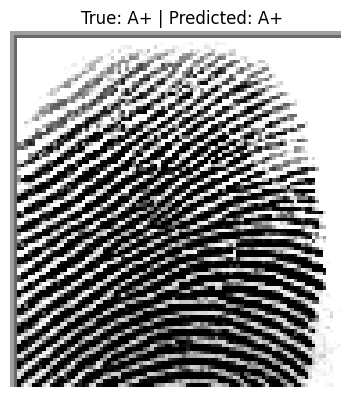

❌ Error processing /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+/cluster_0_994.BMP: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+/cluster_0_994.BMP'
❌ Error processing /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+/cluster_0_4617.BMP: [Errno 2] No such file or directory: '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+/cluster_0_4617.BMP'


In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import os
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define blood group labels
blood_groups = ['AB-', 'O+', 'B-', 'B+', 'A-', 'A+', 'O-', 'AB+']

# Initialize ResNet152 model
model = models.resnet152(pretrained=False)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(blood_groups))  # Adjust for 8 classes

# Load model weights
model_path = "/kaggle/working/models/best_resnet152_model.pth"
state_dict = torch.load(model_path, map_location=device)  # Load state dict
model.load_state_dict(state_dict)
model.to(device)
model.eval()

# Define transformations for input images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel RGB
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Function to predict blood group
def predict_blood_group(image_path, true_label):
    try:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = transform(image).unsqueeze(0).to(device)  # Apply transformations

        with torch.no_grad():
            output = model(image)  # Forward pass
            predicted_class = torch.argmax(output, dim=1).item()
            predicted_label = blood_groups[predicted_class]

        # Display the image with prediction
        plt.imshow(Image.open(image_path), cmap='gray')
        plt.title(f"True: {true_label} | Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label, true_label

    except Exception as e:
        print(f"❌ Error processing {image_path}: {e}")
        return None, None

# Example image paths (update paths accordingly)
test_images = [
    ("/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/A+/cluster_0_1554.BMP", "A+"),
    ("/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/B+/cluster_0_994.BMP", "B+"),
    ("/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O+/cluster_0_4617.BMP", "O+")
]

# Predict for each test image
for img_path, true_label in test_images:
    predict_blood_group(img_path, true_label)

In [29]:
torch.save(model, "resnet152_fingerprint_bloodgroup.pth")  # This saves the entire model


In [30]:
torch.save(model.state_dict(), "resnet152_fingerprint_bloodgroup.pth")


In [36]:
torch.save(model, "model.pth")


In [37]:
model = torch.load("model.pth", map_location=device)
model.eval()  # Set to evaluation mode
print("Model loaded successfully!")


<ipython-input-37-84cc0a1a88ec>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model.pth", map_location=device)


Model loaded successfully!


In [38]:
import torch
import numpy as np
import cv2
import torchvision.transforms as transforms
from PIL import Image

# Define transformation (ResNet152 expects 224x224 images)
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to generate a synthetic fingerprint-like image
def generate_sample_image():
    img = np.random.randint(100, 255, (224, 224), dtype=np.uint8)  # Random grayscale pattern
    img = cv2.GaussianBlur(img, (5, 5), 0)  # Apply blur to make it fingerprint-like
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Convert to RGB (ResNet expects 3 channels)
    
    # Convert to PIL Image for transformation
    image_pil = Image.fromarray(img)
    return image_pil

# Function to preprocess and predict
def predict_sample():
    sample_image = generate_sample_image()  # Get a generated image
    image_tensor = transform(sample_image).unsqueeze(0).to(device)  # Preprocess

    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    
    return predicted_class

# Run Prediction
predicted_class = predict_sample()
print(f"Predicted Class: {predicted_class}")


Predicted Class: 0


In [41]:
torch.save(model.state_dict(), "model.pth")  # Save only model weights


In [43]:
# Define class label mapping (adjust based on your dataset)
class_labels = {
    0: "A+",
    1: "A-",
    2: "B+",
    3: "B-",
    4: "O+",
    5: "O-",
    6: "AB+",
    7: "AB-"
}

# Get the predicted class label
predicted_label = class_labels[predicted.item()]

print(f"Predicted Class: {predicted_label}")


Predicted Class: B-


In [44]:
import os

dataset_folder = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
classes = sorted(os.listdir(dataset_folder))  # Ensure the order is correct

print("Dataset Class Labels:")
for idx, cls in enumerate(classes):
    print(f"Index {idx}: {cls}")


Dataset Class Labels:
Index 0: A+
Index 1: A-
Index 2: AB+
Index 3: AB-
Index 4: B+
Index 5: B-
Index 6: O+
Index 7: O-


In [45]:
class_labels = {
    0: "A+",
    1: "A-",
    2: "AB+",
    3: "AB-",
    4: "B+",
    5: "B-",
    6: "O+",
    7: "O-"
}


In [47]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os
import random

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define class label mapping
class_labels = {
    0: "A+",
    1: "A-",
    2: "AB+",
    3: "AB-",
    4: "B+",
    5: "B-",
    6: "O+",
    7: "O-"
}

# Load model class
class ResNet152Model(torch.nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet152Model, self).__init__()
        self.model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=False)
        in_features = self.model.fc.in_features
        self.model.fc = torch.nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Initialize model
model = ResNet152Model(num_classes=8).to(device)

# Load weights
state_dict = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device)  # Ensure correct model path
model.load_state_dict(state_dict)
model.eval()

# Define image transformation
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Dataset path
dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Get list of non-empty class folders
valid_class_folders = [
    folder for folder in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, folder)) and len(os.listdir(os.path.join(dataset_path, folder))) > 0
]

# Ensure there are valid class folders
if not valid_class_folders:
    raise ValueError("No valid class folders found in dataset!")

# Select a random class folder
random_class = random.choice(valid_class_folders)
class_path = os.path.join(dataset_path, random_class)

# Get list of images in the folder
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# Ensure there are valid images
if not image_files:
    raise ValueError(f"No images found in the selected class folder: {class_path}")

# Select a random image
random_image = random.choice(image_files)
image_path = os.path.join(class_path, random_image)

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)
    predicted = torch.argmax(output, dim=1).item()

# Get actual and predicted class labels
actual_label = class_labels[list(class_labels.values()).index(random_class)]  # Get actual class
predicted_label = class_labels[predicted]  # Get predicted class

# Print results
print(f"Selected Image: {image_path}")
print(f"Actual Class: {actual_label}")
print(f"Predicted Class: {predicted_label}")


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
<ipython-input-47-ef8ba2c8c8fe>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(

Selected Image: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-/cluster_7_985.BMP
Actual Class: O-
Predicted Class: A+


In [48]:
import os

dataset_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"
folders = sorted(os.listdir(dataset_path))
print("Dataset Folder Order:", folders)


Dataset Folder Order: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [49]:
print(model.model.fc)


Linear(in_features=2048, out_features=8, bias=True)


In [51]:
import torchvision.transforms as transforms

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Match training size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Match training normalization
])


In [52]:
from PIL import Image
import torch

# Load the image
image_path = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-/cluster_7_985.BMP"  # Replace with actual image
image = Image.open(image_path).convert("RGB")  # Ensure it's in RGB mode

# Apply the transformations
image = test_transforms(image).unsqueeze(0)  # Add batch dimension

# Move image to device (CPU/GPU)
image = image.to(device)

# Make prediction
with torch.no_grad():
    output = model(image)
    predicted_class = torch.argmax(output, dim=1).item()

# Print prediction
class_labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']  # Adjust if needed
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


Predicted Class: A+


In [54]:
class_labels = {
    0: "A+",
    1: "A-",
    2: "AB+",
    3: "AB-",
    4: "B+",
    5: "B-",
    6: "O+",
    7: "O-"
}


In [62]:
import torch
import torchvision.models as models

# Define the model architecture
class ResNet152BloodGroup(torch.nn.Module):
    def __init__(self, num_classes=8):  # Set to 8 to match saved model
        super(ResNet152BloodGroup, self).__init__()
        self.model = models.resnet152(pretrained=False)
        in_features = self.model.fc.in_features
        self.model.fc = torch.nn.Linear(in_features, num_classes)  # Match checkpoint

    def forward(self, x):
        return self.model(x)

# Instantiate model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet152BloodGroup(num_classes=8)  # Ensure same num_classes as training
model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=device))
model.to(device)
model.eval()  # Set to evaluation mode

print("Model loaded successfully with 8 classes!")


<ipython-input-62-1b95210dd78e>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet152_fingerprint_bloodgroup.pth", map_location=devic

Model loaded successfully with 8 classes!


In [65]:
checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location="cpu")
print(type(checkpoint))


<class 'collections.OrderedDict'>


<ipython-input-65-e22ab86fb560>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location="cpu")


In [69]:
import torch

# Load the checkpoint
checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location="cpu")

# Remove 'model.' prefix from the keys
new_state_dict = {k.replace("model.", ""): v for k, v in checkpoint.items()}

# Load into model
model.load_state_dict(new_state_dict)


<ipython-input-69-50e66fee888f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("resnet152_fingerprint_bloodgroup.pth", map_location="cpu")


<All keys matched successfully>

In [70]:
# Move model to device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set model to evaluation mode
model.eval()

print("Model loaded successfully and set to evaluation mode!")


Model loaded successfully and set to evaluation mode!


In [75]:
import os
import random

dataset_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Get subdirectories (blood groups)
subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
if not subdirs:
    print("No subdirectories found. Check dataset structure!")
else:
    random_subdir = random.choice(subdirs)  # Pick a random blood group folder
    subdir_path = os.path.join(dataset_dir, random_subdir)
    
    # List image files including .BMP
    image_files = [f for f in os.listdir(subdir_path) if f.lower().endswith((".bmp", ".jpg", ".png", ".jpeg"))]

    if not image_files:
        print(f"No images found in {random_subdir}!")
    else:
        random_image = random.choice(image_files)  # Pick a random image
        image_path = os.path.join(subdir_path, random_image)
        
        print(f"Selected Image: {image_path}")


Selected Image: /kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/O-/cluster_7_4987.BMP


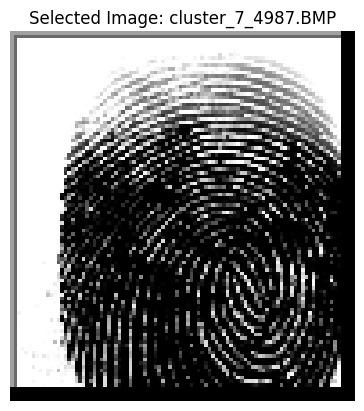

In [76]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title(f"Selected Image: {random_image}")
plt.show()


In [78]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# Convert NumPy array to PIL Image
if isinstance(image, np.ndarray):
    image = Image.fromarray(image)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations
image_tensor = transform(image)

# Add batch dimension
image_tensor = image_tensor.unsqueeze(0)

# Move to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_tensor = image_tensor.to(device)

print("Image preprocessed successfully!")


Image preprocessed successfully!


In [80]:
# Define the mapping of class index to blood group labels
class_labels = {0: "A+", 1: "A-", 2: "B+", 3: "B-", 4: "AB+", 5: "AB-", 6: "O+", 7: "O-"}

# Get the predicted blood group
predicted_label = class_labels[predicted_class]

print(f"Predicted Blood Group: {predicted_label}")


Predicted Blood Group: A+


Counter({1: 1009, 6: 852, 3: 761, 5: 741, 7: 712, 2: 708, 4: 652, 0: 565})


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 | Train Loss: 0.8898, Train Acc: 66.67% | Val Loss: 0.4969, Val Acc: 81.50%
Model saved!
Epoch 2/20 | Train Loss: 0.4867, Train Acc: 81.65% | Val Loss: 0.4455, Val Acc: 82.67%
Model saved!
Epoch 3/20 | Train Loss: 0.4383, Train Acc: 83.10% | Val Loss: 0.3735, Val Acc: 85.92%
Model saved!
Epoch 4/20 | Train Loss: 0.3733, Train Acc: 85.73% | Val Loss: 0.3360, Val Acc: 86.42%
Model saved!
Epoch 5/20 | Train Loss: 0.3520, Train Acc: 85.65% | Val Loss: 0.3140, Val Acc: 88.17%
Model saved!
Epoch 6/20 | Train Loss: 0.3106, Train Acc: 88.00% | Val Loss: 0.3532, Val Acc: 86.83%
Epoch 7/20 | Train Loss: 0.2933, Train Acc: 88.48% | Val Loss: 0.3218, Val Acc: 87.25%
Epoch 8/20 | Train Loss: 0.2856, Train Acc: 89.21% | Val Loss: 0.3520, Val Acc: 85.58%
Epoch 9/20 | Train Loss: 0.2689, Train Acc: 89.79% | Val Loss: 0.3343, Val Acc: 86.92%
Epoch 10/20 | Train Loss: 0.2054, Train Acc: 92.25% | Val Loss: 0.2288, Val Acc: 91.17%
Model saved!
Epoch 11/20 | Train Loss: 0.1616, Train Acc: 94.42%

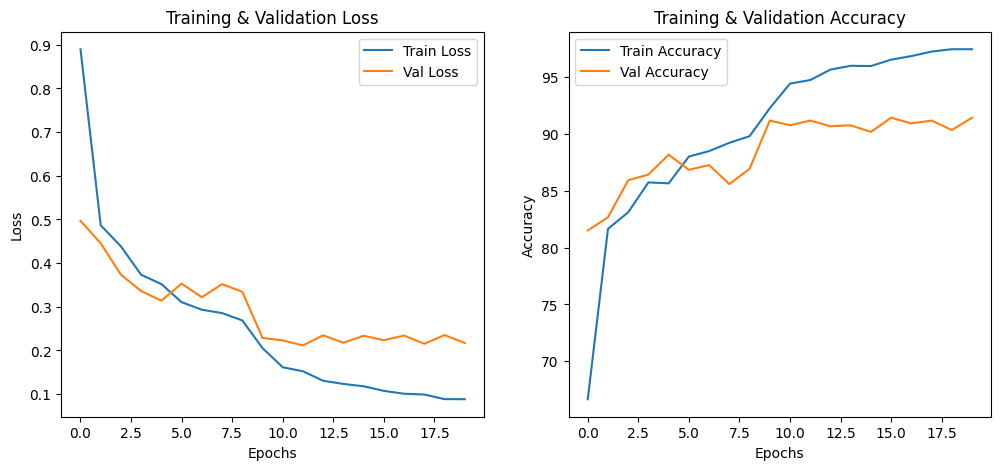


Classification Report:
               precision    recall  f1-score   support

          A+       0.92      0.94      0.93       130
          A-       0.90      0.87      0.89       192
         AB+       0.96      0.93      0.94       140
         AB-       0.92      0.92      0.92       155
          B+       0.92      0.92      0.92       132
          B-       0.91      0.95      0.93       151
          O+       0.89      0.92      0.90       168
          O-       0.92      0.88      0.90       132

    accuracy                           0.91      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.91      0.91      0.91      1200



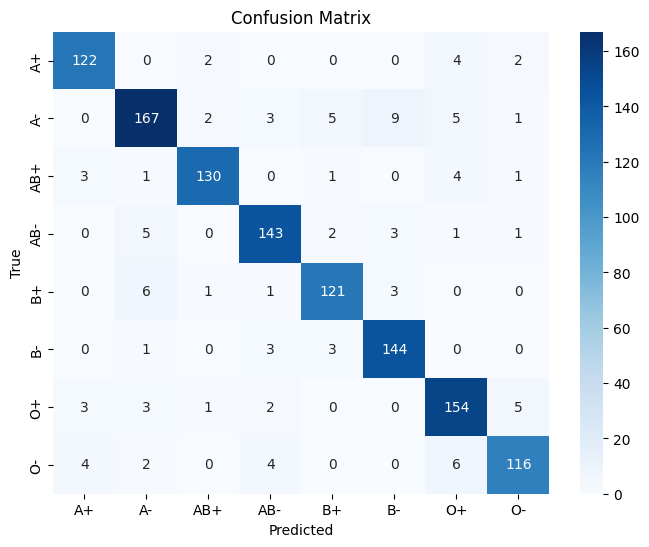

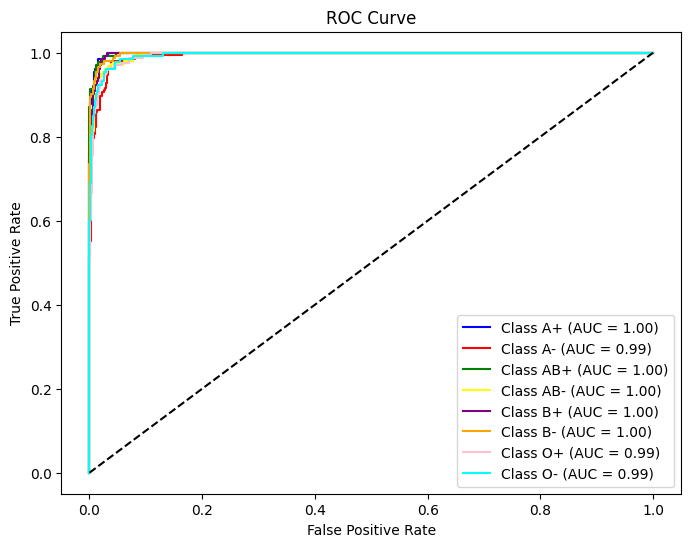

Training complete!


In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle

# Ensure CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset path
data_dir = "/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group"

# Data transformations (with augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load full dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load pre-trained ResNet152 model
model = models.resnet152(pretrained=True)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, len(full_dataset.classes))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    best_acc = 0.0
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * images.size(0)
            train_correct += (outputs.argmax(1) == labels).sum().item()
        
        train_acc = 100 * train_correct / train_size
        train_loss /= train_size
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss, val_correct = 0, 0
        all_labels, all_preds, all_probs = [], [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(outputs.argmax(1).cpu().numpy())
                all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())
        
        val_acc = 100 * val_correct / val_size
        val_loss /= val_size
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        scheduler.step(val_loss)
        
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_resnet152_model.pth")
            print("Model saved!")
    
    # Save plots
    plot_results(train_losses, val_losses, train_accs, val_accs)
    evaluate_model(all_labels, all_preds, all_probs, full_dataset.classes)

# Function to plot results
def plot_results(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')
    plt.savefig("training_results.png")
    plt.show()

# Function to evaluate model
def evaluate_model(true_labels, pred_labels, prob_preds, class_names):
    # Classification Report
    print("\nClassification Report:\n", classification_report(true_labels, pred_labels, target_names=class_names))
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    plt.show()
    
    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    n_classes = len(class_names)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(true_labels) == i, np.array(prob_preds)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'pink', 'cyan'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.show()

# Train the model
train_model(model, criterion, optimizer, scheduler, num_epochs=20)
print("Training complete!")
